# Sommaire :

- 1) <a href="#C1">Importation du jeu de données</a>  
  
- 2) <a href="#C2">Création des jeux d'entraînement et de test</a>
- 3) <a href="#C3">Test des modèles LinearRegression, Lasso, Ridge et ElasticNet</a>
- 4) <a href="#C4">Test des modèles SVR et KernelRidge</a>
- 5) <a href="#C5">Test des modèles RandomForest et XGBoost</a>
- 6) <a href="#C6">Test du modèle MLPRegressor</a>
- 7) <a href="#C7">Choix du modèle</a>
- 8) <a href="#C8">Analyse de la prédiction sur le jeu de test avec le modèle retenu</a>
- 9) <a href="#C9">Analyse de l'impact des différentes variables sur la prédiction</a>
- 10) <a href="#C10">Analyse de l'impact de l'ENERGY STAR Score sur la performance du modèle retenu</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## <a name="C1">Importation du jeu de données

In [3]:
# Importation du jeu de données.

df_final = pd.read_csv('df_final.csv', sep=',')

In [4]:
df_final

,Unnamed: 0,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,...,OtherFuelUse,SourceEUWN(kBtu),LossesEUIWN(kBtu/sf),LossesEUWN(kBtu),Steam_ratio,Electricity_ratio,NaturalGas_ratio,OtherFuel_ratio,ProportionGFAParking,log_PropertyGFATotal
0,0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,...,0.0,1.671403e+07,104.678246,9.487664e+06,0.277302,0.546060,0.176638,0.0,0.000000,11.390012
1,1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,...,0.0,1.857974e+07,95.738570,1.019181e+07,0.000000,0.386609,0.613391,0.0,0.145453,11.547964
2,2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,...,0.0,2.333865e+08,166.768829,1.607994e+08,0.297113,0.682307,0.020579,0.0,0.205748,13.770628
3,3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,...,0.0,1.373568e+07,110.712321,6.941096e+06,0.325913,0.407519,0.266567,0.0,0.000000,11.023861
4,4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,...,0.0,3.785505e+07,132.125220,2.368244e+07,0.000000,0.378802,0.621198,0.0,0.353115,12.075850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650,3416,25455,2015,NonResidential,Other,DUCATI SEATTLE,NaN,NaN,NaN,18390.0,...,0.0,8.468570e+06,178.659262,4.176781e+06,0.000000,0.458087,0.541913,0.0,0.000000,10.045421
1651,3418,25654,2015,NonResidential,Retail Store,FISHER BUILDING,NaN,NaN,NaN,18379.0,...,0.0,6.112800e+05,19.777917,4.272030e+05,0.000000,1.000000,0.000000,0.0,0.000000,9.980449
1652,3423,27639,2015,NonResidential,Other,TEATRO ZINZANNI,NaN,NaN,NaN,18390.0,...,0.0,6.398146e+06,133.929907,3.339508e+06,0.000000,0.476491,0.523509,0.0,0.000000,10.047501
1653,3426,27829,2015,NonResidential,Small- and Mid-Sized Office,EAST PIKE BUILDING,NaN,NaN,NaN,19578.0,...,0.0,2.914604e+06,93.578594,2.114608e+06,0.000000,1.000000,0.000000,0.0,0.000000,9.963076


In [5]:
df_final = df_final.drop('Unnamed: 0', axis=1)

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
df_final

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse,Electricity(kWh),ElectricityUse,NaturalGas(therms),NaturalGasUse,DefaultData,Comments,ComplianceStatus,Outlier,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),OtherFuelUse,SourceEUWN(kBtu),LossesEUIWN(kBtu/sf),LossesEUWN(kBtu),Steam_ratio,Electricity_ratio,NaturalGas_ratio,OtherFuel_ratio,ProportionGFAParking,log_PropertyGFATotal
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.612200,-122.337990,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.714753,84.321754,182.500000,189.000000,7226362.5,7456910.0,1.0,1.156514e+06,1.0,12764.52930,1.0,False,NaN,Compliant,NaN,249.98,2.826741,0.0,1.671403e+07,104.678246,9.487664e+06,0.277302,0.546060,0.176638,0.0,0.000000,11.390012
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.613170,-122.333930,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,80.991184,83.661424,176.100006,179.399994,8387933.0,8664479.0,0.0,9.504252e+05,1.0,51450.81641,1.0,False,NaN,Compliant,NaN,295.86,2.856729,0.0,1.857974e+07,95.738570,1.019181e+07,0.000000,0.386609,0.613391,0.0,0.145453,11.547964
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.613930,-122.338100,1969,1.0,41.0,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,75.919114,77.331177,241.899994,244.100006,72587024.0,73937112.0,1.0,1.451544e+07,1.0,14938.00000,1.0,False,NaN,Compliant,NaN,2089.28,2.185188,0.0,2.333865e+08,166.768829,1.607994e+08,0.297113,0.682307,0.020579,0.0,0.205748,13.770628
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.614120,-122.336640,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.805349,113.287679,216.199997,224.000000,6794584.0,6946800.5,1.0,8.115253e+05,1.0,18112.13086,1.0,False,NaN,Compliant,NaN,286.43,4.671070,0.0,1.373568e+07,110.712321,6.941096e+06,0.325913,0.407519,0.266567,0.0,0.000000,11.023861
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.613750,-122.340470,1980,1.0,18.0,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,80.718795,83.474786,211.399994,215.600006,14172606.0,14656503.0,0.0,1.573449e+06,1.0,88039.98438,1.0,False,NaN,Compliant,NaN,505.01,2.876239,0.0,3.785505e+07,132.125220,2.368244e+07,0.000000,0.378802,0.621198,0.0,0.353115,12.075850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650,25455,2015,NonResidential,Other,DUCATI SEATTLE,NaN,NaN,NaN,18390.0,4088803440,7,MAGNOLIA / QUEEN ANNE,47.626170,-122.340102,1922,1.0,1.0,23050,0,23050,Automobile Dealership,Automobile Dealership,23050.0,NaN,NaN,NaN,NaN,NaN,NaN,186.194751,188.740738,373.800000,367.400000,4291789.0,4350474.0,0.0,5.761920e+05,1.0,23258.00000,1.0,No,NaN,Compliant,NaN,137.23,5.953579,0.0,8.468570e+06,178.659262,4.176781e+06,0.000000,0.458087,0.541913,0.0,0.000000,10.045421
1651,25654,2015,NonResidential,Retail Store,FISHER BUIL

In [8]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1655 entries, 0 to 1654
Data columns (total 56 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   OSEBuildingID                      1655 non-null   int64  
 1   DataYear                           1655 non-null   int64  
 2   BuildingType                       1655 non-null   object 
 3   PrimaryPropertyType                1655 non-null   object 
 4   PropertyName                       1655 non-null   object 
 5   Address                            1627 non-null   object 
 6   City                               1627 non-null   object 
 7   State                              1627 non-null   object 
 8   ZipCode                            1639 non-null   float64
 9   TaxParcelIdentificationNumber      1655 non-null   object 
 10  CouncilDistrictCode                1655 non-null   int64  
 11  Neighborhood                       1655 non-null   objec

In [9]:
# On modifie le type des variables 'SteamUse', 'ElectricityUse', 'NaturalGasUse' et 'OtherFuelUse' pour les faire passer
# de float à object comme ce sont maintenant des catégories (égale à 0 ou 1).

df_final['SteamUse'] = df_final['SteamUse'].astype('object')
df_final['ElectricityUse'] = df_final['ElectricityUse'].astype('object')
df_final['NaturalGasUse'] = df_final['NaturalGasUse'].astype('object')
df_final['OtherFuelUse'] = df_final['OtherFuelUse'].astype('object')

In [10]:
df_final['SteamUse'].value_counts()

0.0    1542
1.0     113
Name: SteamUse, dtype: int64

In [11]:
df_final['ElectricityUse'].value_counts()

1.0    1654
0.0       1
Name: ElectricityUse, dtype: int64

In [12]:
df_final['NaturalGasUse'].value_counts()

1.0    1193
0.0     462
Name: NaturalGasUse, dtype: int64

In [13]:
df_final['OtherFuelUse'].value_counts()

0.0    1640
1.0      15
Name: OtherFuelUse, dtype: int64

--> On remarque qu'il n'y a qu'une donnée égale à 0 pour 'ElectricityUse' donc on ne va pas utiliser cette variable pour les modèles.

In [14]:
df_final.isna().sum()

OSEBuildingID                           0
DataYear                                0
BuildingType                            0
PrimaryPropertyType                     0
PropertyName                            0
Address                                28
City                                   28
State                                  28
ZipCode                                16
TaxParcelIdentificationNumber           0
CouncilDistrictCode                     0
Neighborhood                            0
Latitude                                0
Longitude                               0
YearBuilt                               0
NumberofBuildings                       0
NumberofFloors                          0
PropertyGFATotal                        0
PropertyGFAParking                      0
PropertyGFABuilding(s)                  0
ListOfAllPropertyUseTypes               6
LargestPropertyUseType                 10
LargestPropertyUseTypeGFA              10
SecondLargestPropertyUseType      

## <a name="C2">Création des jeux d'entraînement et de test

In [15]:
# On crée un jeu d'entraînement et de test.

from sklearn.model_selection import train_test_split

X = df_final.drop(['SourceEUWN(kBtu)', 'GHGEmissions(MetricTonsCO2e)'], axis=1)
y = df_final[['SourceEUWN(kBtu)', 'GHGEmissions(MetricTonsCO2e)']]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.75, stratify=X[['PrimaryPropertyType']],
                                               random_state=42)


# On crée 4 datasets par ordre de complexité qui seront ensuite chacun utilisés en X dans l'entraînement des modèles
# pour voir s'il y un dataset qui obtient de meilleurs résultats que les autres.

df1_columns = ['PrimaryPropertyType', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal']
df2_columns = ['PrimaryPropertyType', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'Neighborhood', 'YearBuilt']
df3_columns = ['PrimaryPropertyType', 'NumberofBuildings', 'NumberofFloors', 'Neighborhood', 'YearBuilt',
               'ProportionGFAParking', 'SteamUse', 'NaturalGasUse', 'OtherFuelUse', 'PropertyGFATotal']
df4_columns = ['PrimaryPropertyType', 'NumberofBuildings', 'NumberofFloors', 'Neighborhood', 'YearBuilt',
               'ProportionGFAParking', 'SteamUse', 'NaturalGasUse', 'OtherFuelUse', 'log_PropertyGFATotal']

In [16]:
Xtrain.shape

(1241, 54)

In [17]:
Xtest.shape

(414, 54)

In [18]:
ytrain.shape

(1241, 2)

In [19]:
ytest.shape

(414, 2)

In [128]:
ytrain.describe()

,SourceEUWN(kBtu),GHGEmissions(MetricTonsCO2e)
count,1.241000e+03,1241.000000
mean,2.176421e+07,172.069017
std,4.536740e+07,602.139688
min,6.091800e+04,0.120000
25%,3.072669e+06,20.330000
50%,6.283865e+06,49.580000
75%,1.983695e+07,134.690000
max,6.682430e+08,12307.160000


## <a name="C3">Test des modèles LinearRegression, Lasso, Ridge et ElasticNet

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import *

In [21]:
# On teste les modèles ci-dessous pour chacun des 3 datasets, en testant également différentes normalisations des
# variables numériques et en optimisant pour le moment aucun paramètre des modèles testés.
# On utilise un oneHotEncoder pour encoder les variables catégorielles.

# On utilise une GridSearchCV pour faire une cross-validation même si pour le moment on n'optimise pas les paramètres des
# modèles.

# Modèles testés : LinearRegression, Lasso, Ridge et ElasticNet.


# On crée un dataFrame pour stocker les résultats obtenus.
df_results_1 = pd.DataFrame(columns = ['Dataset', 'Modèle', 'Normalisation', 'Target'])


for df in [('df1', df1_columns), ('df2', df2_columns), ('df3', df3_columns), ('df4', df4_columns)]:
    
    Xtrain_df = Xtrain[df[1]]
    
    y_CO2_train = ytrain['GHGEmissions(MetricTonsCO2e)']
    
    # On différencie les variables numériques des varialbes catégorielles.
    numerical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype != "object"]
    categorical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype == "object"]
    
    
    for normalizer in [('MinMaxScaler', MinMaxScaler()), ('StandardScaler', StandardScaler()), ('RobustScaler', RobustScaler())]:
        
        numerical_pipeline = make_pipeline(normalizer[1])
        categorical_pipeline = make_pipeline(OneHotEncoder())
        
        # On applique un OneHotEncoder pour les variables catégorielles et on teste différentes normalisations pour les
        # variables numériques.
        preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                               (categorical_pipeline, categorical_features))
        
        
        for type_model in [('LinearReg', LinearRegression()), ('Lasso', Lasso()), ('Ridge', Ridge()),
                             ('Elastic', ElasticNet())]:
            
            model = make_pipeline(preprocessor, type_model[1])
          
            params = {}
            
            # On crée une GridSearchCV, on retroune le score des différentes métriques utilisées.
            grid_CO2 = GridSearchCV(model, param_grid=params, cv=5, return_train_score=True,
                                      scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error'),
                                      refit = 'r2', n_jobs = -1)
             
            grid_CO2.fit(Xtrain_df, y_CO2_train)
    
            # On stocke les résultats de la GridSearchCV dans le dataFrame de résultats.
            df_grid_CO2_results = pd.DataFrame(grid_CO2.cv_results_)
            df_grid_CO2_results['Dataset'] = df[0]
            df_grid_CO2_results['Modèle'] = type_model[0]
            df_grid_CO2_results['Normalisation'] = normalizer[0]
            df_grid_CO2_results['Target'] = 'grid_CO2'
            
            df_results_1 = df_results_1.append(df_grid_CO2_results, ignore_index=True)

In [22]:
# On crée une fonction qui permet d'afficher dans un graphique les 'n' modèles du DataFrame 'df_results' avec
# le meilleur 'r2' moyen de test sur l'ensemble des cross-validations de la GridSearchCV pour la variable 'target'.
# On affiche également pour chacun de ces 'n' modèles la valeur 'r2' moyenne sur les train sets des cross-validations.

# Enfin on affiche également sur le graphique les valeurs moyennes sur le test et train set des métriques suivantes :
# MAE, MedAE et RMSE.

def afficher_best(n, df_results, target):

    df = df_results[df_results.Target==target].sort_values('mean_test_r2', ascending=False).head(n)
    
    for i in df.index:
        df.loc[i, 'Dataset | Modèle | Normalisation | index'] = df.loc[i, 'Dataset'] + ' | ' + df.loc[i, 'Modèle'] + ' | ' + df.loc[i, 'Normalisation'] + ' | ' + str(i)

    plt.rc('xtick',labelsize=14)
    plt.rc('ytick',labelsize=14)

    fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey='all', figsize=(25,12))

    sns.set_color_codes("pastel")
    sns.barplot(x="mean_train_r2", y="Dataset | Modèle | Normalisation | index", data=df, 
                label="Train", color="b", ax=axes[0])

    sns.set_color_codes("muted")
    sns.barplot(x="mean_test_r2", y="Dataset | Modèle | Normalisation | index", data=df, 
                label="Test", color="b", ax=axes[0])


    sns.set_color_codes("pastel")
    sns.barplot(x=-df["mean_test_neg_mean_absolute_error"], y="Dataset | Modèle | Normalisation | index", data=df, 
                label="Test", color="r", ax=axes[1])

    sns.set_color_codes("muted")
    sns.barplot(x=-df["mean_train_neg_mean_absolute_error"], y="Dataset | Modèle | Normalisation | index", data=df, 
                label="Train", color="r", ax=axes[1])


    sns.set_color_codes("pastel")
    sns.barplot(x=-df["mean_test_neg_median_absolute_error"], y="Dataset | Modèle | Normalisation | index", data=df, 
                label="Test", color="r", ax=axes[2])

    sns.set_color_codes("muted")
    sns.barplot(x=-df["mean_train_neg_median_absolute_error"], y="Dataset | Modèle | Normalisation | index", data=df, 
                label="Train", color="r", ax=axes[2])


    sns.set_color_codes("pastel")
    sns.barplot(x=np.sqrt(-df['mean_test_neg_mean_squared_error']), y="Dataset | Modèle | Normalisation | index", data=df, 
                label="Test", color="r", ax=axes[3])

    sns.set_color_codes("muted")
    sns.barplot(x=np.sqrt(-df['mean_train_neg_mean_squared_error']), y="Dataset | Modèle | Normalisation | index", data=df, 
                label="Train", color="r", ax=axes[3])


    axes[0].legend(ncol=1, loc="lower right", frameon=True)
    axes[1].legend(ncol=1, loc="lower left", frameon=True)
    axes[2].legend(ncol=1, loc="lower left", frameon=True)
    axes[3].legend(ncol=1, loc="lower left", frameon=True)

    axes[0].set(xlabel="R2")
    axes[1].set(xlabel="MAE")
    axes[2].set(xlabel="MedAE")
    axes[3].set(xlabel="RMSE")

    plt.suptitle('Les 10 meilleurs r2 pour ' + target, fontsize=20)
    plt.show()

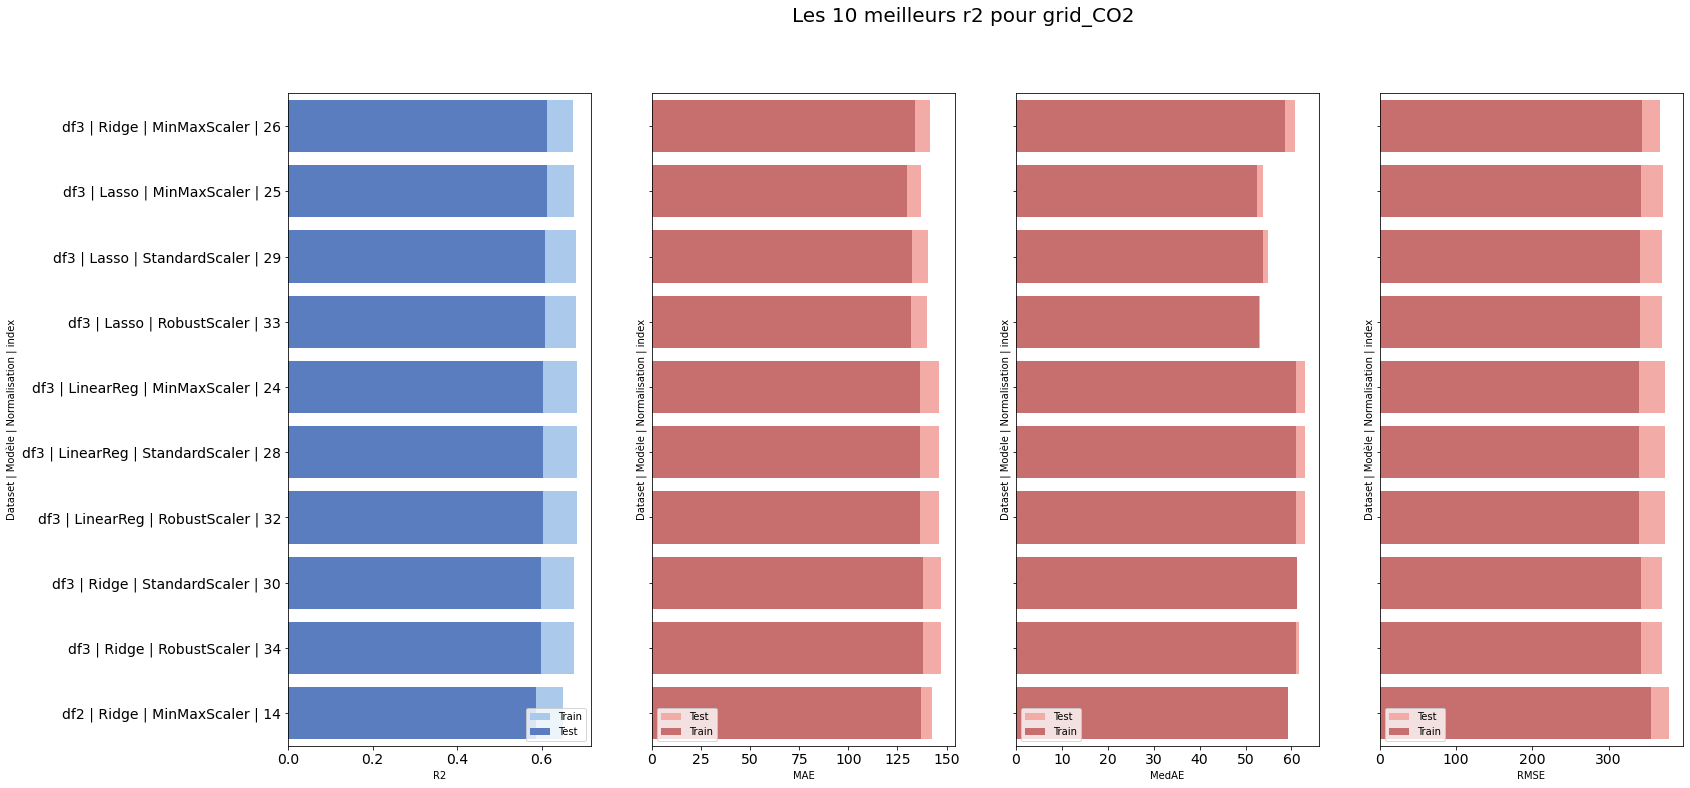

In [23]:
# On affiche les 10 meilleurs 'r2' pour 'df_results_1'.

afficher_best(10, df_results_1, 'grid_CO2')

In [25]:
# On affiche le détail du dataFrame résultats pour les 15 meilleurs modèles.

df_results_1[df_results_1.Target=='grid_CO2'].sort_values('mean_test_r2', ascending=False).head(15)

,Dataset,Modèle,Normalisation,Target,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_train_r2,split1_train_r2,split2_train_r2,split3_train_r2,split4_train_r2,mean_train_r2,std_train_r2,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_train_neg_mean_absolute_error,split1_train_neg_mean_absolute_error,split2_train_neg_mean_absolute_error,split3_train_neg_mean_absolute_error,split4_train_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,std_train_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_train_neg_mean_squared_error,split1_train_neg_mean_squared_error,split2_train_neg_mean_squared_error,split3_train_neg_mean_squared_error,split4_train_neg_mean_squared_error,mean_train_neg_mean_squared_error,std_train_neg_mean_squared_error,split0_test_neg_median_absolute_error,split1_test_neg_median_absolute_error,split2_test_neg_median_absolute_error,split3_test_neg_median_absolute_error,split4_test_neg_median_absolute_error,mean_test_neg_median_absolute_error,std_test_neg_median_absolute_error,rank_test_neg_median_absolute_error,split0_train_neg_median_absolute_error,split1_train_neg_median_absolute_error,split2_train_neg_median_absolute_error,split3_train_neg_median_absolute_error,split4_train_neg_median_absolute_error,mean_train_neg_median_absolute_error,std_train_neg_median_absolute_error
26,df3,Ridge,MinMaxScaler,grid_CO2,0.024131,0.003179,0.008777,0.001466,{},0.603809,0.646720,0.702695,0.697897,0.411298,0.612484,0.106917,1.0,0.695474,0.664091,0.657467,0.660701,0.691083,0.673763,0.016131,-158.070265,-155.249754,-143.012412,-127.601550,-123.787626,-141.544321,13.948492,1.0,-120.533744,-130.502250,-138.773448,-141.683757,-138.505883,-133.999817,7.690295,-265572.581740,-194659.480059,-71828.165951,-63811.981760,-79400.164843,-135054.474871,80942.194254,1.0,-86756.062451,-105827.915493,-134409.375063,-135721.347521,-129408.140937,-118424.568293,19167.166777,-55.174412,-55.757809,-76.635797,-61.983690,-54.617333,-60.833808,8.336236,1.0,-52.005065,-60.764430,-60.332657,-63.324595,-56.862580,-58.657865,3.911616
25,df3,Lasso,MinMaxScaler,grid_CO2,0.021130,0.002625,0.009375,0.001620,{},0.573234,0.653291,0.724633,0.693844,0.415799,0.612160,0.110532,1.0,0.704434,0.666313,0.660147,0.663525,0.693312,0.677546,0.017872,-157.786677,-154.126322,-132.454443,-123.152442,-117.293615,-136.962700,16.285874,1.0,-114.942776,-127.652494,-135.776404,-136.937148,-133.985474,-129.858859,8.117956,-286068.090180,-191039.253838,-66527.991826,-64668.079021,-78792.995214,-137419.282016,88007.867390,1.0,-84203.709317,-105127.971716,-133357.783687,-134591.807198,-128474.110233,-117151.076430,19622.087509,-49.733728,-52.003419,-65.888056,-59.428930,-41.879722,-53.786771,8.242092,1.0,-45.919200,-56.419679,-54.204517,-56.421398,-49.474125,-52.487784,4.149909
29,df3,Lasso,StandardScaler,grid_CO2,0.021927,0.002593,0.009574,0.001353,{},0.586144,0.646879,0.714774,0.709408,0.381718,0.607785,0.122374,1.0,0.708143,0.669159,0.662548,0.666337,0.695819,0.680401,0.018167,-162.619292,-154.468676,-135.929890,-126.598740,-122.315829,-140.386485,15.678760,1.0,-116.875115,-129.743502,-138.070536,-139.631778,-137.224505,-132.309087,8.435249,-277413.779403,-194572.043644,-68909.717305,-61380.537402,-83389.673113,-137133.150173,85157.663050,1.0,-83147.022301,-104231.281866,-132415.774270,-133467.049789,-127424.045447,-116137.034735,19610.258872,-53.052163,-48.39

In [26]:
top_results = df_results_1[df_results_1.Target=='grid_CO2'].sort_values('mean_test_r2', ascending=False).head(15)
results_main_columns = ['Dataset', 'Modèle', 'Normalisation', 'mean_test_r2', 'mean_test_neg_mean_absolute_error', 'mean_test_neg_median_absolute_error',
                       'mean_test_neg_mean_squared_error', 'Target', 'mean_fit_time', 'mean_score_time',
                       'params']

top_results[results_main_columns]

,Dataset,Modèle,Normalisation,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_median_absolute_error,mean_test_neg_mean_squared_error,Target,mean_fit_time,mean_score_time,params
26,df3,Ridge,MinMaxScaler,0.612484,-141.544321,-60.833808,-135054.474871,grid_CO2,0.024131,0.008777,{}
25,df3,Lasso,MinMaxScaler,0.612160,-136.962700,-53.786771,-137419.282016,grid_CO2,0.021130,0.009375,{}
29,df3,Lasso,StandardScaler,0.607785,-140.386485,-54.860444,-137133.150173,grid_CO2,0.021927,0.009574,{}
33,df3,Lasso,RobustScaler,0.607286,-139.995736,-53.092872,-137117.576550,grid_CO2,0.023905,0.009194,{}
24,df3,LinearReg,MinMaxScaler,0.602085,-146.279572,-62.883201,-139958.986332,grid_CO2,0.030517,0.008776,{}
28,df3,LinearReg,StandardScaler,0.602085,-146.279571,-62.883202,-139958.985856,grid_CO2,0.033911,0.010572,{}
32,df3,LinearReg,RobustScaler,0.602085,-146.279579,-62.883266,-139958.990778,grid_CO2,0.032309,0.009196,{}
30,df3,Ridge,StandardScaler,0.598398,-147.058486,-60.840668,-136956.589428,grid_CO2,0.024870,0.009183,{}
34,df3,Ridge,RobustScaler,0.598027,-147.065599,-61.631275,-137028.474933,grid_CO2,0.025326,0.010378,{}
14,df2,Ridge,MinMaxScaler,0.586761,-142.659913,-58.960049,-143391.768546,grid_CO2,0.020132,0.008390,{}


In [27]:
y_CO2_train.describe()

count     1241.000000
mean       172.069017
std        602.139688
min          0.120000
25%         20.330000
50%         49.580000
75%        134.690000
max      12307.160000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64

--> On remarque que les meilleurs r2 sont obtenus avec le dataset 3, avec un r2 autour de 61%. Les autres métriques sont assez similaires également sauf pour le modèle Lasso sur le dataset 3, quelque soit la normalisation la MedAE est au alentour de 54 contre autour de 60 pour les autres.     

In [28]:
# On garde en mémoire dans un DataFrame 'df_results_final' les meilleurs r2 pour chaque modèle.

df = df_results_1

df['log_target'] = 'No' # Pour garder en mémoire que la variable target n'a pas été log transform.

df_results_final = df[df['Modèle']=='LinearReg'].sort_values('mean_test_r2', ascending=False).head(1)
df_results_final = df_results_final.append(df[df['Modèle']=='Lasso'].sort_values('mean_test_r2', ascending=False).head(1))
df_results_final = df_results_final.append(df[df['Modèle']=='Ridge'].sort_values('mean_test_r2', ascending=False).head(1))
df_results_final = df_results_final.append(df[df['Modèle']=='Elastic'].sort_values('mean_test_r2', ascending=False).head(1))

In [29]:
df_results_final

,Dataset,Modèle,Normalisation,Target,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_train_r2,split1_train_r2,split2_train_r2,split3_train_r2,split4_train_r2,mean_train_r2,std_train_r2,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_train_neg_mean_absolute_error,split1_train_neg_mean_absolute_error,split2_train_neg_mean_absolute_error,split3_train_neg_mean_absolute_error,split4_train_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,std_train_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_train_neg_mean_squared_error,split1_train_neg_mean_squared_error,split2_train_neg_mean_squared_error,split3_train_neg_mean_squared_error,split4_train_neg_mean_squared_error,mean_train_neg_mean_squared_error,std_train_neg_mean_squared_error,split0_test_neg_median_absolute_error,split1_test_neg_median_absolute_error,split2_test_neg_median_absolute_error,split3_test_neg_median_absolute_error,split4_test_neg_median_absolute_error,mean_test_neg_median_absolute_error,std_test_neg_median_absolute_error,rank_test_neg_median_absolute_error,split0_train_neg_median_absolute_error,split1_train_neg_median_absolute_error,split2_train_neg_median_absolute_error,split3_train_neg_median_absolute_error,split4_train_neg_median_absolute_error,mean_train_neg_median_absolute_error,std_train_neg_median_absolute_error,log_target
24,df3,LinearReg,MinMaxScaler,grid_CO2,0.030517,0.004018,0.008776,0.001827,{},0.560883,0.652962,0.722151,0.708381,0.366050,0.602085,0.130930,1.0,0.712144,0.672476,0.665176,0.668658,0.698370,0.683365,0.018542,-170.759179,-159.521625,-142.216057,-129.740004,-129.160995,-146.279572,16.478581,1.0,-120.719564,-133.996535,-141.715814,-144.565263,-142.118328,-136.623101,8.706693,-294346.805737,-191220.216351,-67127.587975,-61597.498316,-85502.823282,-139958.986332,90414.292641,1.0,-82006.975547,-103186.321399,-131384.533333,-132538.324696,-126355.244568,-115094.279908,19662.378117,-64.004050,-54.168388,-74.510827,-62.964553,-58.768187,-62.883201,6.772679,1.0,-53.490028,-63.653266,-61.228186,-66.698120,-59.751849,-60.964290,4.416144,No
25,df3,Lasso,MinMaxScaler,grid_CO2,0.021130,0.002625,0.009375,0.001620,{},0.573234,0.653291,0.724633,0.693844,0.415799,0.612160,0.110532,1.0,0.704434,0.666313,0.660147,0.663525,0.693312,0.677546,0.017872,-157.786677,-154.126322,-132.454443,-123.152442,-117.293615,-136.962700,16.285874,1.0,-114.942776,-127.652494,-135.776404,-136.937148,-133.985474,-129.858859,8.117956,-286068.090180,-191039.253838,-66527.991826,-64668.079021,-78792.995214,-137419.282016,88007.867390,1.0,-84203.709317,-105127.971716,-133357.783687,-134591.807198,-128474.110233,-117151.076430,19622.087509,-49.733728,-52.003419,-65.888056,-59.428930,-41.879722,-53.786771,8.242092,1.0,-45.919200,-56.419679,-54.204517,-56.421398,-49.474125,-52.487784,4.149909,No
26,df3,Ridge,MinMaxScaler,grid_CO2,0.024131,0.003179,0.008777,0.001466,{},0.603809,0.646720,0.702695,0.697897,0.411298,0.612484,0.106917,1.0,0.695474,0.664091,0.657467,0.660701,0.691083,0.673763,0.016131,-158.070265,-155.249754,-143.012412,-127.601550,-123.787626,-141.544321,13.948492,1.0,-120.533744,-130.502250,-138.773448,-141.683757,-138.505883,-133.999817,7.690295,-265572.581740,-194659.480059,-71828.165951,-63811.981760,-79400.164843,-135054.474871,80942.194254,1.0,-86756.062451,-105827.915493,-134409.375063,-135721.347521,-129408.140937,-118424.568293,19167.16677

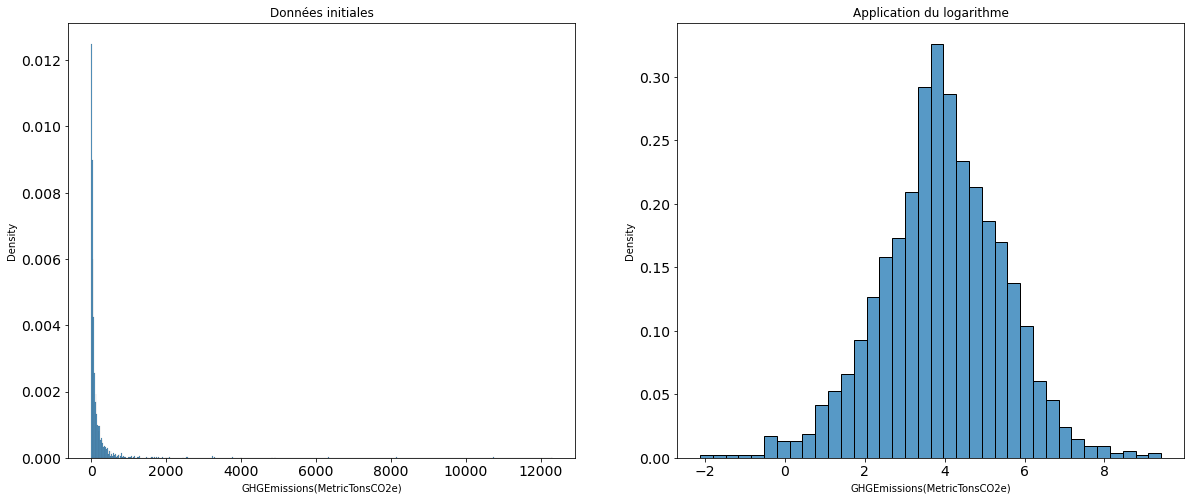

In [30]:
# Analysons maintenant l'impact d'appliquer un logarithme sur la variable target 'GHGEmissions(MetricTonsCO2e)' qui est une variable
# très asymétrique sur la droite.

from sklearn.preprocessing import FunctionTransformer

logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.histplot(data=df_final['GHGEmissions(MetricTonsCO2e)'], stat="density", ax=axes[0])
axes[0].set_title("Données initiales")
sns.histplot(data=logtransformer.transform(df_final['GHGEmissions(MetricTonsCO2e)']), stat="density", ax=axes[1])
axes[1].set_title("Application du logarithme")
plt.show()

In [32]:
# Appliquons cette transformation dans la boucle de test des modèles.

from sklearn.compose import TransformedTargetRegressor

df_results_2 = pd.DataFrame(columns = ['Dataset', 'Modèle', 'Normalisation', 'Target'])


for df in [('df1', df1_columns), ('df2', df2_columns), ('df3', df3_columns), ('df4', df4_columns)]:
    
    Xtrain_df = Xtrain[df[1]]
    
    y_CO2_train = ytrain['GHGEmissions(MetricTonsCO2e)']
    
    numerical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype != "object"]
    categorical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype == "object"]
    
    
    for normalizer in [('MinMaxScaler', MinMaxScaler()), ('StandardScaler', StandardScaler()), ('RobustScaler', RobustScaler())]:
        
        numerical_pipeline = make_pipeline(normalizer[1])
        categorical_pipeline = make_pipeline(OneHotEncoder())
        
        preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                               (categorical_pipeline, categorical_features))
        
        
        for type_model in [('LinearReg', LinearRegression()), ('Lasso', Lasso()), ('Ridge', Ridge()),
                             ('Elastic', ElasticNet())]:
            
            # On applique maintenant un log transform sur la variable traget.
            model = make_pipeline(preprocessor, TransformedTargetRegressor(regressor=type_model[1], func=np.log,
                                                                           inverse_func=np.exp))
          
            params = {}
            
            grid_CO2 = GridSearchCV(model, param_grid=params, cv=5, return_train_score=True,
                                      scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error'),
                                      refit = 'r2', n_jobs = -1)
             
            grid_CO2.fit(Xtrain_df, y_CO2_train)
    
            df_grid_CO2_results = pd.DataFrame(grid_CO2.cv_results_)
            df_grid_CO2_results['Dataset'] = df[0]
            df_grid_CO2_results['Modèle'] = type_model[0]
            df_grid_CO2_results['Normalisation'] = normalizer[0]
            df_grid_CO2_results['Target'] = 'grid_CO2'
            
            df_results_2 = df_results_2.append(df_grid_CO2_results, ignore_index=True)

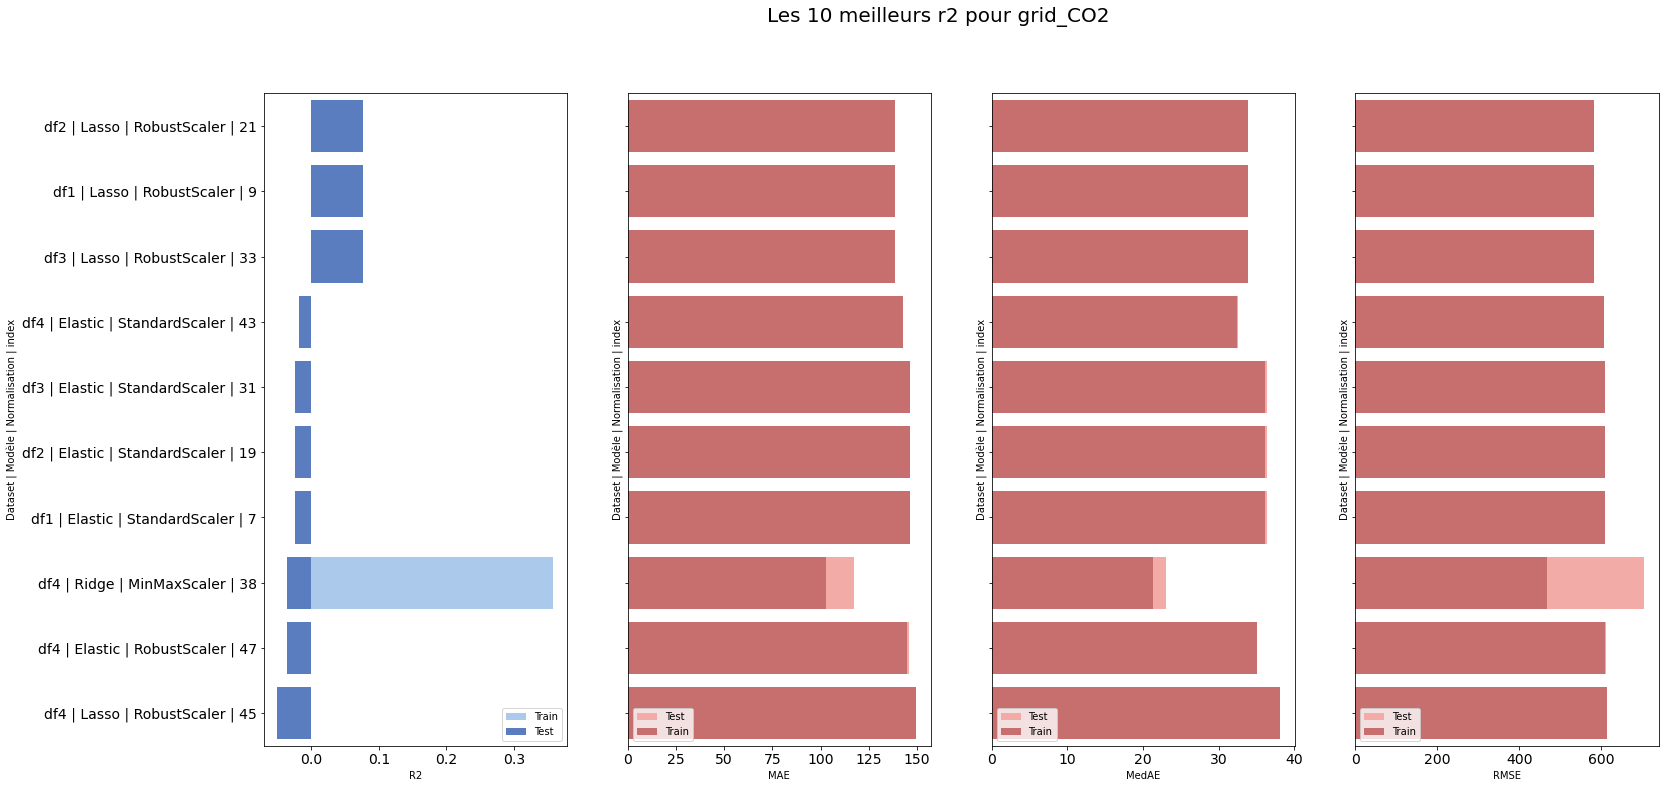

In [33]:
afficher_best(10, df_results_2, 'grid_CO2')

In [34]:
# On affiche le détail du dataFrame résultats pour les 10 meilleurs modèles.

df_results_2[df_results_2.Target=='grid_CO2'].sort_values('mean_test_r2', ascending=False).head(10)

,Dataset,Modèle,Normalisation,Target,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_train_r2,split1_train_r2,split2_train_r2,split3_train_r2,split4_train_r2,mean_train_r2,std_train_r2,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_train_neg_mean_absolute_error,split1_train_neg_mean_absolute_error,split2_train_neg_mean_absolute_error,split3_train_neg_mean_absolute_error,split4_train_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,std_train_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_train_neg_mean_squared_error,split1_train_neg_mean_squared_error,split2_train_neg_mean_squared_error,split3_train_neg_mean_squared_error,split4_train_neg_mean_squared_error,mean_train_neg_mean_squared_error,std_train_neg_mean_squared_error,split0_test_neg_median_absolute_error,split1_test_neg_median_absolute_error,split2_test_neg_median_absolute_error,split3_test_neg_median_absolute_error,split4_test_neg_median_absolute_error,mean_test_neg_median_absolute_error,std_test_neg_median_absolute_error,rank_test_neg_median_absolute_error,split0_train_neg_median_absolute_error,split1_train_neg_median_absolute_error,split2_train_neg_median_absolute_error,split3_train_neg_median_absolute_error,split4_train_neg_median_absolute_error,mean_train_neg_median_absolute_error,std_train_neg_median_absolute_error
21,df2,Lasso,RobustScaler,grid_CO2,0.016134,0.002774,0.007804,0.001448,{},0.112448,0.022890,-0.016597,-0.020177,0.280848,0.075882,0.113081,1.0,0.036846,0.055717,0.084088,0.070531,0.064518,0.062340,0.015739,-150.784442,-156.291389,-134.100168,-141.496624,-104.243318,-137.383188,18.237671,1.0,-135.213398,-135.051109,-138.974576,-137.808215,-145.835995,-138.576659,3.929067,-5.949394e+05,-538394.480613,-245606.884150,-215487.773119,-96994.311112,-338284.562505,193806.529911,1.0,-274392.281327,-297495.972636,-359402.787418,-371792.463582,-391881.142563,-338992.929505,45132.640053,-33.361520,-33.387620,-31.974392,-34.692293,-34.516705,-33.586506,0.977458,1.0,-33.649206,-35.521284,-34.095670,-33.686475,-32.635153,-33.917557,0.935269
9,df1,Lasso,RobustScaler,grid_CO2,0.014947,0.002531,0.007793,0.001160,{},0.112448,0.022890,-0.016597,-0.020177,0.280848,0.075882,0.113081,1.0,0.036846,0.055717,0.084088,0.070531,0.064518,0.062340,0.015739,-150.784442,-156.291389,-134.100168,-141.496624,-104.243318,-137.383188,18.237671,1.0,-135.213398,-135.051109,-138.974576,-137.808215,-145.835995,-138.576659,3.929067,-5.949394e+05,-538394.480613,-245606.884150,-215487.773119,-96994.311112,-338284.562505,193806.529911,1.0,-274392.281327,-297495.972636,-359402.787418,-371792.463582,-391881.142563,-338992.929505,45132.640053,-33.361520,-33.387620,-31.974392,-34.692293,-34.516705,-33.586506,0.977458,1.0,-33.649206,-35.521284,-34.095670,-33.686475,-32.635153,-33.917557,0.935269
33,df3,Lasso,RobustScaler,grid_CO2,0.020147,0.002717,0.008975,0.001784,{},0.112448,0.022890,-0.016597,-0.020177,0.280848,0.075882,0.113081,1.0,0.036846,0.055717,0.084088,0.070531,0.064518,0.062340,0.015739,-150.784442,-156.291389,-134.100168,-141.496624,-104.243318,-137.383188,18.237671,1.0,-135.213398,-135.051109,-138.974576,-137.808215,-145.835995,-138.576659,3.929067,-5.949394e+05,-538394.480613,-245606.884150,-215487.773119,-96994.311112,-338284.562505,193806.529911,1.0,-274392.281327,-297495.972636,-359402.787418,-371792.463582,-391881.142563,-338992.929505,45132.640053,-33.3

In [35]:
top_results = df_results_2[df_results_2.Target=='grid_CO2'].sort_values('mean_test_r2', ascending=False).head(10)

top_results[results_main_columns]

,Dataset,Modèle,Normalisation,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_median_absolute_error,mean_test_neg_mean_squared_error,Target,mean_fit_time,mean_score_time,params
21,df2,Lasso,RobustScaler,0.075882,-137.383188,-33.586506,-338284.562505,grid_CO2,0.016134,0.007804,{}
9,df1,Lasso,RobustScaler,0.075882,-137.383188,-33.586506,-338284.562505,grid_CO2,0.014947,0.007793,{}
33,df3,Lasso,RobustScaler,0.075882,-137.383188,-33.586506,-338284.562505,grid_CO2,0.020147,0.008975,{}
43,df4,Elastic,StandardScaler,-0.017808,-142.618063,-32.629417,-367023.378138,grid_CO2,0.019546,0.009376,{}
31,df3,Elastic,StandardScaler,-0.024799,-146.542980,-36.404305,-368957.044532,grid_CO2,0.017939,0.009388,{}
19,df2,Elastic,StandardScaler,-0.024799,-146.542980,-36.404305,-368957.044532,grid_CO2,0.014548,0.007985,{}
7,df1,Elastic,StandardScaler,-0.024799,-146.542980,-36.404305,-368957.044532,grid_CO2,0.014561,0.008789,{}
38,df4,Ridge,MinMaxScaler,-0.035913,-117.200520,-22.996280,-496685.948122,grid_CO2,0.022333,0.008784,{}
47,df4,Elastic,RobustScaler,-0.036841,-145.963347,-34.975870,-373308.594068,grid_CO2,0.021344,0.009375,{}
45,df4,Lasso,RobustScaler,-0.050202,-149.676635,-38.166083,-376436.933620,grid_CO2,0.021138,0.009382,{}


--> On remarque que les r2 sont très mauvais mais on peut observer que la MedAE a diminué de 37% (34 vs 54). Par contre la RMSE s'est envolé à 582 (vs 367), ce qui signifierait que les modèles ici ne sont pas robustes aux valeurs très élevées.

In [36]:
# On ajoute au DataFrame 'df_results_final' les meilleurs r2 pour chaque modèle.

df = df_results_2

df['log_target'] = 'Yes' # Pour garder en mémoire que la variable target a été log transform.

for i in ['LinearReg', 'Lasso', 'Ridge', 'Elastic']:
    df_results_final = df_results_final.append(df[df['Modèle']==i].sort_values('mean_test_r2', ascending=False).head(1))

In [37]:
df_results_final

,Dataset,Modèle,Normalisation,Target,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_train_r2,split1_train_r2,split2_train_r2,split3_train_r2,split4_train_r2,mean_train_r2,std_train_r2,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_train_neg_mean_absolute_error,split1_train_neg_mean_absolute_error,split2_train_neg_mean_absolute_error,split3_train_neg_mean_absolute_error,split4_train_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,std_train_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_train_neg_mean_squared_error,split1_train_neg_mean_squared_error,split2_train_neg_mean_squared_error,split3_train_neg_mean_squared_error,split4_train_neg_mean_squared_error,mean_train_neg_mean_squared_error,std_train_neg_mean_squared_error,split0_test_neg_median_absolute_error,split1_test_neg_median_absolute_error,split2_test_neg_median_absolute_error,split3_test_neg_median_absolute_error,split4_test_neg_median_absolute_error,mean_test_neg_median_absolute_error,std_test_neg_median_absolute_error,rank_test_neg_median_absolute_error,split0_train_neg_median_absolute_error,split1_train_neg_median_absolute_error,split2_train_neg_median_absolute_error,split3_train_neg_median_absolute_error,split4_train_neg_median_absolute_error,mean_train_neg_median_absolute_error,std_train_neg_median_absolute_error,log_target
24,df3,LinearReg,MinMaxScaler,grid_CO2,0.030517,0.004018,0.008776,0.001827,{},0.560883,0.652962,0.722151,0.708381,0.366050,0.602085,0.130930,1.0,0.712144,0.672476,0.665176,0.668658,0.698370,0.683365,0.018542,-170.759179,-159.521625,-142.216057,-129.740004,-129.160995,-146.279572,16.478581,1.0,-120.719564,-133.996535,-141.715814,-144.565263,-142.118328,-136.623101,8.706693,-2.943468e+05,-1.912202e+05,-67127.587975,-61597.498316,-85502.823282,-1.399590e+05,9.041429e+04,1.0,-82006.975547,-103186.321399,-131384.533333,-132538.324696,-126355.244568,-115094.279908,19662.378117,-64.004050,-54.168388,-74.510827,-62.964553,-58.768187,-62.883201,6.772679,1.0,-53.490028,-63.653266,-61.228186,-66.698120,-59.751849,-60.964290,4.416144,No
25,df3,Lasso,MinMaxScaler,grid_CO2,0.021130,0.002625,0.009375,0.001620,{},0.573234,0.653291,0.724633,0.693844,0.415799,0.612160,0.110532,1.0,0.704434,0.666313,0.660147,0.663525,0.693312,0.677546,0.017872,-157.786677,-154.126322,-132.454443,-123.152442,-117.293615,-136.962700,16.285874,1.0,-114.942776,-127.652494,-135.776404,-136.937148,-133.985474,-129.858859,8.117956,-2.860681e+05,-1.910393e+05,-66527.991826,-64668.079021,-78792.995214,-1.374193e+05,8.800787e+04,1.0,-84203.709317,-105127.971716,-133357.783687,-134591.807198,-128474.110233,-117151.076430,19622.087509,-49.733728,-52.003419,-65.888056,-59.428930,-41.879722,-53.786771,8.242092,1.0,-45.919200,-56.419679,-54.204517,-56.421398,-49.474125,-52.487784,4.149909,No
26,df3,Ridge,MinMaxScaler,grid_CO2,0.024131,0.003179,0.008777,0.001466,{},0.603809,0.646720,0.702695,0.697897,0.411298,0.612484,0.106917,1.0,0.695474,0.664091,0.657467,0.660701,0.691083,0.673763,0.016131,-158.070265,-155.249754,-143.012412,-127.601550,-123.787626,-141.544321,13.948492,1.0,-120.533744,-130.502250,-138.773448,-141.683757,-138.505883,-133.999817,7.690295,-2.655726e+05,-1.946595e+05,-71828.165951,-63811.981760,-79400.164843,-1.350545e+05,8.094219e+04,1.0,-86756.062451,-105827.915493,-134409.375063,-135721.347521,-129408.140937,-118424.568293,19167.166777,-55.174

In [38]:
# Essayons maintenant d'améliorer les résultats en faisant varier certains paramètres de ces modèles à l'aide de la
# GridSearchCV.

# Commençons par la boucle sans la transformation log de la variable target.


df_results_3 = pd.DataFrame(columns = ['Dataset', 'Modèle', 'Normalisation', 'Target'])


for df in [('df1', df1_columns), ('df2', df2_columns), ('df3', df3_columns), ('df4', df4_columns)]:
    
    Xtrain_df = Xtrain[df[1]]
    
    y_CO2_train = ytrain['GHGEmissions(MetricTonsCO2e)']
    
    numerical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype != "object"]
    categorical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype == "object"]
    
    
    for normalizer in [('MinMaxScaler', MinMaxScaler()), ('StandardScaler', StandardScaler()), ('RobustScaler', RobustScaler())]:
        
        numerical_pipeline = make_pipeline(normalizer[1])
        categorical_pipeline = make_pipeline(OneHotEncoder())
        
        preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                               (categorical_pipeline, categorical_features))
        
        
        for type_model in [('LinearReg', LinearRegression()), ('Lasso', Lasso()), ('Ridge', Ridge()),
                             ('Elastic', ElasticNet())]:
            
            model = make_pipeline(preprocessor, type_model[1])
            
            if type_model[0]=='Lasso':
                
                params = {
                    'lasso__alpha' : np.logspace(-10, 1, num=10)
                }
            
            elif type_model[0]=='Ridge':
                
                params = {
                    'ridge__alpha' : np.logspace(-10, 1, num=10)
                }
                
            elif type_model[0]=='Elastic':
                
                params = {
                    'elasticnet__alpha' : np.logspace(-10, 1, num=10),
                    'elasticnet__l1_ratio' : np.arange(0.0, 1.0, 0.1)   
                }
                
            else:
                 params = {
                }
          
            
            grid_CO2 = GridSearchCV(model, param_grid=params, cv=5, return_train_score=True,
                                      scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error'),
                                      refit = 'r2', n_jobs = -1)
             
            grid_CO2.fit(Xtrain_df, y_CO2_train)
    
            df_grid_CO2_results = pd.DataFrame(grid_CO2.cv_results_)
            df_grid_CO2_results['Dataset'] = df[0]
            df_grid_CO2_results['Modèle'] = type_model[0]
            df_grid_CO2_results['Normalisation'] = normalizer[0]
            df_grid_CO2_results['Target'] = 'grid_CO2'
            
            df_results_3 = df_results_3.append(df_grid_CO2_results, ignore_index=True)

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81979970.98998123, tolerance: 44958.95325886006
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81974232.2808044, tolerance: 44958.95325886006
  model = cd_fast.sparse_enet_coordinate_descent(


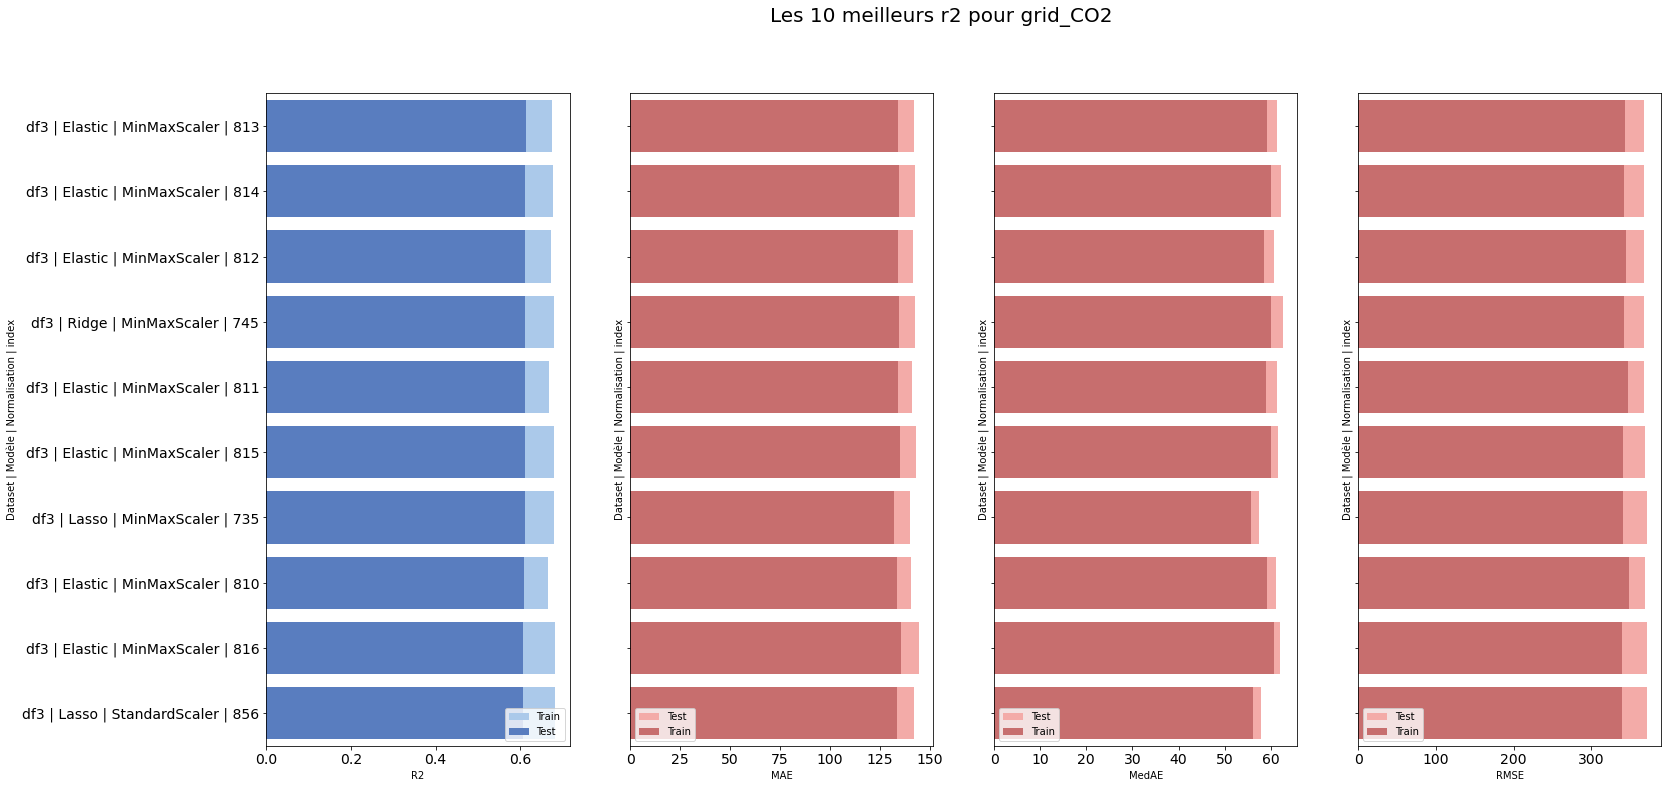

In [39]:
afficher_best(10, df_results_3, 'grid_CO2')

In [40]:
top_results = df_results_3[df_results_3.Target=='grid_CO2'].sort_values('mean_test_r2', ascending=False).head(10)

top_results[results_main_columns]

,Dataset,Modèle,Normalisation,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_median_absolute_error,mean_test_neg_mean_squared_error,Target,mean_fit_time,mean_score_time,params
813,df3,Elastic,MinMaxScaler,0.612861,-141.842618,-61.299598,-134999.411112,grid_CO2,0.116090,0.007978,"{'elasticnet__alpha': 0.002154434690031887, 'e..."
814,df3,Elastic,MinMaxScaler,0.612507,-142.418516,-62.321762,-135303.562738,grid_CO2,0.131646,0.007979,"{'elasticnet__alpha': 0.002154434690031887, 'e..."
812,df3,Elastic,MinMaxScaler,0.612258,-141.392439,-60.805901,-135096.413552,grid_CO2,0.111301,0.007580,"{'elasticnet__alpha': 0.002154434690031887, 'e..."
745,df3,Ridge,MinMaxScaler,0.612182,-142.589014,-62.653995,-135476.426849,grid_CO2,0.025733,0.011568,{'ridge__alpha': 0.5994842503189421}
811,df3,Elastic,MinMaxScaler,0.610913,-141.019247,-61.261637,-135510.129143,grid_CO2,0.104715,0.008378,"{'elasticnet__alpha': 0.002154434690031887, 'e..."
815,df3,Elastic,MinMaxScaler,0.610909,-143.217842,-61.486069,-136118.156043,grid_CO2,0.158575,0.008178,"{'elasticnet__alpha': 0.002154434690031887, 'e..."
735,df3,Lasso,MinMaxScaler,0.610687,-139.751441,-57.345546,-137676.356901,grid_CO2,0.021542,0.008977,{'lasso__alpha': 0.5994842503189421}
810,df3,Elastic,MinMaxScaler,0.608982,-140.700265,-61.074130,-136176.769093,grid_CO2,0.098735,0.008777,"{'elasticnet__alpha': 0.002154434690031887, 'e..."
816,df3,Elastic,MinMaxScaler,0.607654,-144.531915,-62.087445,-137594.439182,grid_CO2,0.259106,0.007181,"{'elasticnet__alpha': 0.002154434690031887, 'e..."
856,df3,Lasso,StandardScaler,0.606678,-142.101499,-57.833457,-137887.035568,grid_CO2,0.024134,0.008577,{'lasso__alpha': 0.5994842503189421}


In [41]:
top_results['params'].values

array([{'elasticnet__alpha': 0.002154434690031887, 'elasticnet__l1_ratio': 0.6000000000000001},
       {'elasticnet__alpha': 0.002154434690031887, 'elasticnet__l1_ratio': 0.7000000000000001},
       {'elasticnet__alpha': 0.002154434690031887, 'elasticnet__l1_ratio': 0.5},
       {'ridge__alpha': 0.5994842503189421},
       {'elasticnet__alpha': 0.002154434690031887, 'elasticnet__l1_ratio': 0.4},
       {'elasticnet__alpha': 0.002154434690031887, 'elasticnet__l1_ratio': 0.8},
       {'lasso__alpha': 0.5994842503189421},
       {'elasticnet__alpha': 0.002154434690031887, 'elasticnet__l1_ratio': 0.30000000000000004},
       {'elasticnet__alpha': 0.002154434690031887, 'elasticnet__l1_ratio': 0.9},
       {'lasso__alpha': 0.5994842503189421}], dtype=object)

--> On remarque que c'est le modèle ElasticNet qui obtient les meilleurs résultats avec une normalisation en MinMaxScaler et sur le dataset df3. Le meilleur r2 étant obtenu avec alpha = 0.002 et l1_ratio = 0.6.  
Cependant il n'y a pas d'amélioration des métriques par rapport aux résultats obtenus précédemment sans log transform et sans optimisation des paramètres.

In [42]:
# On ajoute au DataFrame 'df_results_final' les meilleurs r2 pour chaque modèle.

df = df_results_3

df['log_target'] = 'No'

for i in ['LinearReg', 'Lasso', 'Ridge', 'Elastic']:
    df_results_final = df_results_final.append(df[df['Modèle']==i].sort_values('mean_test_r2', ascending=False).head(1))

In [43]:
# Essayons maintenant d'optimiser les paramètres pour la boucle avec la transformation log de la variable target.

df_results_4 = pd.DataFrame(columns = ['Dataset', 'Modèle', 'Normalisation', 'Target'])


for df in [('df1', df1_columns), ('df2', df2_columns), ('df3', df3_columns), ('df4', df4_columns)]:
    
    Xtrain_df = Xtrain[df[1]]
    
    y_CO2_train = ytrain['GHGEmissions(MetricTonsCO2e)']
    
    numerical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype != "object"]
    categorical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype == "object"]
    
    
    for normalizer in [('MinMaxScaler', MinMaxScaler()), ('StandardScaler', StandardScaler()), ('RobustScaler', RobustScaler())]:
        
        numerical_pipeline = make_pipeline(normalizer[1])
        categorical_pipeline = make_pipeline(OneHotEncoder())
        
        preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                               (categorical_pipeline, categorical_features))
        
        
        for type_model in [('LinearReg', LinearRegression()), ('Lasso', Lasso()), ('Ridge', Ridge()),
                             ('Elastic', ElasticNet())]:
            
            # On applique maintenant un log transform sur la variable traget.
            model = make_pipeline(preprocessor, TransformedTargetRegressor(regressor=type_model[1], func=np.log,
                                                                           inverse_func=np.exp))
          
            if type_model[0]=='Lasso':
                
                params = {
                    'transformedtargetregressor__regressor__alpha' : np.logspace(-10, 1, num=10)
                }
            
            elif type_model[0]=='Ridge':
                
                params = {
                    'transformedtargetregressor__regressor__alpha' : np.logspace(-10, 1, num=10)
                }
                
            elif type_model[0]=='Elastic':
                
                params = {
                    'transformedtargetregressor__regressor__alpha' : np.logspace(-10, 1, num=10),
                    'transformedtargetregressor__regressor__l1_ratio' : np.arange(0.0, 1.0, 0.1)   
                }
                
            else:
                 params = {
                }
            
            grid_CO2 = GridSearchCV(model, param_grid=params, cv=5, return_train_score=True,
                                      scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error'),
                                      refit = 'r2', n_jobs = -1)
             
            grid_CO2.fit(Xtrain_df, y_CO2_train)
    
            df_grid_CO2_results = pd.DataFrame(grid_CO2.cv_results_)
            df_grid_CO2_results['Dataset'] = df[0]
            df_grid_CO2_results['Modèle'] = type_model[0]
            df_grid_CO2_results['Normalisation'] = normalizer[0]
            df_grid_CO2_results['Target'] = 'grid_CO2'
            
            df_results_4 = df_results_4.append(df_grid_CO2_results, ignore_index=True)

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1282.453706220584, tolerance: 0.28898861466312037
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1110.1924751691859, tolerance: 0.28898861466312037
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1158.5219056576818, tolerance: 0.28898861466312037
  model = cd_fast.sparse_enet_coordinate_descent(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_desc

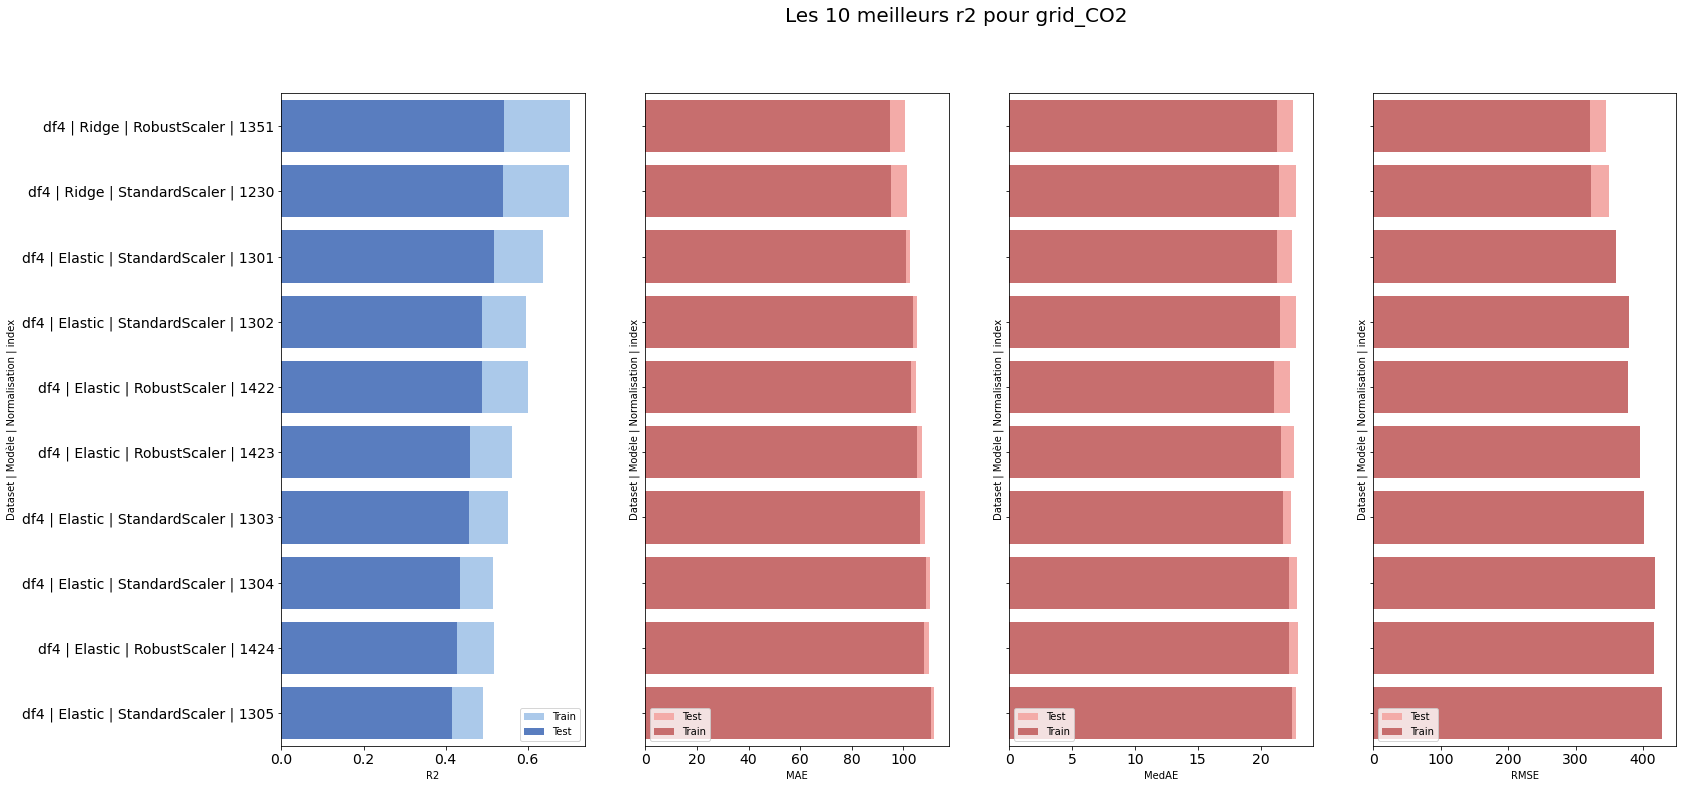

In [44]:
afficher_best(10, df_results_4, 'grid_CO2')

In [45]:
top_results = df_results_4[df_results_4.Target=='grid_CO2'].sort_values('mean_test_r2', ascending=False).head(10)

top_results[results_main_columns]

,Dataset,Modèle,Normalisation,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_median_absolute_error,mean_test_neg_mean_squared_error,Target,mean_fit_time,mean_score_time,params
1351,df4,Ridge,RobustScaler,0.541173,-100.617013,-22.580382,-118763.456750,grid_CO2,0.033511,0.010968,{'transformedtargetregressor__regressor__alpha...
1230,df4,Ridge,StandardScaler,0.540167,-101.448541,-22.777487,-122168.087280,grid_CO2,0.026126,0.010374,{'transformedtargetregressor__regressor__alpha...
1301,df4,Elastic,StandardScaler,0.518154,-102.480504,-22.533751,-128415.949204,grid_CO2,0.348474,0.010368,{'transformedtargetregressor__regressor__alpha...
1302,df4,Elastic,StandardScaler,0.489151,-105.442165,-22.785279,-142516.389660,grid_CO2,0.028723,0.009378,{'transformedtargetregressor__regressor__alpha...
1422,df4,Elastic,RobustScaler,0.487638,-104.725291,-22.301983,-140356.031363,grid_CO2,0.320143,0.009576,{'transformedtargetregressor__regressor__alpha...
1423,df4,Elastic,RobustScaler,0.458969,-107.293378,-22.636281,-154814.557302,grid_CO2,0.025330,0.008179,{'transformedtargetregressor__regressor__alpha...
1303,df4,Elastic,StandardScaler,0.456422,-108.381288,-22.455106,-158555.840324,grid_CO2,0.029320,0.009177,{'transformedtargetregressor__regressor__alpha...
1304,df4,Elastic,StandardScaler,0.434004,-110.369702,-22.923972,-168548.720090,grid_CO2,0.029319,0.010173,{'transformedtargetregressor__regressor__alpha...
1424,df4,Elastic,RobustScaler,0.427268,-109.812347,-22.983538,-170910.363838,grid_CO2,0.024933,0.010175,{'transformedtargetregressor__regressor__alpha...
1305,df4,Elastic,StandardScaler,0.416185,-111.947432,-22.815511,-176746.871541,grid_CO2,0.034907,0.011371,{'transformedtargetregressor__regressor__alpha...


In [46]:
top_results['params'].values

array([{'transformedtargetregressor__regressor__alpha': 10.0},
       {'transformedtargetregressor__regressor__alpha': 10.0},
       {'transformedtargetregressor__regressor__alpha': 0.0359381366380464, 'transformedtargetregressor__regressor__l1_ratio': 0.0},
       {'transformedtargetregressor__regressor__alpha': 0.0359381366380464, 'transformedtargetregressor__regressor__l1_ratio': 0.1},
       {'transformedtargetregressor__regressor__alpha': 0.0359381366380464, 'transformedtargetregressor__regressor__l1_ratio': 0.0},
       {'transformedtargetregressor__regressor__alpha': 0.0359381366380464, 'transformedtargetregressor__regressor__l1_ratio': 0.1},
       {'transformedtargetregressor__regressor__alpha': 0.0359381366380464, 'transformedtargetregressor__regressor__l1_ratio': 0.2},
       {'transformedtargetregressor__regressor__alpha': 0.0359381366380464, 'transformedtargetregressor__regressor__l1_ratio': 0.30000000000000004},
       {'transformedtargetregressor__regressor__alpha': 0.03

--> Les meilleurs résultats sont obtenus avec le modèle Ridge pour le dataset 4 et avec un RobustScaler pour la normalisation des variables numériques.  
Le meilleur r2 est pour le modèle avec un alpha égal à 10. Malgré un r2 un peu plus faible (54% vs 61%), on voit une amélioration sur les autres métriques par rapport aux meilleurs résultats obtenus jusqu'à présent :
- MAE = 101 vs 141
- MedAE = 23 vs 34
- RMSE = 345 vs 368

In [47]:
# On ajoute au DataFrame 'df_results_final' les meilleurs r2 pour chaque modèle.

df = df_results_4

df['log_target'] = 'Yes'

for i in ['LinearReg', 'Lasso', 'Ridge', 'Elastic']:
    df_results_final = df_results_final.append(df[df['Modèle']==i].sort_values('mean_test_r2', ascending=False).head(1))

## <a name="C4">Test des modèles SVR et KernelRidge

In [48]:
# Testons maintenant les modèles SVR et KernelRidge sur la variable target sans log transform et en essayant d'optimiser
# directement les paramètres des modèles.

from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge


df_results_5 = pd.DataFrame(columns = ['Dataset', 'Modèle', 'Normalisation', 'Target'])


for df in [('df1', df1_columns), ('df2', df2_columns), ('df3', df3_columns), ('df4', df4_columns)]:
    
    Xtrain_df = Xtrain[df[1]]
    
    y_CO2_train = ytrain['GHGEmissions(MetricTonsCO2e)']
    
    numerical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype != "object"]
    categorical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype == "object"]
    
    
    for normalizer in [('MinMaxScaler', MinMaxScaler()), ('StandardScaler', StandardScaler()), ('RobustScaler', RobustScaler())]:
        
        numerical_pipeline = make_pipeline(normalizer[1])
        categorical_pipeline = make_pipeline(OneHotEncoder())
        
        preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                               (categorical_pipeline, categorical_features))
        
        
        for type_model in [('SVR', SVR()), ('KernelRidge', KernelRidge())]:
            
            model = make_pipeline(preprocessor, type_model[1])
            
            if type_model[0]=='SVR':
                
                params = {
                    'svr__gamma' : np.logspace(-10, 1, num=5),
                    'svr__epsilon' : np.arange(0.0, 1.0, 0.2),
                    'svr__C' : [0.001, 0.01, 0.1, 1, 10]
                }
            
            elif type_model[0]=='KernelRidge':
                
                params = {
                    'kernelridge__alpha' : np.logspace(-10, 1, num=10)
                }
          
            
            grid_CO2 = GridSearchCV(model, param_grid=params, cv=5, return_train_score=True,
                                      scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error'),
                                      refit = 'r2', n_jobs = -1)
             
            grid_CO2.fit(Xtrain_df, y_CO2_train)
    
            df_grid_CO2_results = pd.DataFrame(grid_CO2.cv_results_)
            df_grid_CO2_results['Dataset'] = df[0]
            df_grid_CO2_results['Modèle'] = type_model[0]
            df_grid_CO2_results['Normalisation'] = normalizer[0]
            df_grid_CO2_results['Target'] = 'grid_CO2'
            
            df_results_5 = df_results_5.append(df_grid_CO2_results, ignore_index=True)

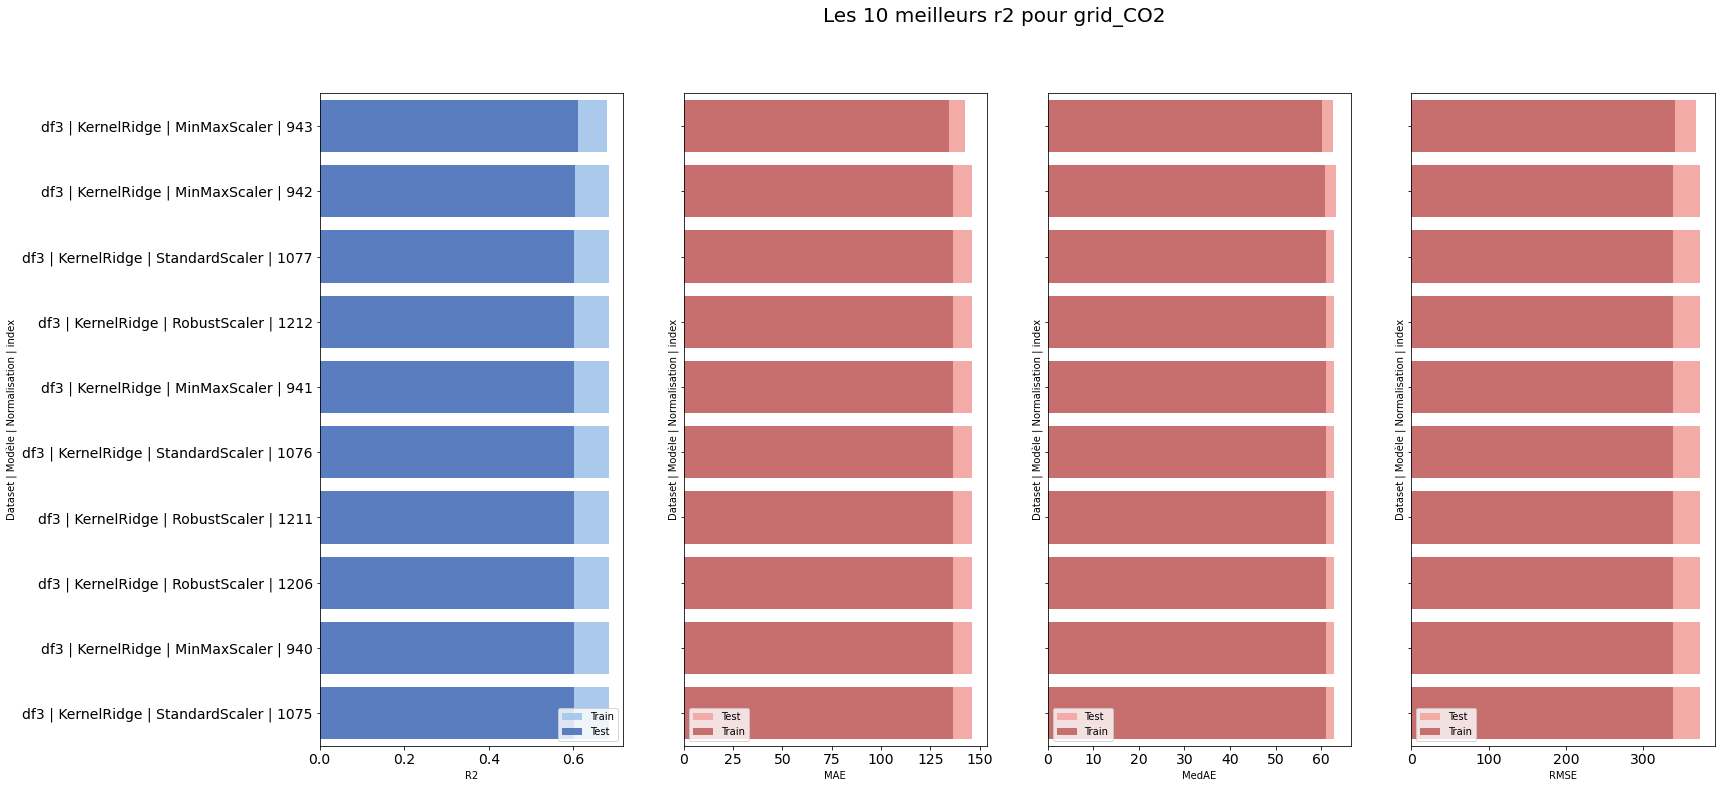

In [49]:
afficher_best(10, df_results_5, 'grid_CO2')

In [50]:
top_results = df_results_5[df_results_5.Target=='grid_CO2'].sort_values('mean_test_r2', ascending=False).head(10)

top_results[results_main_columns]

,Dataset,Modèle,Normalisation,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_median_absolute_error,mean_test_neg_mean_squared_error,Target,mean_fit_time,mean_score_time,params
943,df3,KernelRidge,MinMaxScaler,0.612288,-142.605625,-62.662550,-135411.775289,grid_CO2,0.201466,0.033509,{'kernelridge__alpha': 0.5994842503189421}
942,df3,KernelRidge,MinMaxScaler,0.603211,-145.964563,-63.312111,-139488.828964,grid_CO2,0.185104,0.028521,{'kernelridge__alpha': 0.0359381366380464}
1077,df3,KernelRidge,StandardScaler,0.602298,-146.283783,-62.854635,-139639.910352,grid_CO2,0.192285,0.037301,{'kernelridge__alpha': 0.0359381366380464}
1212,df3,KernelRidge,RobustScaler,0.602293,-146.280336,-62.838900,-139639.735786,grid_CO2,0.202457,0.024333,{'kernelridge__alpha': 0.0359381366380464}
941,df3,KernelRidge,MinMaxScaler,0.602155,-146.260384,-62.906673,-139929.878419,grid_CO2,0.179522,0.032110,{'kernelridge__alpha': 0.002154434690031887}
1076,df3,KernelRidge,StandardScaler,0.602099,-146.279824,-62.881270,-139939.209881,grid_CO2,0.211431,0.035108,{'kernelridge__alpha': 0.002154434690031887}
1211,df3,KernelRidge,RobustScaler,0.602099,-146.279616,-62.880013,-139939.198570,grid_CO2,0.192287,0.028722,{'kernelridge__alpha': 0.002154434690031887}
1206,df3,KernelRidge,RobustScaler,0.602095,-146.279208,-62.868074,-139964.623943,grid_CO2,0.199867,0.025330,{'kernelridge__alpha': 1.6681005372000556e-09}
940,df3,KernelRidge,MinMaxScaler,0.602090,-146.278420,-62.884606,-139957.238758,grid_CO2,0.185905,0.034506,{'kernelridge__alpha': 0.00012915496650148855}
1075,df3,KernelRidge,StandardScaler,0.602086,-146.279586,-62.883082,-139957.799179,grid_CO2,0.187895,0.033712,{'kernelridge__alpha': 0.00012915496650148855}


In [51]:
top_results['params'].values

array([{'kernelridge__alpha': 0.5994842503189421},
       {'kernelridge__alpha': 0.0359381366380464},
       {'kernelridge__alpha': 0.0359381366380464},
       {'kernelridge__alpha': 0.0359381366380464},
       {'kernelridge__alpha': 0.002154434690031887},
       {'kernelridge__alpha': 0.002154434690031887},
       {'kernelridge__alpha': 0.002154434690031887},
       {'kernelridge__alpha': 1.6681005372000556e-09},
       {'kernelridge__alpha': 0.00012915496650148855},
       {'kernelridge__alpha': 0.00012915496650148855}], dtype=object)

--> On remarque que les meilleurs r2 sont obtenus pour le modèle KernelRidge avec principalement le dataset 3.  
Le meilleur r2 est obtenu pour alpha égal à 0.6.  
Cependant on ne remarque pas d'amélioration des métriques.

In [52]:
# Analysons les résultats obtenus pour le modèle SVR car il n'y a que le modèle KernelRidge dans les 10 meilleurs r2.

df_results_5[df_results_5['Modèle']=='SVR'].sort_values('mean_test_r2', ascending=False).head(10)[results_main_columns]

,Dataset,Modèle,Normalisation,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_median_absolute_error,mean_test_neg_mean_squared_error,Target,mean_fit_time,mean_score_time,params
1183,df3,SVR,RobustScaler,0.073051,-124.875189,-25.321853,-341818.013389,grid_CO2,0.122273,0.025731,"{'svr__C': 10, 'svr__epsilon': 0.0, 'svr__gamm..."
1188,df3,SVR,RobustScaler,0.073041,-124.878810,-25.338954,-341832.757510,grid_CO2,0.125064,0.026729,"{'svr__C': 10, 'svr__epsilon': 0.2, 'svr__gamm..."
1193,df3,SVR,RobustScaler,0.073018,-124.884171,-25.174103,-341847.825804,grid_CO2,0.124865,0.025332,"{'svr__C': 10, 'svr__epsilon': 0.4, 'svr__gamm..."
1198,df3,SVR,RobustScaler,0.072991,-124.891750,-25.102984,-341857.632245,grid_CO2,0.119679,0.026529,"{'svr__C': 10, 'svr__epsilon': 0.6000000000000..."
1203,df3,SVR,RobustScaler,0.072967,-124.899889,-25.057198,-341867.390387,grid_CO2,0.127458,0.030718,"{'svr__C': 10, 'svr__epsilon': 0.8, 'svr__gamm..."
393,df1,SVR,RobustScaler,0.070034,-130.239918,-30.010461,-342466.816249,grid_CO2,0.075597,0.015159,"{'svr__C': 10, 'svr__epsilon': 0.8, 'svr__gamm..."
388,df1,SVR,RobustScaler,0.069983,-130.245923,-29.956361,-342478.830501,grid_CO2,0.074998,0.015359,"{'svr__C': 10, 'svr__epsilon': 0.6000000000000..."
383,df1,SVR,RobustScaler,0.069902,-130.246976,-29.876947,-342491.875768,grid_CO2,0.075996,0.015360,"{'svr__C': 10, 'svr__epsilon': 0.4, 'svr__gamm..."
378,df1,SVR,RobustScaler,0.069847,-130.245122,-29.808414,-342505.971033,grid_CO2,0.080383,0.014960,"{'svr__C': 10, 'svr__epsilon': 0.2, 'svr__gamm..."
373,df1,SVR,RobustScaler,0.069749,-130.245307,-29.723486,-342529.948859,grid_CO2,0.076994,0.017553,"{'svr__C': 10, 'svr__epsilon': 0.0, 'svr__gamm..."


--> On peut remarquer pour le modèle SVR que les résultats ne sont pas bons pour le r2, MAE et RMSE mais que la MedAE est plutôt bonne à 25.

In [53]:
# On ajoute au DataFrame 'df_results_final' les meilleurs r2 pour chaque modèle.

df = df_results_5

df['log_target'] = 'No'

for i in ['SVR', 'KernelRidge']:
    df_results_final = df_results_final.append(df[df['Modèle']==i].sort_values('mean_test_r2', ascending=False).head(1))

In [54]:
# Analysons maintenant les résultats en utilisant le log pour la variables target.

df_results_6 = pd.DataFrame(columns = ['Dataset', 'Modèle', 'Normalisation', 'Target'])


for df in [('df1', df1_columns), ('df2', df2_columns), ('df3', df3_columns), ('df4', df4_columns)]:
    
    Xtrain_df = Xtrain[df[1]]
    
    y_CO2_train = ytrain['GHGEmissions(MetricTonsCO2e)']
    
    numerical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype != "object"]
    categorical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype == "object"]
    
    
    for normalizer in [('MinMaxScaler', MinMaxScaler()), ('StandardScaler', StandardScaler()), ('RobustScaler', RobustScaler())]:
        
        numerical_pipeline = make_pipeline(normalizer[1])
        categorical_pipeline = make_pipeline(OneHotEncoder())
        
        preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                               (categorical_pipeline, categorical_features))
        
        
        for type_model in [('SVR', SVR()), ('KernelRidge', KernelRidge())]:
            
            model = make_pipeline(preprocessor, TransformedTargetRegressor(regressor=type_model[1], func=np.log,
                                                                           inverse_func=np.exp))
            
            if type_model[0]=='SVR':
                
                params = {
                    'transformedtargetregressor__regressor__gamma' : np.logspace(-10, 1, num=5),
                    'transformedtargetregressor__regressor__epsilon' : np.arange(0.0, 1.0, 0.2),
                    'transformedtargetregressor__regressor__C' : [0.001, 0.01, 0.1, 1, 10]
                }
            
            elif type_model[0]=='KernelRidge':
                
                params = {
                    'transformedtargetregressor__regressor__alpha' : np.logspace(-10, 1, num=10)
                }
          
            
            grid_CO2 = GridSearchCV(model, param_grid=params, cv=5, return_train_score=True,
                                      scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error'),
                                      refit = 'r2', n_jobs = -1)
             
            grid_CO2.fit(Xtrain_df, y_CO2_train)
    
            df_grid_CO2_results = pd.DataFrame(grid_CO2.cv_results_)
            df_grid_CO2_results['Dataset'] = df[0]
            df_grid_CO2_results['Modèle'] = type_model[0]
            df_grid_CO2_results['Normalisation'] = normalizer[0]
            df_grid_CO2_results['Target'] = 'grid_CO2'
            
            df_results_6 = df_results_6.append(df_grid_CO2_results, ignore_index=True)

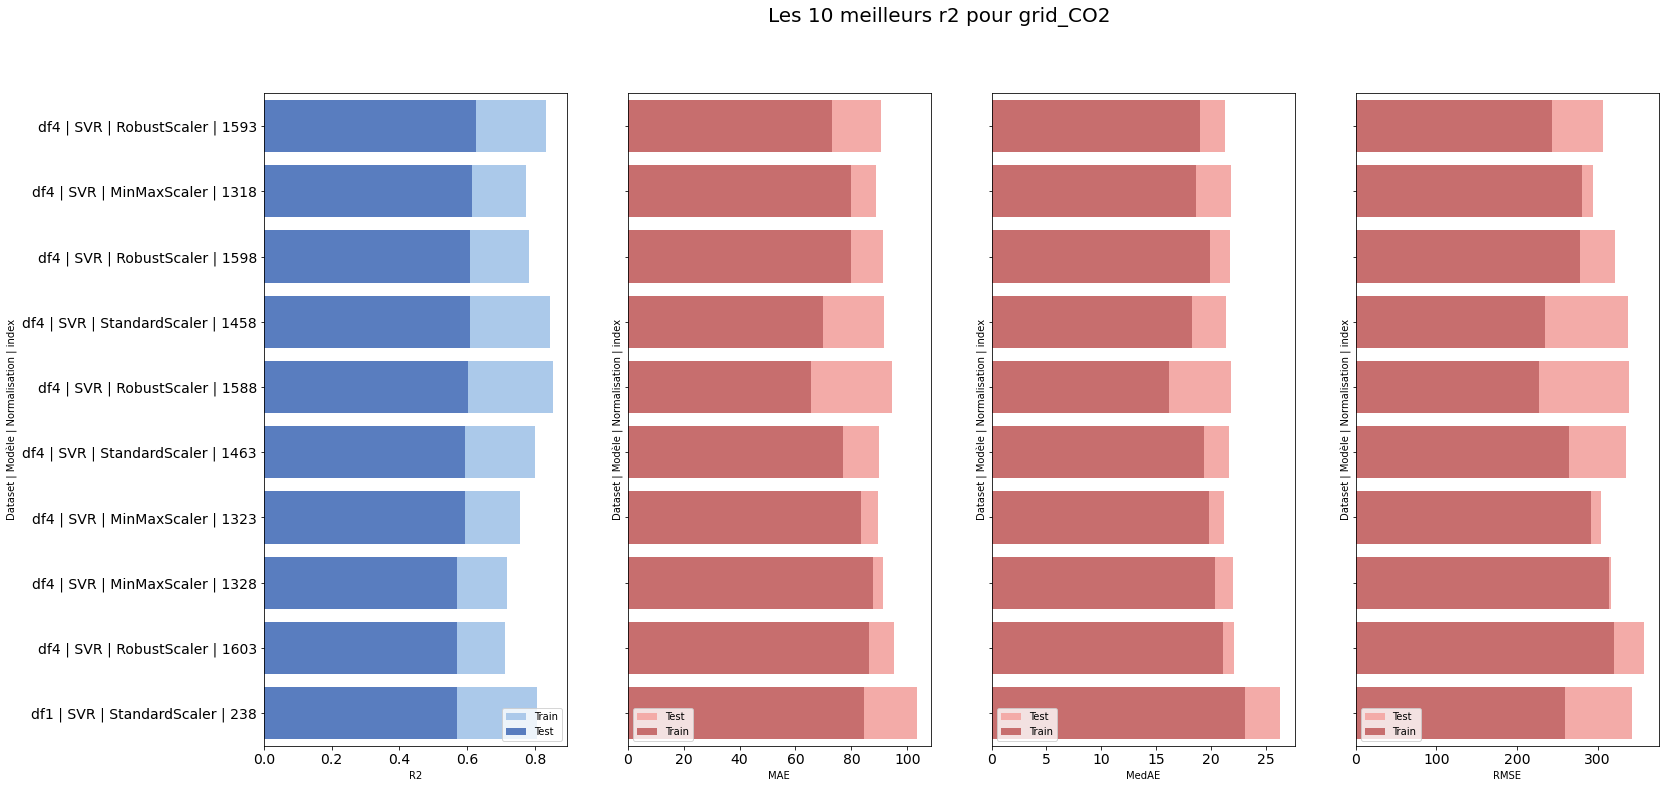

In [55]:
afficher_best(10, df_results_6, 'grid_CO2')

In [56]:
top_results = df_results_6[df_results_6.Target=='grid_CO2'].sort_values('mean_test_r2', ascending=False).head(10)

top_results[results_main_columns]

,Dataset,Modèle,Normalisation,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_median_absolute_error,mean_test_neg_mean_squared_error,Target,mean_fit_time,mean_score_time,params
1593,df4,SVR,RobustScaler,0.626807,-90.496131,-21.280065,-93955.188682,grid_CO2,0.134639,0.021941,{'transformedtargetregressor__regressor__C': 1...
1318,df4,SVR,MinMaxScaler,0.615478,-88.928796,-21.809281,-86429.527334,grid_CO2,0.146008,0.026728,{'transformedtargetregressor__regressor__C': 1...
1598,df4,SVR,RobustScaler,0.609727,-91.445490,-21.714536,-103116.051767,grid_CO2,0.112500,0.020148,{'transformedtargetregressor__regressor__C': 1...
1458,df4,SVR,StandardScaler,0.609587,-91.483114,-21.357582,-113694.833323,grid_CO2,0.122272,0.021543,{'transformedtargetregressor__regressor__C': 1...
1588,df4,SVR,RobustScaler,0.602215,-94.352211,-21.840864,-115010.275791,grid_CO2,0.157977,0.027128,{'transformedtargetregressor__regressor__C': 1...
1463,df4,SVR,StandardScaler,0.594244,-89.998633,-21.696854,-112143.141845,grid_CO2,0.100929,0.017952,{'transformedtargetregressor__regressor__C': 1...
1323,df4,SVR,MinMaxScaler,0.593550,-89.643494,-21.207444,-92053.539072,grid_CO2,0.125264,0.022340,{'transformedtargetregressor__regressor__C': 1...
1328,df4,SVR,MinMaxScaler,0.571393,-91.417663,-22.072943,-99915.545811,grid_CO2,0.110504,0.019149,{'transformedtargetregressor__regressor__C': 1...
1603,df4,SVR,RobustScaler,0.570970,-95.058478,-22.127921,-127982.300888,grid_CO2,0.105916,0.018750,{'transformedtargetregressor__regressor__C': 1...
238,df1,SVR,StandardScaler,0.570453,-103.301176,-26.363948,-117001.257268,grid_CO2,0.099535,0.017551,{'transformedtargetregressor__regressor__C': 1...


In [57]:
top_results['params'].values

array([{'transformedtargetregressor__regressor__C': 10, 'transformedtargetregressor__regressor__epsilon': 0.2, 'transformedtargetregressor__regressor__gamma': 0.01778279410038923},
       {'transformedtargetregressor__regressor__C': 10, 'transformedtargetregressor__regressor__epsilon': 0.0, 'transformedtargetregressor__regressor__gamma': 0.01778279410038923},
       {'transformedtargetregressor__regressor__C': 10, 'transformedtargetregressor__regressor__epsilon': 0.4, 'transformedtargetregressor__regressor__gamma': 0.01778279410038923},
       {'transformedtargetregressor__regressor__C': 10, 'transformedtargetregressor__regressor__epsilon': 0.2, 'transformedtargetregressor__regressor__gamma': 0.01778279410038923},
       {'transformedtargetregressor__regressor__C': 10, 'transformedtargetregressor__regressor__epsilon': 0.0, 'transformedtargetregressor__regressor__gamma': 0.01778279410038923},
       {'transformedtargetregressor__regressor__C': 10, 'transformedtargetregressor__regressor_

--> Les meilleurs r2 sont obtenus avec le modèle SVR sur le dataset 4.  
Le meilleur r2 étant obtenu pour une SVR avec C=10, epsilon=0.2 et Gamma=0.017.  

On peut noter également une amélioration des résultats par rapport aux meilleurs résultats des précédents modèles testés :  
- r2 = 63% vs 61%
- MAE = 90 vs 101
- MedAE = 21 vs 23
- RMSE = 307 vs 345

In [58]:
# On ajoute au DataFrame 'df_results_final' les meilleurs r2 pour chaque modèle.

df = df_results_6

df['log_target'] = 'Yes'

for i in ['SVR', 'KernelRidge']:
    df_results_final = df_results_final.append(df[df['Modèle']==i].sort_values('mean_test_r2', ascending=False).head(1))

## <a name="C5">Test des modèles RandomForest et XGBoost

In [59]:
# Testons maintenant les modèles RandomForest et XGBoost sur la variable target sans log transform sans essayer d'optimiser
# les paramètres dans un premier temps.

from sklearn.ensemble import RandomForestRegressor
import xgboost


df_results_7 = pd.DataFrame(columns = ['Dataset', 'Modèle', 'Normalisation', 'Target'])


for df in [('df1', df1_columns), ('df2', df2_columns), ('df3', df3_columns), ('df4', df4_columns)]:
    
    Xtrain_df = Xtrain[df[1]]
    
    y_CO2_train = ytrain['GHGEmissions(MetricTonsCO2e)']
    
    numerical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype != "object"]
    categorical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype == "object"]
    
    
    for normalizer in [('MinMaxScaler', MinMaxScaler()), ('StandardScaler', StandardScaler()), ('RobustScaler', RobustScaler())]:
        
        numerical_pipeline = make_pipeline(normalizer[1])
        categorical_pipeline = make_pipeline(OneHotEncoder())
        
        preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                               (categorical_pipeline, categorical_features))
        
        
        for type_model in [('RandomForest', RandomForestRegressor()), ('xgboost', xgboost.XGBRegressor())]:
            
            model = make_pipeline(preprocessor, type_model[1])
            
            params = {}
                                
                
            grid_CO2 = GridSearchCV(model, param_grid=params, cv=5, return_train_score=True,
                                      scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error'),
                                      refit = 'r2', n_jobs = -1)
             
            grid_CO2.fit(Xtrain_df, y_CO2_train)
    
            df_grid_CO2_results = pd.DataFrame(grid_CO2.cv_results_)
            df_grid_CO2_results['Dataset'] = df[0]
            df_grid_CO2_results['Modèle'] = type_model[0]
            df_grid_CO2_results['Normalisation'] = normalizer[0]
            df_grid_CO2_results['Target'] = 'grid_CO2'
            
            df_results_7 = df_results_7.append(df_grid_CO2_results, ignore_index=True)

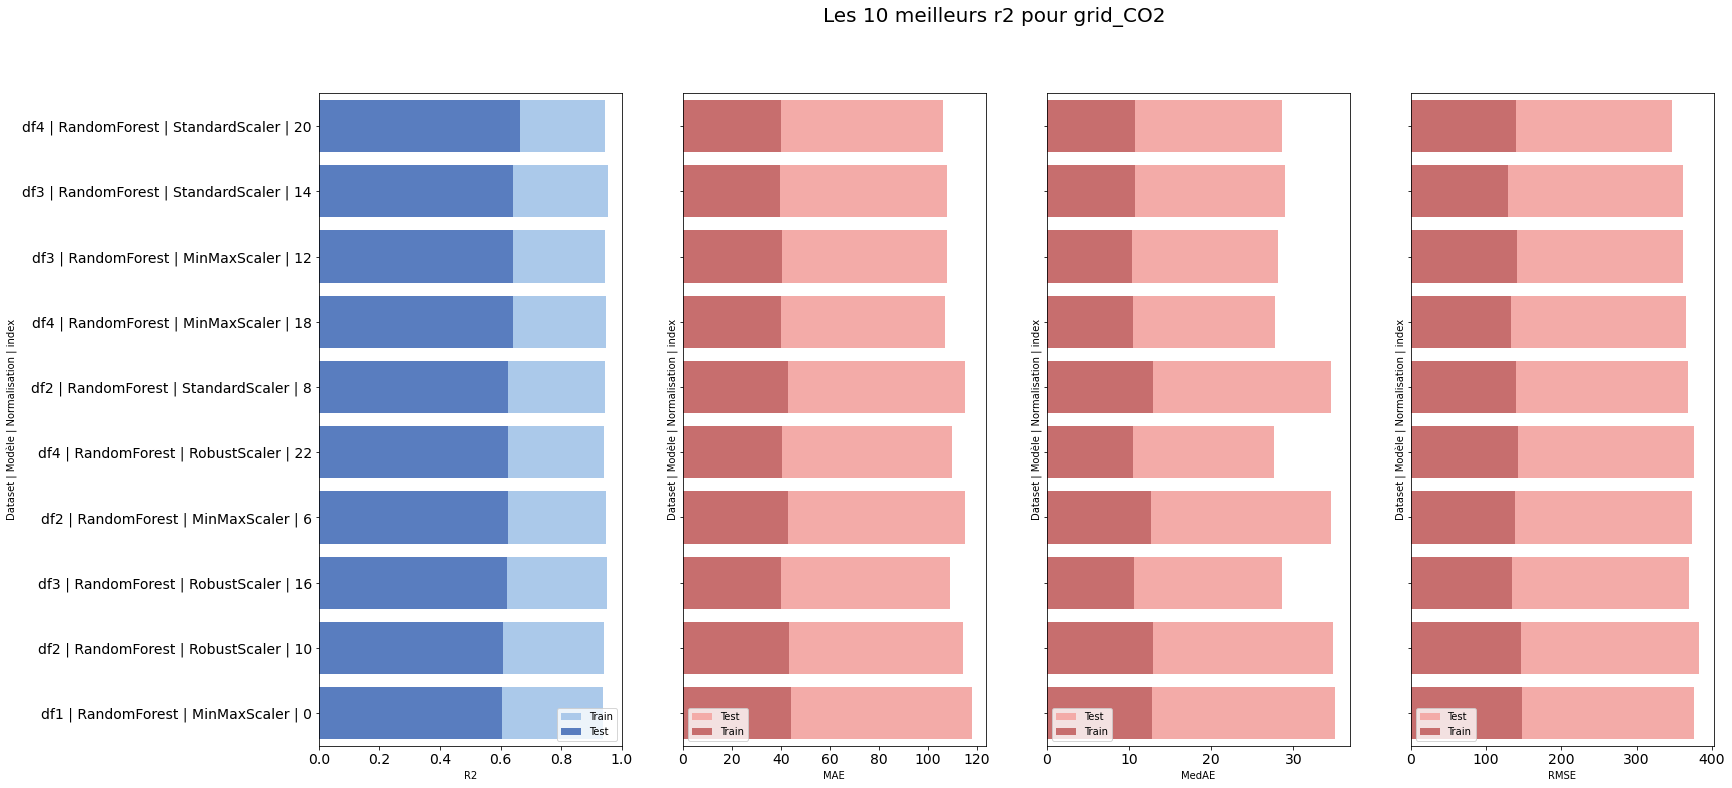

In [60]:
afficher_best(10, df_results_7, 'grid_CO2')

In [61]:
top_results = df_results_7[df_results_7.Target=='grid_CO2'].sort_values('mean_test_r2', ascending=False).head(10)

top_results[results_main_columns]

,Dataset,Modèle,Normalisation,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_median_absolute_error,mean_test_neg_mean_squared_error,Target,mean_fit_time,mean_score_time,params
20,df4,RandomForest,StandardScaler,0.663044,-106.189214,-28.624110,-120022.716489,grid_CO2,1.359561,0.018151,{}
14,df3,RandomForest,StandardScaler,0.640375,-107.576908,-29.019730,-130641.289013,grid_CO2,1.378112,0.016954,{}
12,df3,RandomForest,MinMaxScaler,0.640038,-107.819437,-28.110170,-130556.371702,grid_CO2,1.347800,0.020744,{}
18,df4,RandomForest,MinMaxScaler,0.640010,-106.978258,-27.774680,-134032.941889,grid_CO2,1.492014,0.022540,{}
8,df2,RandomForest,StandardScaler,0.624965,-114.887345,-34.569605,-135321.328370,grid_CO2,1.179257,0.019549,{}
22,df4,RandomForest,RobustScaler,0.624811,-109.592680,-27.634240,-141168.302233,grid_CO2,1.284562,0.018152,{}
6,df2,RandomForest,MinMaxScaler,0.624120,-115.086768,-34.511400,-139318.821958,grid_CO2,1.181455,0.017161,{}
16,df3,RandomForest,RobustScaler,0.622474,-109.023602,-28.613850,-136865.530509,grid_CO2,1.290147,0.017953,{}
10,df2,RandomForest,RobustScaler,0.608815,-114.341458,-34.792880,-146925.969891,grid_CO2,1.130192,0.017154,{}
0,df1,RandomForest,MinMaxScaler,0.603947,-117.721408,-35.109720,-141922.658715,grid_CO2,0.784704,0.019150,{}


In [62]:
df_results_7[df_results_7['Modèle']=='xgboost'].sort_values('mean_test_r2', ascending=False).head(10)[results_main_columns]

,Dataset,Modèle,Normalisation,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_median_absolute_error,mean_test_neg_mean_squared_error,Target,mean_fit_time,mean_score_time,params
15,df3,xgboost,StandardScaler,0.499214,-119.024182,-34.298521,-186268.457658,grid_CO2,0.324329,0.015559,{}
21,df4,xgboost,StandardScaler,0.499175,-119.084294,-34.389404,-186276.343085,grid_CO2,0.334304,0.015957,{}
3,df1,xgboost,StandardScaler,0.480036,-125.870715,-36.826079,-187942.047518,grid_CO2,0.267667,0.013165,{}
9,df2,xgboost,StandardScaler,0.475050,-126.488682,-37.026174,-188393.652526,grid_CO2,0.351258,0.013763,{}
13,df3,xgboost,MinMaxScaler,0.434581,-126.680262,-34.655382,-222046.470535,grid_CO2,0.377389,0.015359,{}
19,df4,xgboost,MinMaxScaler,0.434510,-126.719649,-34.738663,-222061.913355,grid_CO2,0.380182,0.017154,{}
17,df3,xgboost,RobustScaler,0.434502,-125.307499,-34.499181,-218782.755464,grid_CO2,0.363426,0.015559,{}
23,df4,xgboost,RobustScaler,0.434498,-125.355243,-34.622844,-218795.452325,grid_CO2,0.364413,0.015359,{}
11,df2,xgboost,RobustScaler,0.433678,-128.047533,-37.015815,-220373.319653,grid_CO2,0.338094,0.013764,{}
7,df2,xgboost,MinMaxScaler,0.416595,-129.829767,-36.358510,-227255.944232,grid_CO2,0.348458,0.014761,{}


--> On peut voir sur le graphique qu'il y a un très fort sur-apprentissage pour les 10 modèles avec le meilleur r2 car on peut voir une grande différence entre les résultats moyen du train set et ceux du test set de la cross validation.  

Les meilleurs r2 sont obtenus avec le modèle RandomForest.

On peut noter une amélioration de certaines métriques par rapport aux meilleurs résultats des précédents modèles testés sur la variables target sans le log transform :  
- r2 = 66% vs 61%
- MAE = 106 vs 141
- MedAE = 29 vs 54 
- RMSE = 346 vs 367

In [63]:
# On ajoute au DataFrame 'df_results_final' les meilleurs r2 pour chaque modèle.

df = df_results_7

df['log_target'] = 'No'

for i in ['RandomForest', 'xgboost']:
    df_results_final = df_results_final.append(df[df['Modèle']==i].sort_values('mean_test_r2', ascending=False).head(1))

In [64]:
# Analysons maintenant les résultats avec le log transform sur la variable target.


df_results_8 = pd.DataFrame(columns = ['Dataset', 'Modèle', 'Normalisation', 'Target'])


for df in [('df1', df1_columns), ('df2', df2_columns), ('df3', df3_columns), ('df4', df4_columns)]:
    
    Xtrain_df = Xtrain[df[1]]
    
    y_CO2_train = ytrain['GHGEmissions(MetricTonsCO2e)']
    
    numerical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype != "object"]
    categorical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype == "object"]
    
    
    for normalizer in [('MinMaxScaler', MinMaxScaler()), ('StandardScaler', StandardScaler()), ('RobustScaler', RobustScaler())]:
        
        numerical_pipeline = make_pipeline(normalizer[1])
        categorical_pipeline = make_pipeline(OneHotEncoder())
        
        preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                               (categorical_pipeline, categorical_features))
        
        
        for type_model in [('RandomForest', RandomForestRegressor()), ('xgboost', xgboost.XGBRegressor())]:
            
            model = make_pipeline(preprocessor, TransformedTargetRegressor(regressor=type_model[1], func=np.log,
                                                                           inverse_func=np.exp))
            
            params = {}
                                
                
            grid_CO2 = GridSearchCV(model, param_grid=params, cv=5, return_train_score=True,
                                      scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error'),
                                      refit = 'r2', n_jobs = -1)
             
            grid_CO2.fit(Xtrain_df, y_CO2_train)
    
            df_grid_CO2_results = pd.DataFrame(grid_CO2.cv_results_)
            df_grid_CO2_results['Dataset'] = df[0]
            df_grid_CO2_results['Modèle'] = type_model[0]
            df_grid_CO2_results['Normalisation'] = normalizer[0]
            df_grid_CO2_results['Target'] = 'grid_CO2'
            
            df_results_8 = df_results_8.append(df_grid_CO2_results, ignore_index=True)

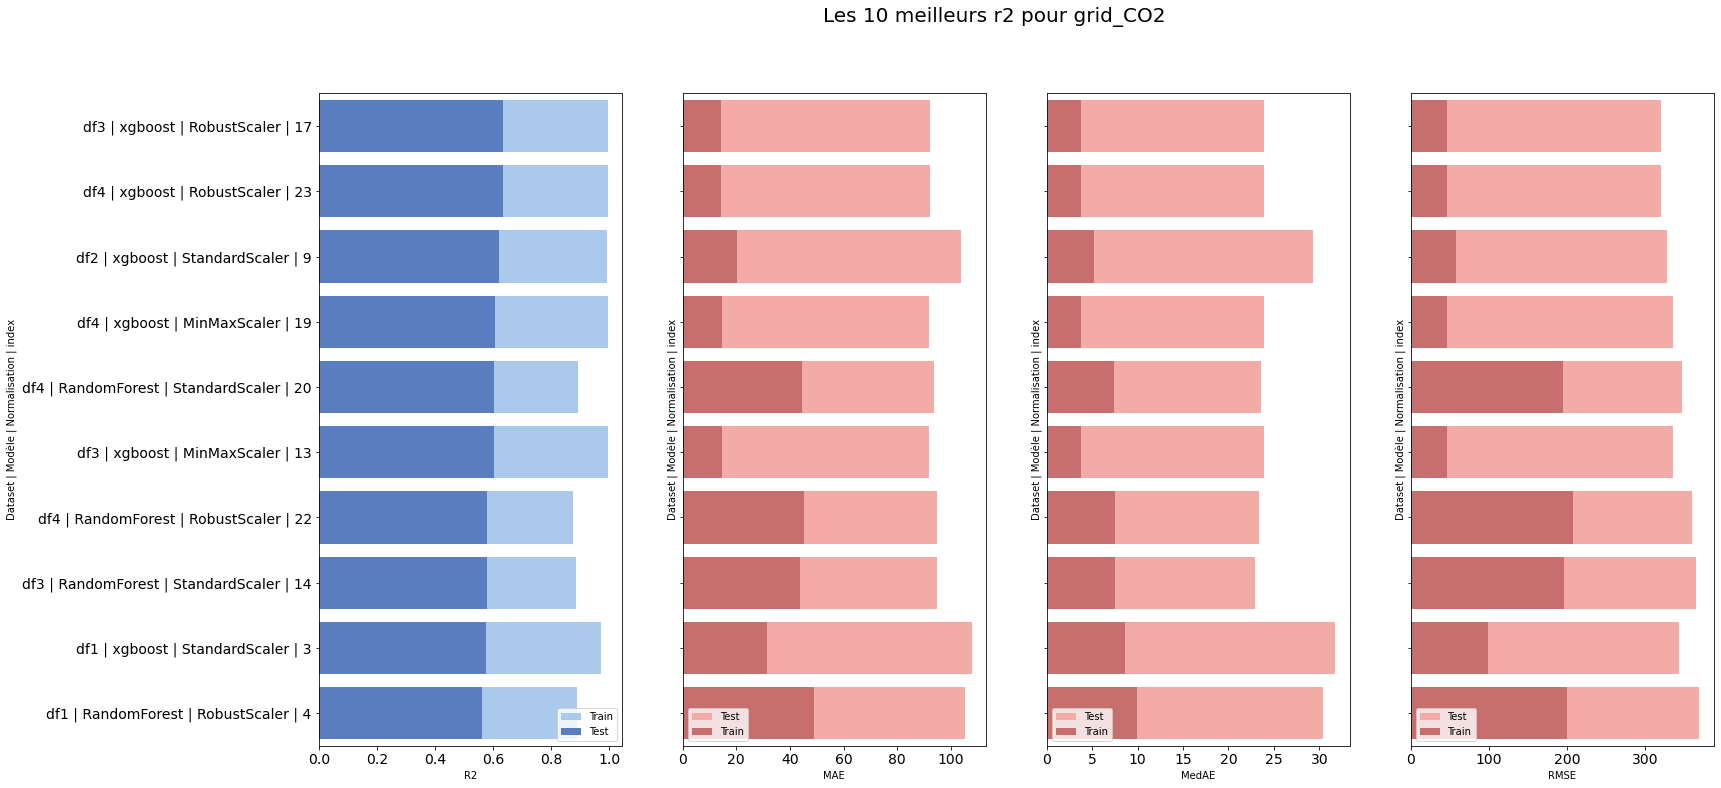

In [65]:
afficher_best(10, df_results_8, 'grid_CO2')

In [66]:
top_results = df_results_8[df_results_8.Target=='grid_CO2'].sort_values('mean_test_r2', ascending=False).head(10)

top_results[results_main_columns]

,Dataset,Modèle,Normalisation,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_median_absolute_error,mean_test_neg_mean_squared_error,Target,mean_fit_time,mean_score_time,params
17,df3,xgboost,RobustScaler,0.634726,-92.338871,-23.911561,-102358.022313,grid_CO2,0.372801,0.015558,{}
23,df4,xgboost,RobustScaler,0.634707,-92.342584,-23.911561,-102360.605571,grid_CO2,0.376183,0.015559,{}
9,df2,xgboost,StandardScaler,0.619878,-103.930332,-29.285272,-107097.827929,grid_CO2,0.304778,0.014165,{}
19,df4,xgboost,MinMaxScaler,0.604992,-91.921125,-23.869639,-112015.101602,grid_CO2,0.391542,0.015758,{}
20,df4,RandomForest,StandardScaler,0.602506,-93.902253,-23.587638,-119975.508661,grid_CO2,1.317671,0.018751,{}
13,df3,xgboost,MinMaxScaler,0.601645,-92.052087,-23.897661,-112724.669744,grid_CO2,0.430054,0.015758,{}
22,df4,RandomForest,RobustScaler,0.580275,-94.771135,-23.350194,-128856.185545,grid_CO2,1.375339,0.022747,{}
14,df3,RandomForest,StandardScaler,0.578334,-94.981887,-22.888851,-132878.509276,grid_CO2,1.392673,0.018949,{}
3,df1,xgboost,StandardScaler,0.575594,-107.772583,-31.765885,-117676.036599,grid_CO2,0.298202,0.013365,{}
4,df1,RandomForest,RobustScaler,0.562743,-105.208865,-30.375840,-136030.277804,grid_CO2,0.699927,0.016357,{}


--> On peut voir également sur le graphique qu'il y a un très fort sur-apprentissage pour les 10 modèles avec le meilleur r2 car on peut voir une grande différence entre les résultats moyen du train set et ceux du test set de la cross validation.  

Les meilleurs r2 sont obtenus avec le modèle xgboost.

On ne note cependant pas d'améliration des métriques par rapport aux meilleurs résultats des précédents modèles testés sur la variables target avec le log transform :  
- r2 = 63% vs 63%
- MAE = 92 vs 90
- MedAE = 24 vs 21 
- RMSE = 320 vs 307

In [67]:
# On ajoute au DataFrame 'df_results_final' les meilleurs r2 pour chaque modèle.

df = df_results_8

df['log_target'] = 'Yes'

for i in ['RandomForest', 'xgboost']:
    df_results_final = df_results_final.append(df[df['Modèle']==i].sort_values('mean_test_r2', ascending=False).head(1))

In [74]:
# Essayons maintenant d'optimiser les paramètres des 2 modèles pour éviter le sur-apprentissage et améliorer les performances.
# Commençons avec la variable target sans log transform.

# Afin de ne pas avoir une gridSearchCV qui tourne pendant trop longtemps pour l'optimisation des paramètres, je vais
# utiliser une RandomizedSearchCV pour l'optimisation de ces modèles.

from sklearn.model_selection import RandomizedSearchCV


df_results_9 = pd.DataFrame(columns = ['Dataset', 'Modèle', 'Normalisation', 'Target'])


for df in [('df1', df1_columns), ('df2', df2_columns), ('df3', df3_columns), ('df4', df4_columns)]:
    
    Xtrain_df = Xtrain[df[1]]
    
    y_CO2_train = ytrain['GHGEmissions(MetricTonsCO2e)']
    
    numerical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype != "object"]
    categorical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype == "object"]
    
    
    for normalizer in [('MinMaxScaler', MinMaxScaler()), ('StandardScaler', StandardScaler()), ('RobustScaler', RobustScaler())]:
        
        numerical_pipeline = make_pipeline(normalizer[1])
        categorical_pipeline = make_pipeline(OneHotEncoder())
        
        preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                               (categorical_pipeline, categorical_features))
        
        
        for type_model in [('RandomForest', RandomForestRegressor()), ('xgboost', xgboost.XGBRegressor())]:
            
            model = make_pipeline(preprocessor, type_model[1])
            
            if type_model[0]=='RandomForest':
                
                params = {
                    'randomforestregressor__max_features' : ['sqrt', 'log2'],
                     'randomforestregressor__max_depth': [5, 15, 25, 50],
                     'randomforestregressor__min_samples_split': [5, 10, 20],
                     'randomforestregressor__bootstrap' : [True, False],
                     'randomforestregressor__min_samples_leaf': [5, 10]
                }
            
            elif type_model[0]=='xgboost':
                
                params = {
                    'xgbregressor__learning_rate' : [0.1, 0.2, 0.3, 0.5, 0.8],
                     'xgbregressor__gamma': [0, 0.25, 0.5, 0.75, 1.0],
                     'xgbregressor__max_depth': [6, 10, 15, 20],
                     'xgbregressor__min_child_weight' : [0.1, 1.0, 3.0, 4, 5.0, 6, 7.0, 10.0, 20],
                     'xgbregressor__n_estimators': [1, 2, 3, 4, 5, 10, 15]
                }
          
            
            grid_CO2 = RandomizedSearchCV(model, param_distributions=params, cv=5, return_train_score=True,
                                      scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error'),
                                      refit = 'r2', n_jobs = -1, n_iter=100)
             
            grid_CO2.fit(Xtrain_df, y_CO2_train)
    
            df_grid_CO2_results = pd.DataFrame(grid_CO2.cv_results_)
            df_grid_CO2_results['Dataset'] = df[0]
            df_grid_CO2_results['Modèle'] = type_model[0]
            df_grid_CO2_results['Normalisation'] = normalizer[0]
            df_grid_CO2_results['Target'] = 'grid_CO2'
            
            df_results_9 = df_results_9.append(df_grid_CO2_results, ignore_index=True)

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packag

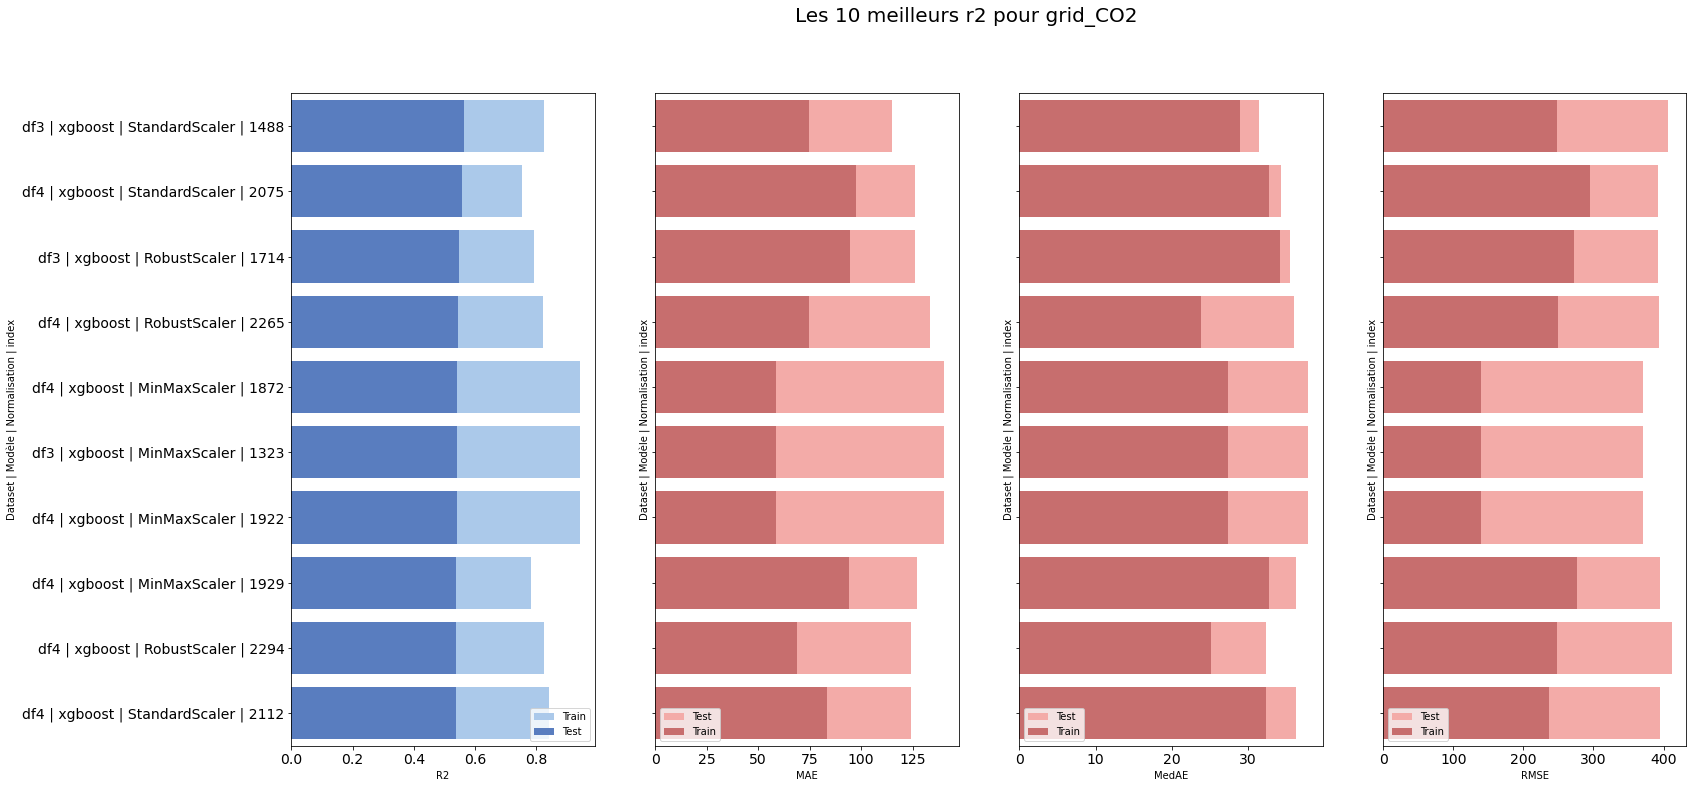

In [75]:
afficher_best(10, df_results_9, 'grid_CO2')

In [76]:
top_results = df_results_9[df_results_9.Target=='grid_CO2'].sort_values('mean_test_r2', ascending=False).head(10)

top_results[results_main_columns]

,Dataset,Modèle,Normalisation,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_median_absolute_error,mean_test_neg_mean_squared_error,Target,mean_fit_time,mean_score_time,params
1488,df3,xgboost,StandardScaler,0.563795,-115.147808,-31.408775,-164910.376623,grid_CO2,0.179320,0.013763,"{'xgbregressor__n_estimators': 15, 'xgbregress..."
2075,df4,xgboost,StandardScaler,0.558025,-126.087167,-34.346277,-153435.989083,grid_CO2,0.065225,0.015160,"{'xgbregressor__n_estimators': 4, 'xgbregresso..."
1714,df3,xgboost,RobustScaler,0.548223,-126.291859,-35.505159,-153936.539097,grid_CO2,0.060835,0.013965,"{'xgbregressor__n_estimators': 5, 'xgbregresso..."
2265,df4,xgboost,RobustScaler,0.544159,-133.223393,-35.970500,-154735.191684,grid_CO2,0.104719,0.015957,"{'xgbregressor__n_estimators': 5, 'xgbregresso..."
1872,df4,xgboost,MinMaxScaler,0.540252,-140.355633,-37.873432,-137458.763411,grid_CO2,0.195277,0.015758,"{'xgbregressor__n_estimators': 15, 'xgbregress..."
1323,df3,xgboost,MinMaxScaler,0.540252,-140.355633,-37.873432,-137458.763411,grid_CO2,0.202458,0.015159,"{'xgbregressor__n_estimators': 15, 'xgbregress..."
1922,df4,xgboost,MinMaxScaler,0.540252,-140.355633,-37.873432,-137458.763411,grid_CO2,0.388186,0.015958,"{'xgbregressor__n_estimators': 15, 'xgbregress..."
1929,df4,xgboost,MinMaxScaler,0.539140,-127.349454,-36.297929,-155965.642980,grid_CO2,0.062831,0.016157,"{'xgbregressor__n_estimators': 5, 'xgbregresso..."
2294,df4,xgboost,RobustScaler,0.536746,-124.165766,-32.360577,-169841.267474,grid_CO2,0.234571,0.014362,"{'xgbregressor__n_estimators': 15, 'xgbregress..."
2112,df4,xgboost,StandardScaler,0.536501,-124.039595,-36.324100,-155980.080330,grid_CO2,0.146208,0.015359,"{'xgbregressor__n_estimators': 15, 'xgbregress..."


--> Il n'y a pas d'amélioration des métriques lorsque l'on essaie d'optimiser les paramètres par rapport aux paramètres par défaut des 2 modèles quand on utilise la variable target sans le log transform.

In [86]:
# On ajoute au DataFrame 'df_results_final' les meilleurs r2 pour chaque modèle.

df = df_results_9

df['log_target'] = 'No'

for i in ['RandomForest', 'xgboost']:
    df_results_final = df_results_final.append(df[df['Modèle']==i].sort_values('mean_test_r2', ascending=False).head(1))

In [72]:
# Essayons maintenant d'optimiser les paramètres des 2 modèles pour la variable target avec log transform.


df_results_10 = pd.DataFrame(columns = ['Dataset', 'Modèle', 'Normalisation', 'Target'])


for df in [('df1', df1_columns), ('df2', df2_columns), ('df3', df3_columns), ('df4', df4_columns)]:
    
    Xtrain_df = Xtrain[df[1]]
    
    y_CO2_train = ytrain['GHGEmissions(MetricTonsCO2e)']
    
    numerical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype != "object"]
    categorical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype == "object"]
    
    
    for normalizer in [('MinMaxScaler', MinMaxScaler()), ('StandardScaler', StandardScaler()), ('RobustScaler', RobustScaler())]:
        
        numerical_pipeline = make_pipeline(normalizer[1])
        categorical_pipeline = make_pipeline(OneHotEncoder())
        
        preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                               (categorical_pipeline, categorical_features))
        
        
        for type_model in [('RandomForest', RandomForestRegressor()), ('xgboost', xgboost.XGBRegressor())]:
            
            model = make_pipeline(preprocessor, TransformedTargetRegressor(regressor=type_model[1], func=np.log,
                                                                           inverse_func=np.exp))
            
            if type_model[0]=='RandomForest':
                
                params = {
                    'transformedtargetregressor__regressor__max_features' : ['sqrt', 'log2'],
                     'transformedtargetregressor__regressor__max_depth': [5, 15, 25, 50],
                     'transformedtargetregressor__regressor__min_samples_split': [5, 10, 20],
                     'transformedtargetregressor__regressor__bootstrap' : [True, False],
                     'transformedtargetregressor__regressor__min_samples_leaf': [5, 10]
                }
            
            elif type_model[0]=='xgboost':
                
                params = {
                    'transformedtargetregressor__regressor__learning_rate' : [0.1, 0.2, 0.3, 0.5, 0.8],
                     'transformedtargetregressor__regressor__gamma': [0, 0.25, 0.5, 0.75, 1.0],
                     'transformedtargetregressor__regressor__max_depth': [6, 10, 15, 20],
                     'transformedtargetregressor__regressor__min_child_weight' : [0.1, 1.0, 3.0, 4, 5.0, 6, 7.0, 10.0, 20],
                     'transformedtargetregressor__regressor__n_estimators': [1, 2, 3, 4, 5, 10, 15]
                }
          
            
            grid_CO2 = RandomizedSearchCV(model, param_distributions=params, cv=5, return_train_score=True,
                                      scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error'),
                                      refit = 'r2', n_jobs = -1, n_iter=50)
             
            grid_CO2.fit(Xtrain_df, y_CO2_train)
    
            df_grid_CO2_results = pd.DataFrame(grid_CO2.cv_results_)
            df_grid_CO2_results['Dataset'] = df[0]
            df_grid_CO2_results['Modèle'] = type_model[0]
            df_grid_CO2_results['Normalisation'] = normalizer[0]
            df_grid_CO2_results['Target'] = 'grid_CO2'
            
            df_results_10 = df_results_10.append(df_grid_CO2_results, ignore_index=True)

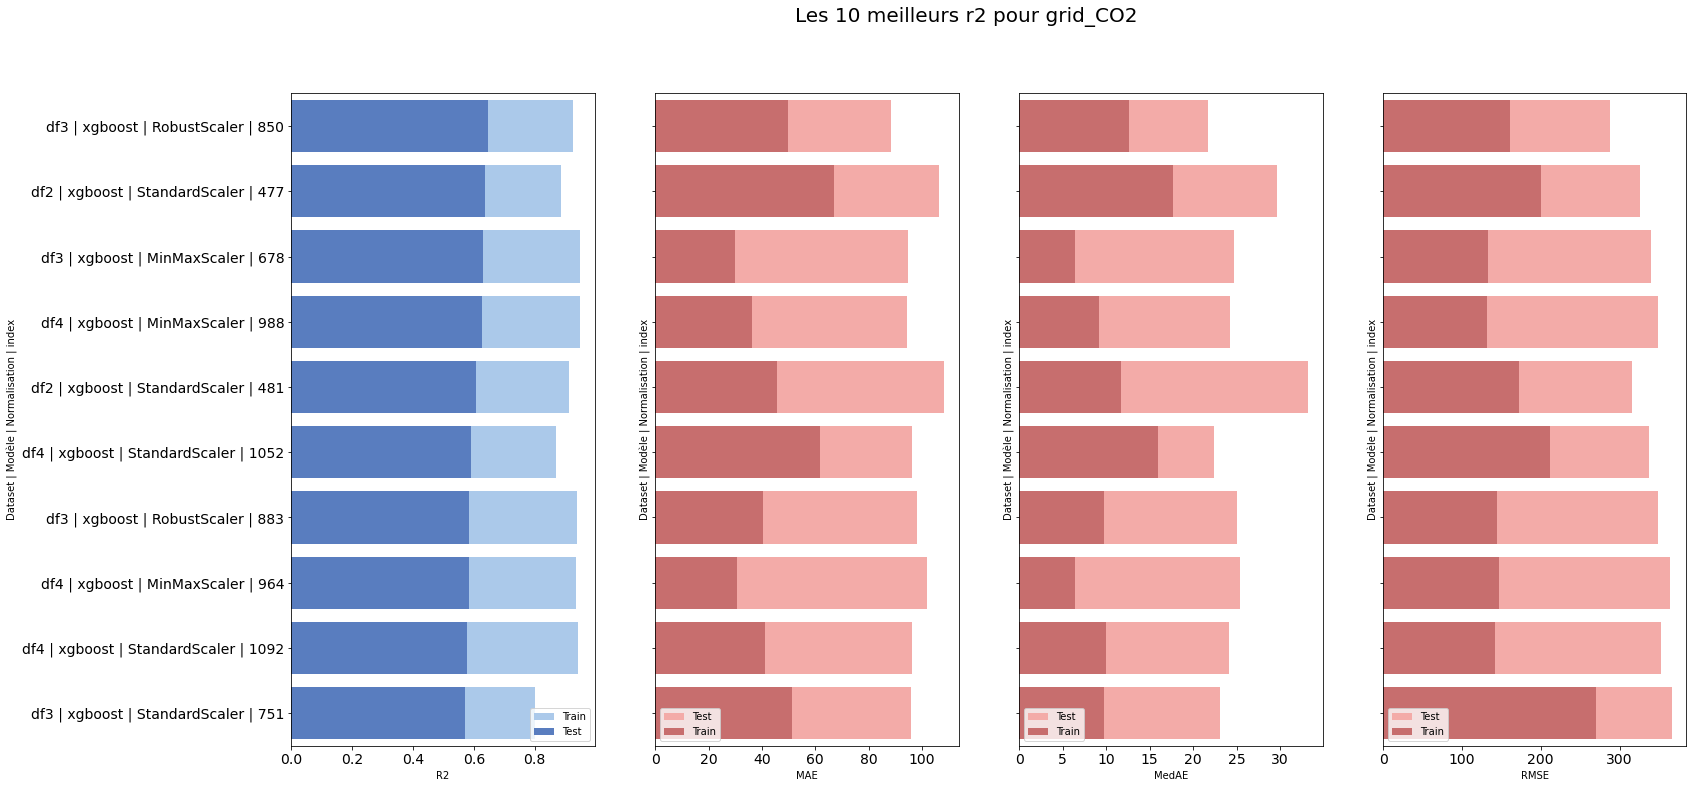

In [73]:
afficher_best(10, df_results_10, 'grid_CO2')

In [87]:
top_results = df_results_10[df_results_10.Target=='grid_CO2'].sort_values('mean_test_r2', ascending=False).head(10)

top_results[results_main_columns]

,Dataset,Modèle,Normalisation,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_median_absolute_error,mean_test_neg_mean_squared_error,Target,mean_fit_time,mean_score_time,params
850,df3,xgboost,RobustScaler,0.645245,-88.435901,-21.683550,-82477.597610,grid_CO2,0.102923,0.014761,{'transformedtargetregressor__regressor__n_est...
477,df2,xgboost,StandardScaler,0.637105,-106.435564,-29.605285,-106228.340679,grid_CO2,0.133044,0.013165,{'transformedtargetregressor__regressor__n_est...
678,df3,xgboost,MinMaxScaler,0.630695,-94.950498,-24.708161,-115502.908235,grid_CO2,0.508240,0.015158,{'transformedtargetregressor__regressor__n_est...
988,df4,xgboost,MinMaxScaler,0.627313,-94.404036,-24.217871,-121385.307835,grid_CO2,0.251726,0.014760,{'transformedtargetregressor__regressor__n_est...
481,df2,xgboost,StandardScaler,0.607751,-108.365950,-33.238123,-100001.203506,grid_CO2,0.231580,0.012167,{'transformedtargetregressor__regressor__n_est...
1052,df4,xgboost,StandardScaler,0.591298,-96.371822,-22.434715,-113401.434656,grid_CO2,0.139825,0.015359,{'transformedtargetregressor__regressor__n_est...
883,df3,xgboost,RobustScaler,0.585413,-97.994141,-25.090712,-121524.283088,grid_CO2,0.232778,0.014760,{'transformedtargetregressor__regressor__n_est...
964,df4,xgboost,MinMaxScaler,0.582756,-101.958763,-25.398775,-132184.471421,grid_CO2,0.403520,0.014362,{'transformedtargetregressor__regressor__n_est...
1092,df4,xgboost,StandardScaler,0.577226,-96.104756,-24.148245,-124420.772344,grid_CO2,0.457177,0.016556,{'transformedtargetregressor__regressor__n_est...
751,df3,xgboost,StandardScaler,0.571317,-96.010690,-23.108909,-134318.428273,grid_CO2,0.372404,0.016755,{'transformedtargetregressor__regressor__n_est...


In [88]:
top_results['params'].values

array([{'transformedtargetregressor__regressor__n_estimators': 15, 'transformedtargetregressor__regressor__min_child_weight': 1.0, 'transformedtargetregressor__regressor__max_depth': 6, 'transformedtargetregressor__regressor__learning_rate': 0.5, 'transformedtargetregressor__regressor__gamma': 0.25},
       {'transformedtargetregressor__regressor__n_estimators': 15, 'transformedtargetregressor__regressor__min_child_weight': 6, 'transformedtargetregressor__regressor__max_depth': 6, 'transformedtargetregressor__regressor__learning_rate': 0.8, 'transformedtargetregressor__regressor__gamma': 1.0},
       {'transformedtargetregressor__regressor__n_estimators': 15, 'transformedtargetregressor__regressor__min_child_weight': 0.1, 'transformedtargetregressor__regressor__max_depth': 15, 'transformedtargetregressor__regressor__learning_rate': 0.5, 'transformedtargetregressor__regressor__gamma': 0.25},
       {'transformedtargetregressor__regressor__n_estimators': 15, 'transformedtargetregressor__

--> Les meilleurs r2 sont obtenus avec le modèle xgboost pour le dataset 3 avec les paramètres suivants :
'n_estimators': 15, 'min_child_weight': 1.0, 'max_depth': 6, 'learning_rate': 0.5, 'gamma': 0.25

On remarque une amélioration des métriques par rapport aux meilleurs modèles obtenus jusqu'à présent :
- r2 = 65% vs 63%
- MAE = 88 vs 90
- MedAE = 22 vs 21 (pas d'amélioration pour la MedAE)
- RMSE = 287 vs 307

In [89]:
# On ajoute au DataFrame 'df_results_final' les meilleurs r2 pour chaque modèle.

df = df_results_10

df['log_target'] = 'Yes'

for i in ['RandomForest', 'xgboost']:
    df_results_final = df_results_final.append(df[df['Modèle']==i].sort_values('mean_test_r2', ascending=False).head(1))

## <a name="C6">Test du modèle MLPRegressor

In [90]:
# Testons maintenant le modèle MLPRegressor sur la variable target sans log transform sans essayer d'optimiser
# les paramètres dans un premier temps.

from sklearn.neural_network import MLPRegressor

df_results_11 = pd.DataFrame(columns = ['Dataset', 'Modèle', 'Normalisation', 'Target'])


for df in [('df1', df1_columns), ('df2', df2_columns), ('df3', df3_columns), ('df4', df4_columns)]:
    
    Xtrain_df = Xtrain[df[1]]
    
    y_CO2_train = ytrain['GHGEmissions(MetricTonsCO2e)']
    
    numerical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype != "object"]
    categorical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype == "object"]
    
    
    for normalizer in [('MinMaxScaler', MinMaxScaler()), ('StandardScaler', StandardScaler()), ('RobustScaler', RobustScaler())]:
        
        numerical_pipeline = make_pipeline(normalizer[1])
        categorical_pipeline = make_pipeline(OneHotEncoder())
        
        preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                               (categorical_pipeline, categorical_features))
        
        
        for type_model in [('MLPRegressor', MLPRegressor())]:
            
            model = make_pipeline(preprocessor, type_model[1])
            
            params = {}
                                
                
            grid_CO2 = GridSearchCV(model, param_grid=params, cv=5, return_train_score=True,
                                      scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error'),
                                      refit = 'r2', n_jobs = -1)
             
            grid_CO2.fit(Xtrain_df, y_CO2_train)
    
            df_grid_CO2_results = pd.DataFrame(grid_CO2.cv_results_)
            df_grid_CO2_results['Dataset'] = df[0]
            df_grid_CO2_results['Modèle'] = type_model[0]
            df_grid_CO2_results['Normalisation'] = normalizer[0]
            df_grid_CO2_results['Target'] = 'grid_CO2'
            
            df_results_11 = df_results_11.append(df_grid_CO2_results, ignore_index=True)

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\neural_network\_multi

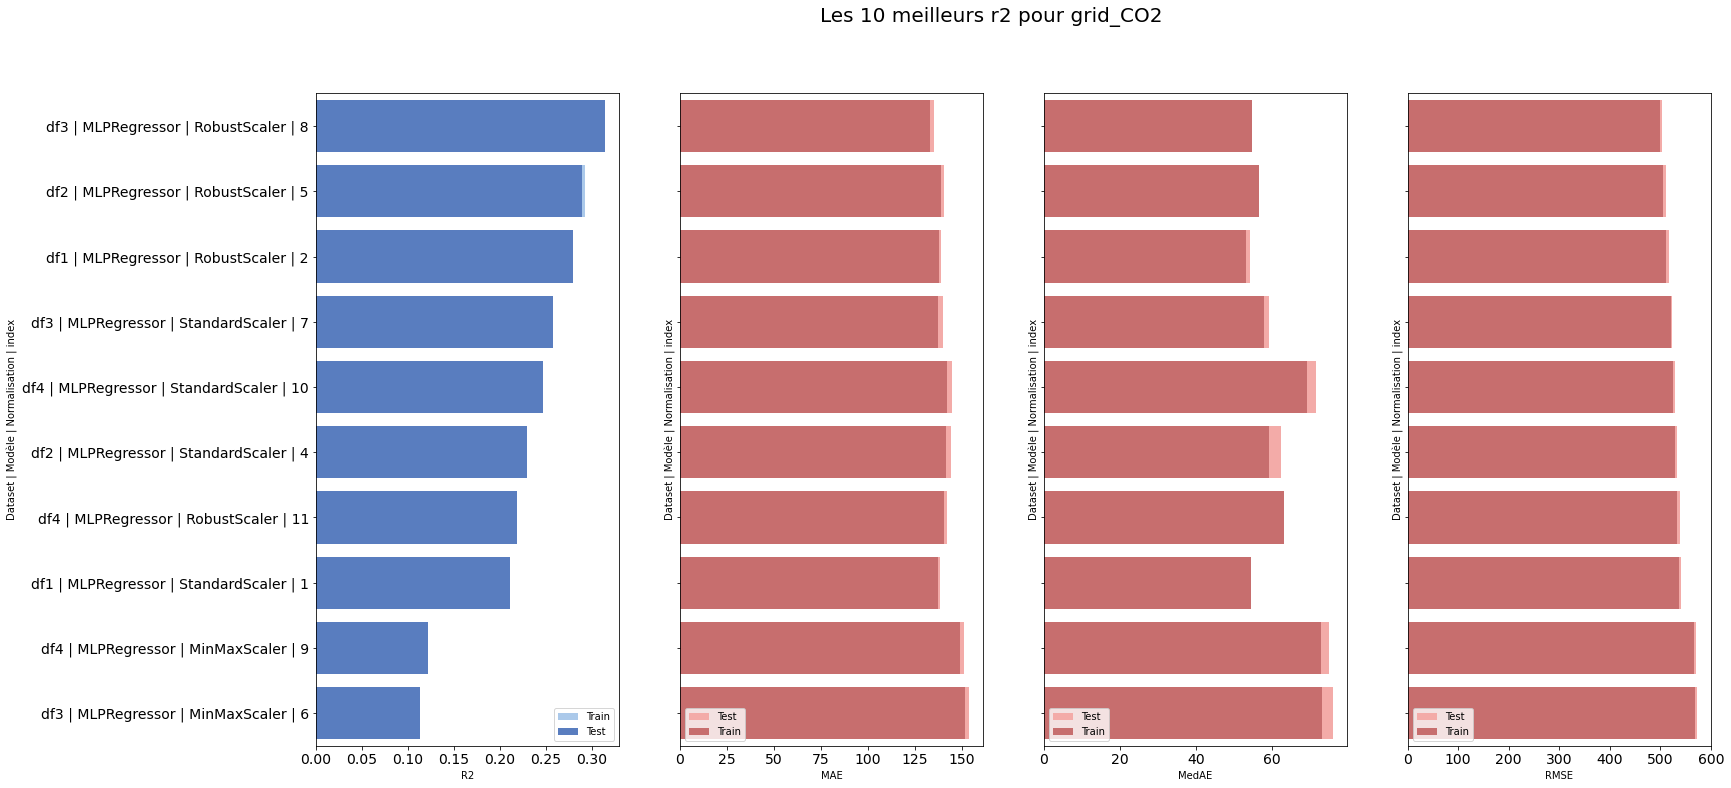

In [91]:
afficher_best(10, df_results_11, 'grid_CO2')

In [92]:
top_results = df_results_11[df_results_11.Target=='grid_CO2'].sort_values('mean_test_r2', ascending=False).head(10)

top_results[results_main_columns]

,Dataset,Modèle,Normalisation,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_median_absolute_error,mean_test_neg_mean_squared_error,Target,mean_fit_time,mean_score_time,params
8,df3,MLPRegressor,RobustScaler,0.313676,-135.183549,-54.876191,-254009.872960,grid_CO2,1.424390,0.007180,{}
5,df2,MLPRegressor,RobustScaler,0.288783,-140.629873,-56.716224,-262161.718651,grid_CO2,1.282969,0.005984,{}
2,df1,MLPRegressor,RobustScaler,0.278843,-139.063375,-54.220423,-266546.793955,grid_CO2,1.389517,0.005385,{}
7,df3,MLPRegressor,StandardScaler,0.257318,-140.090907,-59.329867,-274325.976527,grid_CO2,1.674121,0.008575,{}
10,df4,MLPRegressor,StandardScaler,0.246413,-144.828724,-71.610236,-279391.911716,grid_CO2,1.611290,0.007388,{}
4,df2,MLPRegressor,StandardScaler,0.229563,-144.157301,-62.493973,-284513.486319,grid_CO2,1.574590,0.007379,{}
11,df4,MLPRegressor,RobustScaler,0.218423,-142.019748,-62.368642,-289247.974909,grid_CO2,1.517143,0.008177,{}
1,df1,MLPRegressor,StandardScaler,0.211221,-138.393589,-54.494555,-292777.481241,grid_CO2,1.213570,0.006185,{}
9,df4,MLPRegressor,MinMaxScaler,0.122133,-151.022633,-74.948883,-324419.285457,grid_CO2,1.569802,0.008575,{}
6,df3,MLPRegressor,MinMaxScaler,0.113455,-153.614951,-75.985130,-326570.864806,grid_CO2,1.487629,0.007373,{}


--> On obtient de mauvais résultats sur la variable target sans log transform.

In [93]:
# On ajoute au DataFrame 'df_results_final' les meilleurs r2 pour chaque modèle.

df = df_results_11

df['log_target'] = 'No'

for i in ['MLPRegressor']:
    df_results_final = df_results_final.append(df[df['Modèle']==i].sort_values('mean_test_r2', ascending=False).head(1))

In [94]:
# Essayons maintenant sur la variable target avec le log transform. 


df_results_12 = pd.DataFrame(columns = ['Dataset', 'Modèle', 'Normalisation', 'Target'])


for df in [('df1', df1_columns), ('df2', df2_columns), ('df3', df3_columns), ('df4', df4_columns)]:
    
    Xtrain_df = Xtrain[df[1]]
    
    y_CO2_train = ytrain['GHGEmissions(MetricTonsCO2e)']
    
    numerical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype != "object"]
    categorical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype == "object"]
    
    
    for normalizer in [('MinMaxScaler', MinMaxScaler()), ('StandardScaler', StandardScaler()), ('RobustScaler', RobustScaler())]:
        
        numerical_pipeline = make_pipeline(normalizer[1])
        categorical_pipeline = make_pipeline(OneHotEncoder())
        
        preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                               (categorical_pipeline, categorical_features))
        
        
        for type_model in [('MLPRegressor', MLPRegressor())]:
            
            model = make_pipeline(preprocessor, TransformedTargetRegressor(regressor=type_model[1], func=np.log,
                                                                           inverse_func=np.exp))
            
            params = {}
                                
                
            grid_CO2 = GridSearchCV(model, param_grid=params, cv=5, return_train_score=True,
                                      scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error'),
                                      refit = 'r2', n_jobs = -1)
             
            grid_CO2.fit(Xtrain_df, y_CO2_train)
    
            df_grid_CO2_results = pd.DataFrame(grid_CO2.cv_results_)
            df_grid_CO2_results['Dataset'] = df[0]
            df_grid_CO2_results['Modèle'] = type_model[0]
            df_grid_CO2_results['Normalisation'] = normalizer[0]
            df_grid_CO2_results['Target'] = 'grid_CO2'
            
            df_results_12 = df_results_12.append(df_grid_CO2_results, ignore_index=True)

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\neural_network\_multi

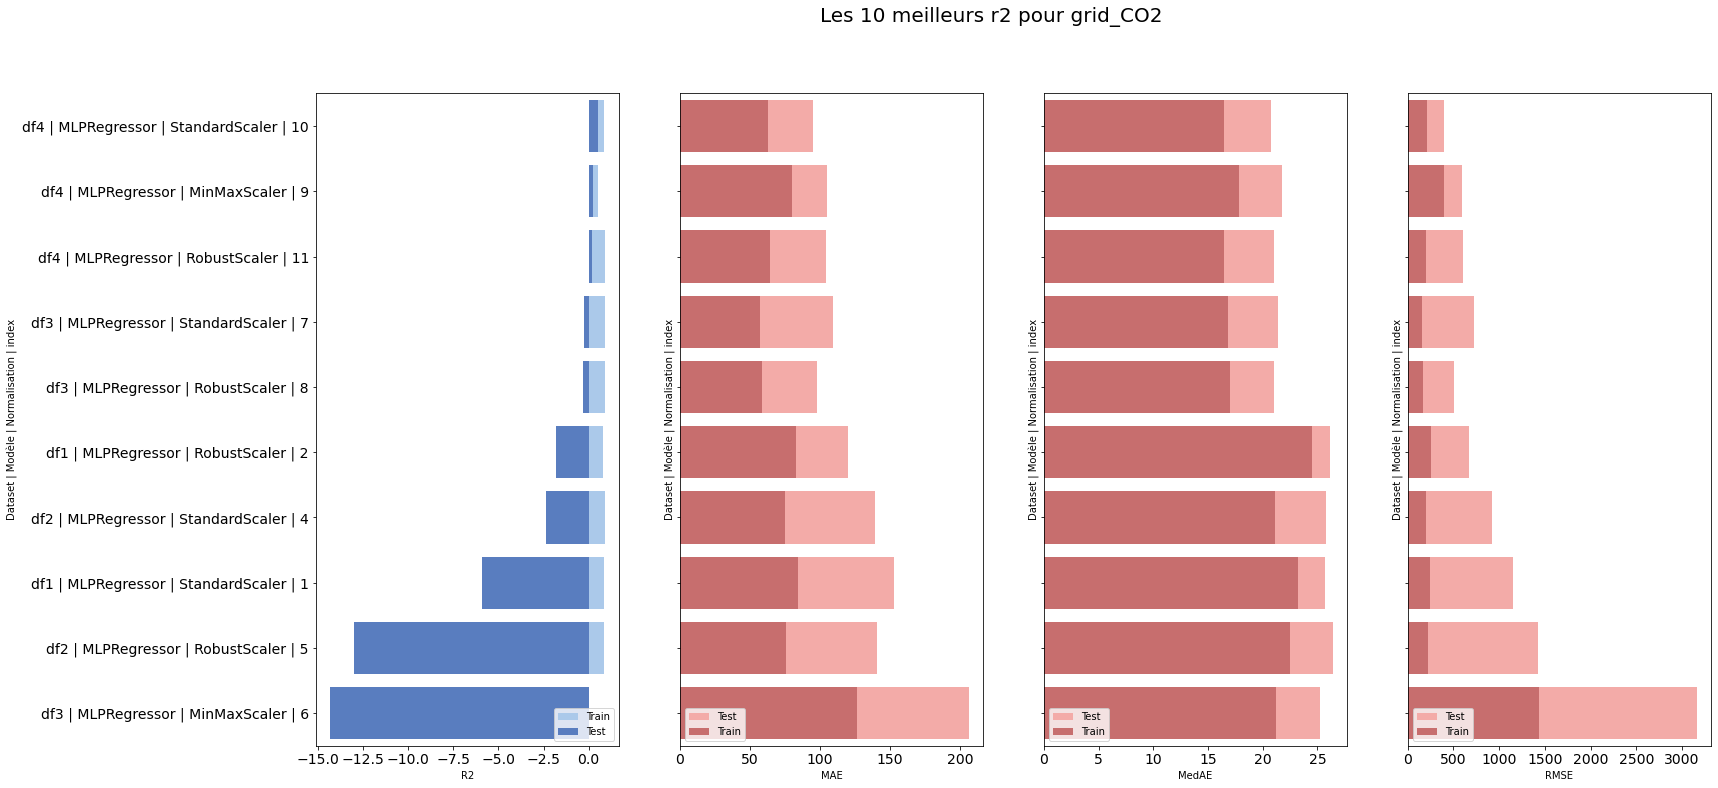

In [95]:
afficher_best(10, df_results_12, 'grid_CO2')

In [96]:
df_results_12[results_main_columns]

,Dataset,Modèle,Normalisation,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_median_absolute_error,mean_test_neg_mean_squared_error,Target,mean_fit_time,mean_score_time,params
0,df1,MLPRegressor,MinMaxScaler,-48.271250,-296.534903,-26.189068,-2.938813e+07,grid_CO2,1.293339,0.006981,{}
1,df1,MLPRegressor,StandardScaler,-5.935122,-152.366231,-25.731845,-1.318111e+06,grid_CO2,1.406638,0.005585,{}
2,df1,MLPRegressor,RobustScaler,-1.810197,-120.242167,-26.181554,-4.454208e+05,grid_CO2,1.345603,0.005984,{}
3,df2,MLPRegressor,MinMaxScaler,-46.157201,-307.727895,-29.314122,-2.713945e+07,grid_CO2,1.551661,0.005784,{}
4,df2,MLPRegressor,StandardScaler,-2.357063,-139.038650,-25.737517,-8.470165e+05,grid_CO2,1.482037,0.005784,{}
5,df2,MLPRegressor,RobustScaler,-13.027829,-140.757035,-26.384441,-2.045138e+06,grid_CO2,1.393474,0.006183,{}
6,df3,MLPRegressor,MinMaxScaler,-14.357645,-205.985059,-25.255535,-9.976844e+06,grid_CO2,1.775254,0.007180,{}
7,df3,MLPRegressor,StandardScaler,-0.235830,-109.257075,-21.382633,-5.275799e+05,grid_CO2,1.617694,0.006578,{}
8,df3,MLPRegressor,RobustScaler,-0.326832,-97.817513,-21.070873,-2.600270e+05,grid_CO2,1.867213,0.007979,{}
9,df4,MLPRegressor,MinMaxScaler,0.216031,-104.703271,-21.755502,-3.530779e+05,grid_CO2,1.510173,0.006772,{}


--> On obtient de mauvais résultats également sur la variable target avec le log transform.

In [97]:
# On ajoute au DataFrame 'df_results_final' les meilleurs r2 pour chaque modèle.

df = df_results_12

df['log_target'] = 'Yes'

for i in ['MLPRegressor']:
    df_results_final = df_results_final.append(df[df['Modèle']==i].sort_values('mean_test_r2', ascending=False).head(1))

In [98]:
# Essayons tout de même d'optimiser les paramètres du réseau de neurones. Commençons par la variable target sans log transform.

# Afin de ne pas avoir une gridSearchCV qui tourne pendant trop longtemps pour l'optimisation des paramètres, je vais
# utiliser une RandomizedSearchCV pour l'optimisation de ce modèle également.


df_results_13 = pd.DataFrame(columns = ['Dataset', 'Modèle', 'Normalisation', 'Target'])


for df in [('df1', df1_columns), ('df2', df2_columns), ('df3', df3_columns), ('df4', df4_columns)]:
    
    Xtrain_df = Xtrain[df[1]]
    
    y_CO2_train = ytrain['GHGEmissions(MetricTonsCO2e)']
    
    numerical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype != "object"]
    categorical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype == "object"]
    
    
    for normalizer in [('MinMaxScaler', MinMaxScaler()), ('StandardScaler', StandardScaler()), ('RobustScaler', RobustScaler())]:
        
        numerical_pipeline = make_pipeline(normalizer[1])
        categorical_pipeline = make_pipeline(OneHotEncoder())
        
        preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                               (categorical_pipeline, categorical_features))
        
        
        for type_model in [('MLPRegressor', MLPRegressor(early_stopping=True))]:
            
            model = make_pipeline(preprocessor, type_model[1])
            
            params = {
                'mlpregressor__alpha' : 10.0 ** -np.arange(1, 7),
                'mlpregressor__solver': ['lbfgs', 'sgd', 'adam'],
                'mlpregressor__max_iter' : [300, 400, 500],
                'mlpregressor__learning_rate' : ['constant', 'invscaling', 'adaptive'],
                'mlpregressor__learning_rate_init' : 10.0 ** -np.arange(1, 7),
                'mlpregressor__batch_size' : [32, 64, 128, 256, 512],
                'mlpregressor__hidden_layer_sizes' : [(20,), (40,40), (100,), (100, 100, 100)]
            }
                                
                
            grid_CO2 = RandomizedSearchCV(model, param_distributions=params, cv=5, return_train_score=True,
                                      scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error'),
                                      refit = 'r2', n_jobs = -1, n_iter=25)
             
            grid_CO2.fit(Xtrain_df, y_CO2_train)
    
            df_grid_CO2_results = pd.DataFrame(grid_CO2.cv_results_)
            df_grid_CO2_results['Dataset'] = df[0]
            df_grid_CO2_results['Modèle'] = type_model[0]
            df_grid_CO2_results['Normalisation'] = normalizer[0]
            df_grid_CO2_results['Target'] = 'grid_CO2'
            
            df_results_13 = df_results_13.append(df_grid_CO2_results, ignore_index=True)

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [ 4.74027296e-01  6.77404763e-02  1.37541478e-02  3.60160831e-01
 -7.18506993e-01 -4.36151831e-03 -8.13202172e-02 -6.73013023e-01
  2.09821994e-01             nan -1.94132488e-01 -1.54621101e-01
 -3.88111542e-02  4.17150597e-01 -4.98031192e-01 -5.04611448e-01
 -9.25773500e-02  5.22087708e-01  1.45305691e-01  4.18151875e-01
  1.62394748e-01  3.62929687e-01 -1.06001365e-01  3.47758840e-01
 -5.28762266e+06]
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [ 6.15787411e-01  4.92809444e-02  9.37498438e-01  9.39024269e-01
  9.28835746e-01 -4.40314646e-03 -6.49516524e-02  9.28002895e-01
  9.02022266e-01             nan  9.28823058e-01  9.32363785e-01
 -9.44242377e-03  4.31506855e-01  9.36703430e-01  9.48211938e-01
 -6.45810114e-02  6.79853793

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.10597018  0.07454343         nan  0.34430678 -0.09581101 -0.057483
  0.27371193         nan  0.18185182  0.2137442  -0.08403138 -0.81971086
 -0.04910205 -0.97908729         nan         nan  0.32212856  0.13016298
  0.27214623  0.49066331  0.26988344         nan -0.106454    0.17999662
  0.06831001]
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [-0.082965    0.49442244         nan  0.97820956 -0.07418628 -0.04577057
  0.38522579         nan  0.1951407   0.20948063  0.9697354   0.9778776
  0.9726884   0.95854621         nan         nan  0.31939655  0.9667957
  0.28886167  0.96278896  0.33266857         nan -0.08333498  0.94289688
  0.27859155]
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\model_selection\_sea

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.10589457  0.47430741 -0.1052447   0.18674294  0.0390103   0.35199319
         nan -0.10605517 -0.1062117  -0.01093775 -0.60104391 -0.64948544
  0.00272243  0.37175804 -0.1059904   0.33056752 -0.48812087  0.4949799
  0.26792764  0.09722718  0.35467069 -0.07242436 -0.60553705  0.31217518
  0.04057558]
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [-0.08280918  0.99628931 -0.0823779   0.28520782  0.99302234  0.38637687
         nan -0.0828053  -0.08311072  0.97580068  0.99401059  0.97673817
  0.0066399  

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [-0.10636068  0.23473928  0.26416014 -0.1045377   0.40886034 -0.10592795
 -0.08807044  0.23591876         nan -0.1062468   0.33324648  0.26875634
         nan  0.32364467  0.49216607  0.32582209         nan -0.106505
  0.38836466  0.15752724  0.43398175  0.22575836         nan -0.10499788
         nan]
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [-0.08336731  0.35236717  0.99809742 -0.08197676  0.44948546 -0.08314966
  0.99337383  0.6310543          nan -0.08318698  0.47625859  0.42430681
         nan  0.31996447  0.99420619  0.83144515         nan -0.08346376
  0.99578093  0.97708252  0.48597462  0.99783297         nan -0.08201758
         nan]
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\model_selection\_s

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [ 3.30639792e-01  7.14823980e-01 -1.05549984e-01 -9.57868686e-02
  6.18970701e-01 -1.06105649e-01  1.87907927e-01  7.13425373e-01
  3.74254646e-01  1.67438135e-01  4.70930537e-01 -1.05842885e-01
  4.05860653e-01  5.87294380e-01  4.16083200e-01 -1.05507936e-01
  5.13805656e-01  5.37060297e-01  3.77513273e-01 -1.20766241e+32
  4.09070050e-01  5.81606311e-01             nan  2.01268452e-02
  4.93707922e-01]
  warnings.warn(
C:\Users\bmeur\anaco

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [ 0.5940628  -0.06397846  0.3772438   0.17808604 -0.10481149         nan
  0.46584062         nan         nan  0.44163241         nan  0.39227869
  0.05580702  0.43323232         nan  0.47256678         nan -0.10623543
  0.13498815  0.58988266  0.49535575         nan  0.24839178  0.36744388
         nan]
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [ 0.67020912 -0.03951547  0.99350135  0.99038957 -0.08191377         nan
  0.98267864         nan         nan  0.99031817         nan  0.99199063
  0.09637067  0.98895804         nan  0.9823163          nan -0.0831527
  0.15036418  0.98399271  0.99531201         nan  0.27157711  0.57672873
         nan]
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\model_selection\_

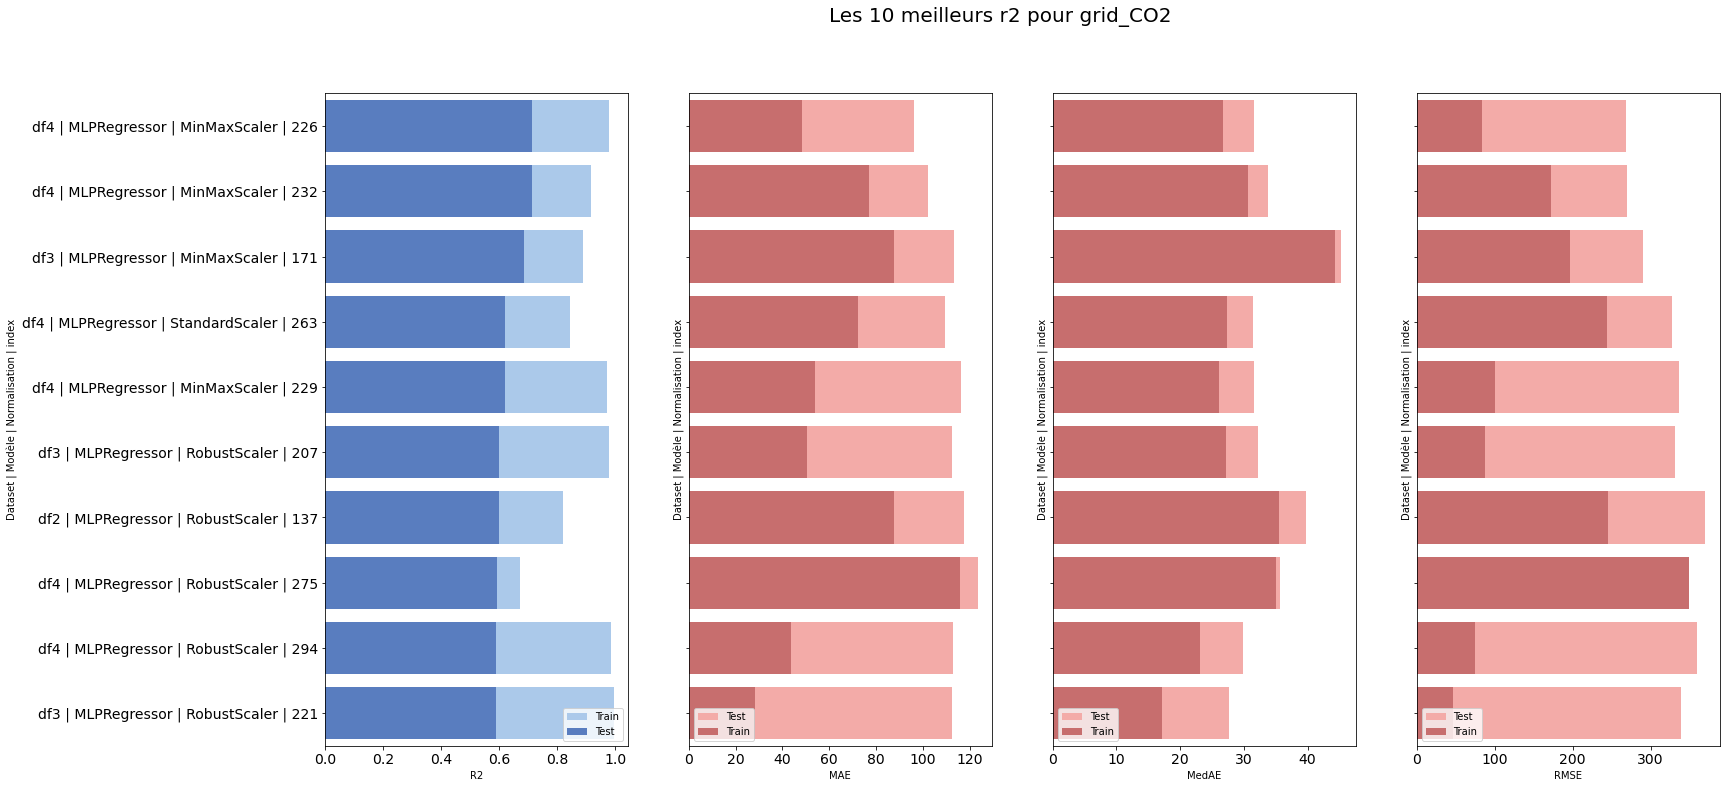

In [99]:
afficher_best(10, df_results_13, 'grid_CO2')

In [100]:
top_results = df_results_13[df_results_13.Target=='grid_CO2'].sort_values('mean_test_r2', ascending=False).head(10)

top_results[results_main_columns]

,Dataset,Modèle,Normalisation,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_median_absolute_error,mean_test_neg_mean_squared_error,Target,mean_fit_time,mean_score_time,params
226,df4,MLPRegressor,MinMaxScaler,0.714824,-96.063365,-31.635306,-71712.079254,grid_CO2,3.426035,0.019547,"{'mlpregressor__solver': 'lbfgs', 'mlpregresso..."
232,df4,MLPRegressor,MinMaxScaler,0.713425,-102.270894,-33.701117,-72889.325772,grid_CO2,0.508236,0.015158,"{'mlpregressor__solver': 'sgd', 'mlpregressor_..."
171,df3,MLPRegressor,MinMaxScaler,0.685475,-113.471100,-45.303028,-84034.354552,grid_CO2,0.667016,0.012765,"{'mlpregressor__solver': 'sgd', 'mlpregressor_..."
263,df4,MLPRegressor,StandardScaler,0.621102,-109.462121,-31.490565,-107318.516566,grid_CO2,1.721985,0.018750,"{'mlpregressor__solver': 'adam', 'mlpregressor..."
229,df4,MLPRegressor,MinMaxScaler,0.618971,-116.328947,-31.591163,-113131.274753,grid_CO2,0.824792,0.015760,"{'mlpregressor__solver': 'lbfgs', 'mlpregresso..."
207,df3,MLPRegressor,RobustScaler,0.600984,-112.433121,-32.209199,-109378.254474,grid_CO2,0.875060,0.014159,"{'mlpregressor__solver': 'lbfgs', 'mlpregresso..."
137,df2,MLPRegressor,RobustScaler,0.597938,-117.729245,-39.811824,-136982.158414,grid_CO2,1.152518,0.014762,"{'mlpregressor__solver': 'adam', 'mlpregressor..."
275,df4,MLPRegressor,RobustScaler,0.594063,-123.407534,-35.612881,-122316.724467,grid_CO2,1.617077,0.012566,"{'mlpregressor__solver': 'sgd', 'mlpregressor_..."
294,df4,MLPRegressor,RobustScaler,0.589883,-112.815858,-29.835997,-129101.659505,grid_CO2,1.192211,0.017952,"{'mlpregressor__solver': 'lbfgs', 'mlpregresso..."
221,df3,MLPRegressor,RobustScaler,0.587542,-112.631480,-27.660024,-114629.136242,grid_CO2,19.684135,0.012168,"{'mlpregressor__solver': 'lbfgs', 'mlpregresso..."


In [101]:
top_results['params'].values

array([{'mlpregressor__solver': 'lbfgs', 'mlpregressor__max_iter': 500, 'mlpregressor__learning_rate_init': 0.001, 'mlpregressor__learning_rate': 'invscaling', 'mlpregressor__hidden_layer_sizes': (40, 40), 'mlpregressor__batch_size': 256, 'mlpregressor__alpha': 0.0001},
       {'mlpregressor__solver': 'sgd', 'mlpregressor__max_iter': 400, 'mlpregressor__learning_rate_init': 0.001, 'mlpregressor__learning_rate': 'adaptive', 'mlpregressor__hidden_layer_sizes': (20,), 'mlpregressor__batch_size': 512, 'mlpregressor__alpha': 0.0001},
       {'mlpregressor__solver': 'sgd', 'mlpregressor__max_iter': 300, 'mlpregressor__learning_rate_init': 0.0001, 'mlpregressor__learning_rate': 'constant', 'mlpregressor__hidden_layer_sizes': (100,), 'mlpregressor__batch_size': 64, 'mlpregressor__alpha': 1e-05},
       {'mlpregressor__solver': 'adam', 'mlpregressor__max_iter': 500, 'mlpregressor__learning_rate_init': 0.01, 'mlpregressor__learning_rate': 'constant', 'mlpregressor__hidden_layer_sizes': (100, 100

--> On obtient le meilleur r2 avec le dataset 4 et les paramètres suivants :  
{'mlpregressor__solver': 'lbfgs', 'mlpregressor__max_iter': 500, 'mlpregressor__learning_rate_init': 0.001, 'mlpregressor__learning_rate': 'invscaling', 'mlpregressor__hidden_layer_sizes': (40, 40), 'mlpregressor__batch_size': 256, 'mlpregressor__alpha': 0.0001},  

Il y a une maélioration du r2 et de la RMSE, cependant il y a une dégradation de la MAE et MedAE :
- r2 = 71% vs 65%
- MAE = 96 vs 88 (pas d'amélioration pour MAE)
- MedAE = 32 vs 22 (pas d'amélioration pour MedAE)
- RMSE = 268 vs 287

In [102]:
# On ajoute au DataFrame 'df_results_final' les meilleurs r2 pour chaque modèle.

df = df_results_13

df['log_target'] = 'No'

for i in ['MLPRegressor']:
    df_results_final = df_results_final.append(df[df['Modèle']==i].sort_values('mean_test_r2', ascending=False).head(1))

In [103]:
# Essayons maintenant d'optimiser les paramètres du réseau de neurones pour la variable target avec log transform.

# Afin de ne pas avoir une gridSearchCV qui tourne pendant trop longtemps pour l'optimisation des paramètres, je vais
# utiliser une RandomizedSearchCV pour l'optimisation de ce modèle également.


df_results_14 = pd.DataFrame(columns = ['Dataset', 'Modèle', 'Normalisation', 'Target'])


for df in [('df1', df1_columns), ('df2', df2_columns), ('df3', df3_columns), ('df4', df4_columns)]:
    
    Xtrain_df = Xtrain[df[1]]
    
    y_CO2_train = ytrain['GHGEmissions(MetricTonsCO2e)']
    
    numerical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype != "object"]
    categorical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype == "object"]
    
    
    for normalizer in [('MinMaxScaler', MinMaxScaler()), ('StandardScaler', StandardScaler()), ('RobustScaler', RobustScaler())]:
        
        numerical_pipeline = make_pipeline(normalizer[1])
        categorical_pipeline = make_pipeline(OneHotEncoder())
        
        preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                               (categorical_pipeline, categorical_features))
        
        
        for type_model in [('MLPRegressor', MLPRegressor(early_stopping=True))]:
            
            model = make_pipeline(preprocessor, TransformedTargetRegressor(regressor=type_model[1], func=np.log,
                                                                           inverse_func=np.exp))
            
            params = {
                'transformedtargetregressor__regressor__alpha' : 10.0 ** -np.arange(1, 7),
                'transformedtargetregressor__regressor__solver': ['lbfgs', 'sgd', 'adam'],
                'transformedtargetregressor__regressor__max_iter' : [300, 400, 500],
                'transformedtargetregressor__regressor__learning_rate' : ['constant', 'invscaling', 'adaptive'],
                'transformedtargetregressor__regressor__learning_rate_init' : 10.0 ** -np.arange(1, 7),
                'transformedtargetregressor__regressor__batch_size' : [32, 64, 128, 256, 512],
                'transformedtargetregressor__regressor__hidden_layer_sizes' : [(20,), (40,40), (100,), (100, 100, 100)]
            }
                                
                
            grid_CO2 = RandomizedSearchCV(model, param_distributions=params, cv=5, return_train_score=True,
                                      scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error'),
                                      refit = 'r2', n_jobs = -1, n_iter=10)
             
            grid_CO2.fit(Xtrain_df, y_CO2_train)
    
            df_grid_CO2_results = pd.DataFrame(grid_CO2.cv_results_)
            df_grid_CO2_results['Dataset'] = df[0]
            df_grid_CO2_results['Modèle'] = type_model[0]
            df_grid_CO2_results['Normalisation'] = normalizer[0]
            df_grid_CO2_results['Target'] = 'grid_CO2'
            
            df_results_14 = df_results_14.append(df_grid_CO2_results, ignore_index=True)

C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [            nan -7.97042758e+06 -6.50878161e+00 -1.11284484e+01
 -1.00472220e-01 -1.45305033e+02 -3.77506335e+05 -1.38024199e+10
 -7.92437775e+05 -6.70740517e+02]
  warnings.warn(
C:\Users\bmeur\anaconda3\lib\sit

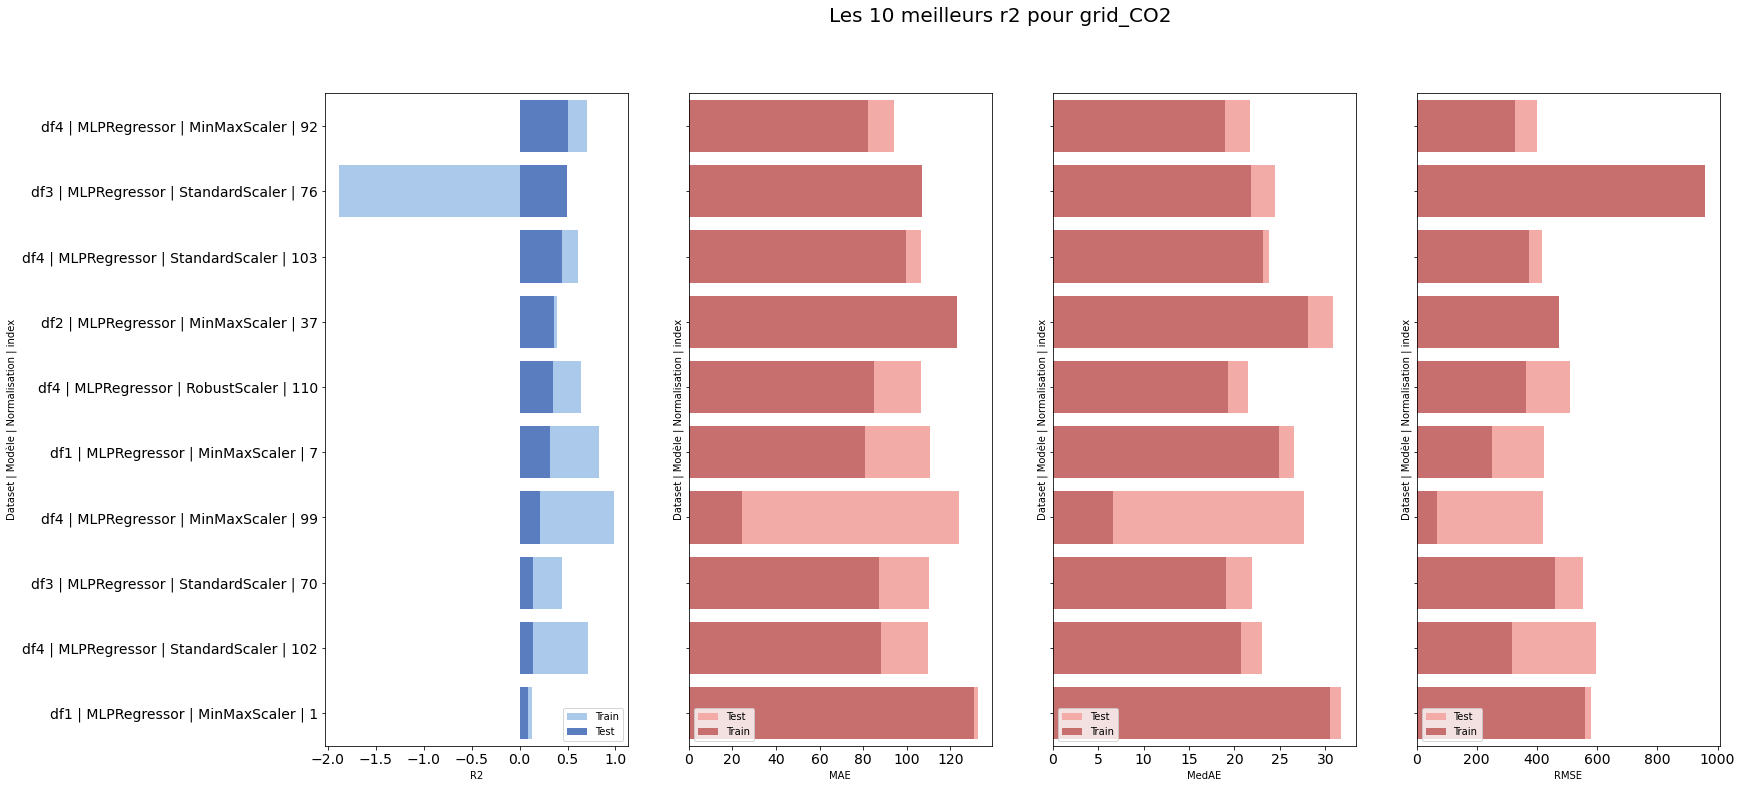

In [104]:
afficher_best(10, df_results_14, 'grid_CO2')

In [105]:
top_results = df_results_14[df_results_14.Target=='grid_CO2'].sort_values('mean_test_r2', ascending=False).head(10)

top_results[results_main_columns]

,Dataset,Modèle,Normalisation,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_median_absolute_error,mean_test_neg_mean_squared_error,Target,mean_fit_time,mean_score_time,params
92,df4,MLPRegressor,MinMaxScaler,0.505817,-94.039298,-21.686455,-161291.412020,grid_CO2,11.737400,0.020944,{'transformedtargetregressor__regressor__solve...
76,df3,MLPRegressor,StandardScaler,0.491416,-106.318618,-24.487388,-140575.655359,grid_CO2,7.963295,0.011968,{'transformedtargetregressor__regressor__solve...
103,df4,MLPRegressor,StandardScaler,0.443354,-106.396603,-23.773712,-172888.863548,grid_CO2,5.327660,0.021644,{'transformedtargetregressor__regressor__solve...
37,df2,MLPRegressor,MinMaxScaler,0.363941,-120.648149,-30.847094,-166143.405801,grid_CO2,6.060983,0.013764,{'transformedtargetregressor__regressor__solve...
110,df4,MLPRegressor,RobustScaler,0.351640,-106.562725,-21.524213,-258182.636181,grid_CO2,10.550779,0.017554,{'transformedtargetregressor__regressor__solve...
7,df1,MLPRegressor,MinMaxScaler,0.315289,-110.691121,-26.591737,-179435.109015,grid_CO2,2.082827,0.010773,{'transformedtargetregressor__regressor__solve...
99,df4,MLPRegressor,MinMaxScaler,0.213025,-123.751634,-27.648129,-177206.791121,grid_CO2,16.820513,0.010173,{'transformedtargetregressor__regressor__solve...
70,df3,MLPRegressor,StandardScaler,0.135950,-110.245280,-21.950287,-304295.541795,grid_CO2,11.358413,0.012566,{'transformedtargetregressor__regressor__solve...
102,df4,MLPRegressor,StandardScaler,0.135192,-109.694181,-23.040752,-356958.734022,grid_CO2,5.459702,0.013165,{'transformedtargetregressor__regressor__solve...
1,df1,MLPRegressor,MinMaxScaler,0.093169,-132.440607,-31.771888,-335622.715435,grid_CO2,3.340365,0.011968,{'transformedtargetregressor__regressor__solve...


--> On ne constate pas d'amélioration significative.

In [106]:
# On ajoute au DataFrame 'df_results_final' les meilleurs r2 pour chaque modèle.

df = df_results_14

df['log_target'] = 'Yes'

for i in ['MLPRegressor']:
    df_results_final = df_results_final.append(df[df['Modèle']==i].sort_values('mean_test_r2', ascending=False).head(1))

## <a name="C7">Choix du modèle

In [107]:
# Maintenant que l'on a testé tous les modèles et essayer d'optimiser les paramètres de chacun, on garde dans le DataFrame
# 'df_results_final' les meilleurs r2 pour chaque modèle et pour chaque variable target (avec le log transform et 
# sans le log transform).

df_results_final_log_no = df_results_final[df_results_final['log_target']=='No']
df_results_final_log_yes = df_results_final[df_results_final['log_target']=='Yes']

df_results_final = pd.DataFrame()

for i in ['LinearReg', 'Lasso', 'Ridge', 'Elastic', 'SVR', 'KernelRidge', 'RandomForest', 'xgboost', 'MLPRegressor']:
    df_1 = df_results_final_log_no[df_results_final_log_no['Modèle']==i].sort_values('mean_test_r2', ascending=False).head(1)
    df_2 = df_results_final_log_yes[df_results_final_log_yes['Modèle']==i].sort_values('mean_test_r2', ascending=False).head(1)
    
    df_results_final = df_results_final.append(df_1)
    df_results_final = df_results_final.append(df_2)

In [108]:
results_main_columns.append('log_target')

df_results_final[results_main_columns].sort_values('mean_test_r2', ascending=False)

,Dataset,Modèle,Normalisation,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_median_absolute_error,mean_test_neg_mean_squared_error,Target,mean_fit_time,mean_score_time,params,log_target
226,df4,MLPRegressor,MinMaxScaler,0.714824,-96.063365,-31.635306,-7.171208e+04,grid_CO2,3.426035,0.019547,"{'mlpregressor__solver': 'lbfgs', 'mlpregresso...",No
20,df4,RandomForest,StandardScaler,0.663044,-106.189214,-28.624110,-1.200227e+05,grid_CO2,1.359561,0.018151,{},No
850,df3,xgboost,RobustScaler,0.645245,-88.435901,-21.683550,-8.247760e+04,grid_CO2,0.102923,0.014761,{'transformedtargetregressor__regressor__n_est...,Yes
1593,df4,SVR,RobustScaler,0.626807,-90.496131,-21.280065,-9.395519e+04,grid_CO2,0.134639,0.021941,{'transformedtargetregressor__regressor__C': 1...,Yes
813,df3,Elastic,MinMaxScaler,0.612861,-141.842618,-61.299598,-1.349994e+05,grid_CO2,0.116090,0.007978,"{'elasticnet__alpha': 0.002154434690031887, 'e...",No
26,df3,Ridge,MinMaxScaler,0.612484,-141.544321,-60.833808,-1.350545e+05,grid_CO2,0.024131,0.008777,{},No
943,df3,KernelRidge,MinMaxScaler,0.612288,-142.605625,-62.662550,-1.354118e+05,grid_CO2,0.201466,0.033509,{'kernelridge__alpha': 0.5994842503189421},No
25,df3,Lasso,MinMaxScaler,0.612160,-136.962700,-53.786771,-1.374193e+05,grid_CO2,0.021130,0.009375,{},No
20,df4,RandomForest,StandardScaler,0.602506,-93.902253,-23.587638,-1.199755e+05,grid_CO2,1.317671,0.018751,{},Yes
24,df3,LinearReg,MinMaxScaler,0.602085,-146.279572,-62.883201,-1.399590e+05,grid_CO2,0.030517,0.008776,{},No


--> Le meilleur r2 est pour le modèle MLPRegressor sur le dataset 4 avec un MinMaxScaler et pour la variable target sans le log transform, mais cependant on remarque qu'en troisième, le modèle XGBoost sur le dataset 3 avec un RobustScaler et pour la variable target avec le log transform a un r2 un peu inférieur (65% vs 71%) mais avec une MAE et surtout une MedAE amélioré (22 vs 32) donc on choisit ce modèle ci pour la prédiction des émissions de CO2.

In [109]:
df_results_final.loc[850,:]['params']

{'transformedtargetregressor__regressor__n_estimators': 15,
 'transformedtargetregressor__regressor__min_child_weight': 1.0,
 'transformedtargetregressor__regressor__max_depth': 6,
 'transformedtargetregressor__regressor__learning_rate': 0.5,
 'transformedtargetregressor__regressor__gamma': 0.25}

--> Les paramètres du modèle XGBoost retenu sont donc les suivants :
- n_estimators=15
- min_child_weight = 1
- max_depth = 6
- learning_rate = 0.5
- gamma = 0.25

## <a name="C8">Analyse de la prédiction sur le jeu de test avec le modèle retenu

In [110]:
# Réentraînons tout d'abord le modèle retenu avec les paramètres sélectionnés.

Xtrain_df = Xtrain[df3_columns]
Xtest_df = Xtest[df3_columns]

y_CO2_train = ytrain['GHGEmissions(MetricTonsCO2e)']
y_CO2_test = ytest['GHGEmissions(MetricTonsCO2e)']

numerical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype != "object"]
categorical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype == "object"]


numerical_pipeline = make_pipeline(RobustScaler())
categorical_pipeline = make_pipeline(OneHotEncoder())

preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                   (categorical_pipeline, categorical_features))



model = make_pipeline(preprocessor, TransformedTargetRegressor(regressor=xgboost.XGBRegressor(n_estimators=15, min_child_weight=1,
                                                                                             max_depth=6, learning_rate=0.5,
                                                                                             gamma=0.25),
                                                               func=np.log, inverse_func=np.exp))

params = {}

grid_CO2 = GridSearchCV(model, param_grid=params, cv=5, return_train_score=True,
                          scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error'),
                          refit = 'r2', n_jobs = -1)

grid_CO2.fit(Xtrain_df, y_CO2_train)

df_grid_CO2_results = pd.DataFrame(grid_CO2.cv_results_)

In [111]:
df_grid_CO2_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_train_r2,split1_train_r2,split2_train_r2,split3_train_r2,split4_train_r2,mean_train_r2,std_train_r2,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_train_neg_mean_absolute_error,split1_train_neg_mean_absolute_error,split2_train_neg_mean_absolute_error,split3_train_neg_mean_absolute_error,split4_train_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,std_train_neg_mean_absolute_error,split0_test_neg_mean_squared_error,split1_test_neg_mean_squared_error,split2_test_neg_mean_squared_error,split3_test_neg_mean_squared_error,split4_test_neg_mean_squared_error,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error,split0_train_neg_mean_squared_error,split1_train_neg_mean_squared_error,split2_train_neg_mean_squared_error,split3_train_neg_mean_squared_error,split4_train_neg_mean_squared_error,mean_train_neg_mean_squared_error,std_train_neg_mean_squared_error,split0_test_neg_median_absolute_error,split1_test_neg_median_absolute_error,split2_test_neg_median_absolute_error,split3_test_neg_median_absolute_error,split4_test_neg_median_absolute_error,mean_test_neg_median_absolute_error,std_test_neg_median_absolute_error,rank_test_neg_median_absolute_error,split0_train_neg_median_absolute_error,split1_train_neg_median_absolute_error,split2_train_neg_median_absolute_error,split3_train_neg_median_absolute_error,split4_train_neg_median_absolute_error,mean_train_neg_median_absolute_error,std_train_neg_median_absolute_error
0,0.133043,0.003315,0.016157,0.001466,{},0.945207,0.883486,0.375477,0.624405,0.397649,0.645245,0.23717,1,0.916566,0.898316,0.947276,0.930988,0.941421,0.926914,0.017701,-79.073459,-80.701387,-102.93121,-85.085281,-94.38817,-88.435901,8.991642,1,-48.28677,-51.738573,-48.286415,-51.063678,-49.124787,-49.700045,1.438173,-36728.555675,-64200.091188,-150882.968267,-79335.390274,-81240.982648,-82477.59761,37729.933732,1,-23769.523567,-32035.433084,-20688.720957,-27604.968788,-24539.209306,-25727.57114,3845.774553,-23.249798,-19.925923,-20.150619,-22.160539,-22.930869,-21.68355,1.391085,1,-12.257739,-12.590134,-13.212296,-13.236975,-11.950133,-12.649455,0.511465


In [113]:
# Analysons maintenant le résultat des métriques sur le jeu de test.

y_CO2_pred = grid_CO2.predict(Xtest_df)

print('R2 :', "{:1.2f}".format(grid_CO2.score(Xtest_df, y_CO2_test)))
print('MAE :', "{:2.0f}".format(mean_absolute_error(y_CO2_test, y_CO2_pred)))
print('median abs error :', "{:2.0f}".format(median_absolute_error(y_CO2_test, y_CO2_pred)))
print('RMSE :', "{:2.0f}".format(np.sqrt(mean_squared_error(y_CO2_test, y_CO2_pred))))

R2 : 0.68
MAE : 91
median abs error : 24
RMSE : 296


--> On peut voir que la performance reste équivalente sur le jeu de test avec une amélioration du r2 mais une légère dégradation des autres métriques :
- r2 = 68% vs 65%
- MAE = 91 vs 88
- MedAE = 24 vs 22
- RMSE = 296 vs 287

In [114]:
# Analysons maintenant les écarts pour chaque donnée du test set.

df_results_test = pd.DataFrame({"y_réel": y_CO2_test, "y_pred" : y_CO2_pred})

In [115]:
df_results_test["Erreur"] = abs(df_results_test["y_réel"]-df_results_test["y_pred"])/df_results_test["y_réel"]*100

def color_to_use(num):
    if num> 80:
        return "#cc2900"
    elif num >50:
        return "#dfa61f"
    elif num>30:
        return "#dddf1f"
    elif num>10:
        return "#7cce2e"
    else:
        return "#13a90d"
    
df_results_test["color to use"]=df_results_test["Erreur"].apply(color_to_use)

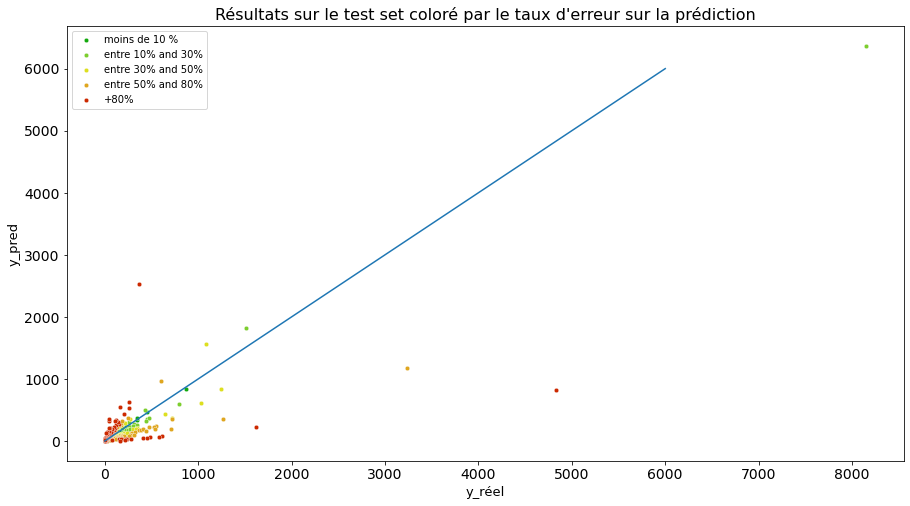

In [118]:
df_results_test=df_results_test.sort_values(by = "Erreur")

dict_lab={"#cc2900":'+80%', '#dfa61f':"entre 50% and 80%"
          ,'#dddf1f':"entre 30% and 50%"
          ,'#7cce2e':"entre 10% and 30%"
          ,'#13a90d':"moins de 10 %"}

plt.figure(figsize = (15,8))
plt.title("Résultats sur le test set coloré par le taux d'erreur sur la prédiction",size=16)
for c in df_results_test["color to use"].unique():
    d=df_results_test.loc[df_results_test["color to use"]==c]
    sns.scatterplot(data=d,x="y_réel",y="y_pred",color=c,label=dict_lab[c], s=20)

plt.xlabel('y_réel',size=13)
plt.ylabel('y_pred',size=13)
plt.plot([0, 6e3] ,[0, 6e3])
plt.show()

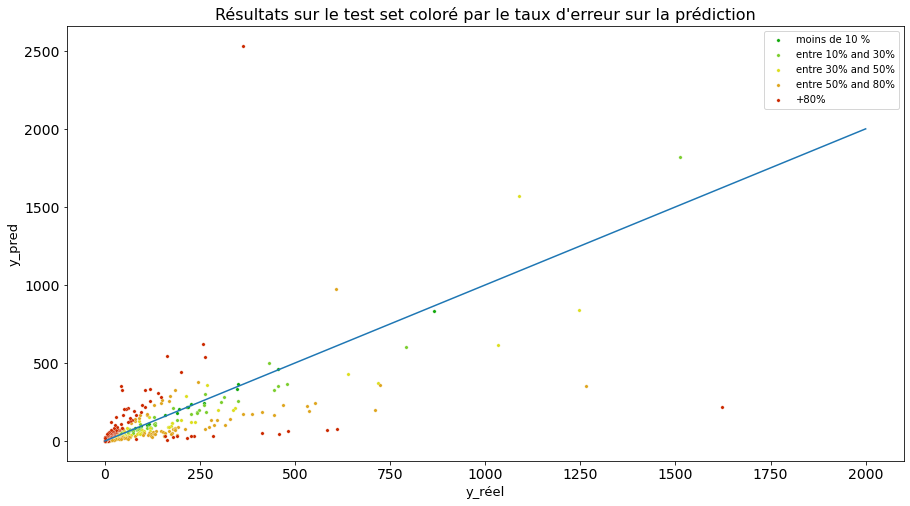

In [119]:
# Zoomons en enlevant les valeurs supérieur à 2e3 de y_réel.

df_zoom = df_results_test[df_results_test['y_réel']<2e3]

df_zoom=df_zoom.sort_values(by = "Erreur")

dict_lab={"#cc2900":'+80%', '#dfa61f':"entre 50% and 80%"
          ,'#dddf1f':"entre 30% and 50%"
          ,'#7cce2e':"entre 10% and 30%"
          ,'#13a90d':"moins de 10 %"}

plt.figure(figsize = (15,8))
plt.title("Résultats sur le test set coloré par le taux d'erreur sur la prédiction",size=16)
for c in df_zoom["color to use"].unique():
    d=df_zoom.loc[df_zoom["color to use"]==c]
    sns.scatterplot(data=d,x="y_réel",y="y_pred",color=c,label=dict_lab[c], s=12)

plt.xlabel('y_réel',size=13)
plt.ylabel('y_pred',size=13)
plt.plot([0, 2e3] ,[0, 2e3])
plt.show()

In [123]:
# Il semble y avoir un plus grand taux d'erreur pour les petites valeurs de y_réel, vérifions cela.

def regroup(num):
    if num<50:
        return "< 50"
    elif num<150:
        return "50-150"
    elif num<250:
        return "150-250"
    else:
        return "+250"
    
df_results_test["regroup"]=df_results_test["y_réel"].apply(regroup)

In [124]:
def taux_derreur_cat(num):
    if num=="#cc2900":
        return '+80%'
    elif num=='#dfa61f':
        return 'entre 50% and 80%'
    elif num=='#dddf1f':
        return 'entre 30% and 50%'
    elif num=='#7cce2e':
        return 'entre 10% and 30%'
    elif num=='#13a90d':
        return 'moins de 10 %'
    
df_results_test["taux_derreur_cat"]=df_results_test["color to use"].apply(taux_derreur_cat)

In [125]:
df_results_test = df_results_test.sort_values('Erreur')

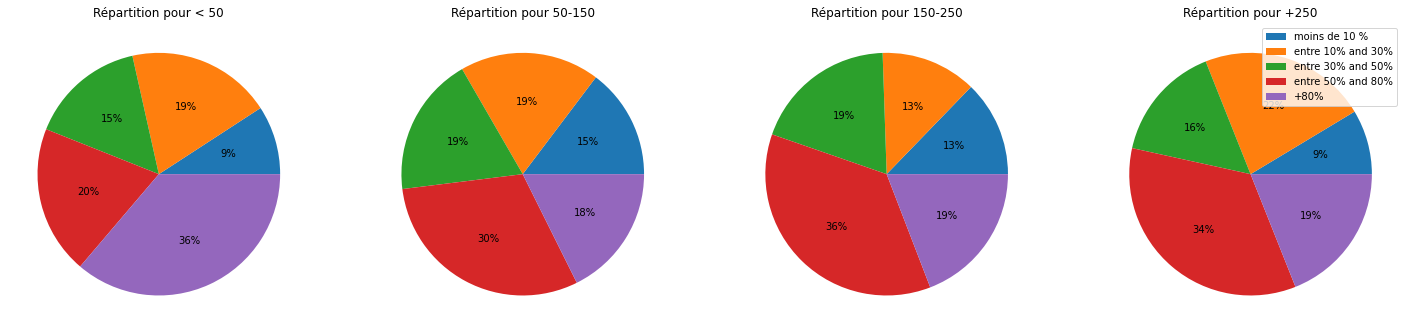

In [127]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=False, sharey=False, figsize=(25,8))

j=0
for group in ['< 50', '50-150', '150-250', '+250']:
    axes[j].pie(df_results_test[df_results_test['regroup']==group]['taux_derreur_cat'].value_counts(sort=False), 
              autopct='%.0f%%')
    axes[j].set_title('Répartition pour ' + group )
    j=j+1
    
plt.legend(df_results_test['taux_derreur_cat'].unique())
plt.show()

--> On retrouve bien un taux d'erreur plus fort pour les petites valeurs de y_réel.

## <a name="C9">Analyse de l'impact des différentes variables sur la prédiction

In [129]:
import shap

In [130]:
# On va dans un premier temps encoder et normaliser Xtrain_df pour pourvoir ensuite utiliser shap.KernelExplainer.

# On encode les variables catégorielles avec un OneHotEncoder()
df_cat_train = Xtrain_df[categorical_features]
df_cat_test = Xtest_df[categorical_features]

ohe = OneHotEncoder()
enc = ohe.fit(df_cat_train)

col_names = enc.get_feature_names(df_cat_train.columns)

df_cat_ohe = pd.DataFrame(enc.transform(df_cat_train).toarray(), index=df_cat_train.index, columns=col_names)

# On met à l'échelle les variables numériques avec un RobustScaler()
df_num_train = Xtrain_df[numerical_features]
df_num_test = Xtest_df[numerical_features]

mms = RobustScaler()
mms_enc = mms.fit(df_num_train)

df_num_mms = pd.DataFrame(mms_enc.transform(df_num_train), index=df_num_train.index, columns=df_num_train.columns)

# On inclut toutes les transformations dans un même dataFrame.
df_enc_train = pd.concat([df_cat_ohe, df_num_mms], axis = 1)

df_enc_train

,PrimaryPropertyType_Distribution Center,PrimaryPropertyType_Hospital,PrimaryPropertyType_Hotel,PrimaryPropertyType_K-12 School,PrimaryPropertyType_Laboratory,PrimaryPropertyType_Large Office,PrimaryPropertyType_Medical Office,PrimaryPropertyType_Mixed Use Property,PrimaryPropertyType_Other,PrimaryPropertyType_Refrigerated Warehouse,PrimaryPropertyType_Residence Hall,PrimaryPropertyType_Restaurant,PrimaryPropertyType_Retail Store,PrimaryPropertyType_Self-Storage Facility,PrimaryPropertyType_Senior Care Community,PrimaryPropertyType_Small- and Mid-Sized Office,PrimaryPropertyType_Supermarket / Grocery Store,PrimaryPropertyType_University,PrimaryPropertyType_Warehouse,PrimaryPropertyType_Worship Facility,Neighborhood_BALLARD,Neighborhood_CENTRAL,Neighborhood_DELRIDGE,Neighborhood_DOWNTOWN,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_SOUTHEAST,Neighborhood_SOUTHWEST,SteamUse_0.0,SteamUse_1.0,NaturalGasUse_0.0,NaturalGasUse_1.0,OtherFuelUse_0.0,OtherFuelUse_1.0,NumberofBuildings,NumberofFloors,YearBuilt,ProportionGFAParking,PropertyGFATotal
372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,-0.633333,0.262750,0.368322
1071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.666667,-0.100000,0.358333,0.028678
1339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,-0.916667,0.000000,-0.313922
255,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.666667,-0.116667,0.000000,1.168125
1200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.333333,0.016667,0.000000,-0.215401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.233333,0.000000,-0.142869
1231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,-1.0,0.000000,0.166667,0.000000,-0.278947
1491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.000000,0.550000,0.275766,0.064638
318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.000000,0.533333,0.000000,6.493962


In [133]:
# On recrée le modèle avec le log transform pour la variable target.

xgboost_co2 = TransformedTargetRegressor(regressor=xgboost.XGBRegressor(n_estimators=15, min_child_weight=1,
                                                                      max_depth=6, learning_rate=0.5, gamma=0.25),
                                        func=np.log, inverse_func=np.exp)

xgboost_co2.fit(df_enc_train, y_CO2_train)

TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=XGBRegressor(base_score=None, booster=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  enable_categorical=False,
                                                  gamma=0.25, gpu_id=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=0.5,
                                                  max_delta_step=None,
                                                  max_depth=6,
                                                  min_child_weight=1,
                                                

In [135]:
# On encode et normalise le jeu de test.

df_cat_ohe_test = pd.DataFrame(enc.transform(df_cat_test).toarray(), index=df_cat_test.index, 
                               columns=col_names)

df_num_mms_test = pd.DataFrame(mms_enc.transform(df_num_test), index=df_num_test.index, columns=df_num_test.columns)

df_enc_test = pd.concat([df_cat_ohe_test, df_num_mms_test], axis = 1)

# On teste le modèle sur le jeu de test.

xgboost_co2.score(df_enc_test, y_CO2_test)

0.5286507348699838

In [136]:
# On crée un shap.KernelExplainer sur le data set d'entraînement résumé par un shap.kmeans pour que l'analyse de
# l'importance des variables ne prennent pas un temps de calcul trop important.

df_enc_train_summary = shap.kmeans(df_enc_train, 10)

explainer = shap.KernelExplainer(xgboost_co2.predict, df_enc_train_summary)

In [137]:
shap.initjs()

In [138]:
# On crée les SHAP values pour l'ensemble du jeu de test.

shap_values_summary = explainer.shap_values(df_enc_test)

  0%|          | 0/414 [00:00<?, ?it/s]

In [139]:
shap_values_summary.shape

(414, 44)

In [140]:
# On intègre les SHAP values dans un DataFrame pour pouvoir ensuite sommer les colonnes d'une même variable encodée
# par le OneHotEncoder() pour pourvoir avoir une SHAP value unique pour cette variable et non une SHAP value par catégorie
# pour chaque variable catégorielle.

df_shap_values = pd.DataFrame(shap_values_summary, columns=df_enc_train.columns)

In [141]:
# On crée une liste des colonnes qui correspondent à une même variable.

group_PrimProType = [col for col in df_enc_train.columns if col.startswith('PrimaryPropertyType')]

group_Neighborhood = [col for col in df_enc_train.columns if col.startswith('Neighborhood')]

group_SteamUse = [col for col in df_enc_train.columns if col.startswith('SteamUse')]

group_NaturalGasUse = [col for col in df_enc_train.columns if col.startswith('NaturalGasUse')]

group_OtherFuelUse = [col for col in df_enc_train.columns if col.startswith('OtherFuelUse')]

In [143]:
# On crée une colonne dans le DataFrame qui somme les différentes SHAP values d'une même observation pour une variable donnée.

df_shap_values['PrimaryPropertyType'] = df_shap_values[group_PrimProType].sum(axis=1)
df_shap_values['Neighborhood'] = df_shap_values[group_Neighborhood].sum(axis=1)
df_shap_values['SteamUse'] = df_shap_values[group_SteamUse].sum(axis=1)
df_shap_values['NaturalGasUse'] = df_shap_values[group_NaturalGasUse].sum(axis=1)
df_shap_values['OtherFuelUse'] = df_shap_values[group_OtherFuelUse].sum(axis=1)

In [144]:
# On supprime les colonnes qui représentent chaque catégorie de chaque variable catégorielle.

df_shap_values.drop(group_PrimProType, axis=1, inplace=True)
df_shap_values.drop(group_Neighborhood, axis=1, inplace=True)
df_shap_values.drop(group_SteamUse, axis=1, inplace=True)
df_shap_values.drop(group_NaturalGasUse, axis=1, inplace=True)
df_shap_values.drop(group_OtherFuelUse, axis=1, inplace=True)

In [145]:
df_shap_values

,NumberofBuildings,NumberofFloors,YearBuilt,ProportionGFAParking,PropertyGFATotal,PrimaryPropertyType,Neighborhood,SteamUse,NaturalGasUse,OtherFuelUse
0,0.000000,2.023215,11.296148,0.000000,-93.492145,89.067735,0.000000,51.234518,9.034319,0.0
1,-1.527672,-56.748267,-62.933894,-136.630399,402.319769,-109.515287,16.622981,0.000000,34.579672,0.0
2,-1.151131,-6.776182,-6.980249,0.186954,-74.404906,8.438555,-8.568873,0.000000,8.760045,0.0
3,-0.917413,6.354637,4.645178,1.160697,-117.972984,12.100051,-0.289792,0.000000,8.712719,0.0
4,0.000000,-34.404292,5.538792,1.807582,-4.919555,92.997247,-1.882393,0.000000,24.807461,0.0
...,...,...,...,...,...,...,...,...,...,...
409,-0.907896,0.833969,4.330298,0.668756,-75.715143,8.590430,-3.705565,0.000000,-44.578375,0.0
410,-0.942669,0.760864,-20.914571,0.046676,74.711794,-9.946158,-14.858376,0.000000,19.944690,0.0
411,-0.858117,1.905694,6.249496,0.662260,-79.034651,8.674049,-3.582567,0.000000,-44.659681,0.0
412,-0.326339,-6.042626,-2.282585,0.714330,-99.716021,1.143917,-4.070290,0.000000,7.089412,0.0


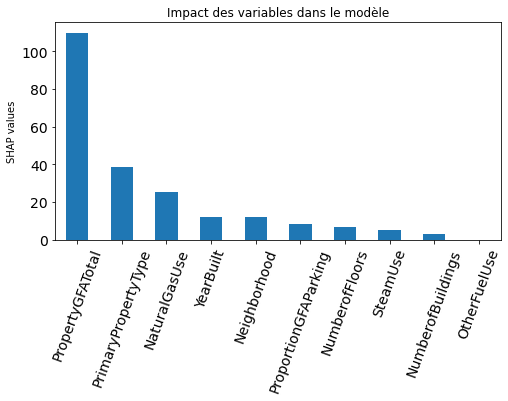

In [146]:
# On affiche les SHAP values représentant l'impact de chaque variable dans la modélisation.

plt.figure(figsize = (8,4))
abs(df_shap_values).mean(axis=0).sort_values(ascending=False).plot(kind='bar')
plt.gca().set_ylabel('SHAP values')
plt.xticks(rotation=70)
plt.title('Impact des variables dans le modèle')
plt.show()

## <a name="C10">Analyse de l'impact de l'ENERGY STAR Score sur la performance du modèle retenu

In [147]:
df_final.shape

(1655, 56)

In [148]:
df_final['ENERGYSTARScore'].isna().sum()

559

--> En utilisant l'ENERGY STAR Score dans le modèle on reduit le nombre de donées d'entraînement car il y a 559 valeurs manquantes dans le jeu de données concernant cette variable.

In [149]:
df_energyStar = df_final[df_final['ENERGYSTARScore'].notna()]

In [150]:
# On crée un jeu d'entraînement et de test.

X = df_energyStar.drop(['SourceEUWN(kBtu)', 'GHGEmissions(MetricTonsCO2e)'], axis=1)
y = df_energyStar[['SourceEUWN(kBtu)', 'GHGEmissions(MetricTonsCO2e)']]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.75, stratify=X[['PrimaryPropertyType']],
                                               random_state=42)


# On crée une nouvelle liste de colonne dans laquelle on rajoute l'ENERGY STAR Score.

df5_columns = ['PrimaryPropertyType', 'NumberofBuildings', 'NumberofFloors', 'Neighborhood', 'YearBuilt',
               'ProportionGFAParking', 'SteamUse', 'NaturalGasUse', 'OtherFuelUse', 'PropertyGFATotal', 'ENERGYSTARScore']

In [151]:
# On teste maintenant le modèle XGBoost retenu précédemment avec les 2 datasets df3 (sans l'ENERGY STAR Score)
# et df5 (avec l'ENERGY STAR Score).

df_results_15 = pd.DataFrame(columns = ['Dataset', 'Modèle', 'Normalisation', 'Target'])


for df in [('df3', df3_columns), ('df5', df5_columns)]:
    
    Xtrain_df = Xtrain[df[1]]
    
    y_CO2_train = ytrain['GHGEmissions(MetricTonsCO2e)']
    
    numerical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype != "object"]
    categorical_features = [col for col in Xtrain_df.columns if Xtrain_df[col].dtype == "object"]
    
    
    for normalizer in [('RobustScaler', RobustScaler())]:
        
        numerical_pipeline = make_pipeline(normalizer[1])
        categorical_pipeline = make_pipeline(OneHotEncoder())
        
        preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                               (categorical_pipeline, categorical_features))
        
        
        for type_model in [('XGBoost', xgboost.XGBRegressor(n_estimators=15, min_child_weight=1, max_depth=6, 
                                                        learning_rate=0.5, gamma=0.25))]:
            
            model = make_pipeline(preprocessor, TransformedTargetRegressor(regressor=type_model[1], func=np.log,
                                                                           inverse_func=np.exp))
            
            params = {
            }
                                
                
            grid_CO2 = GridSearchCV(model, param_grid=params, cv=5, return_train_score=True,
                                      scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error'),
                                      refit = 'r2', n_jobs = -1)
             
            grid_CO2.fit(Xtrain_df, y_CO2_train)
    
            df_grid_CO2_results = pd.DataFrame(grid_CO2.cv_results_)
            df_grid_CO2_results['Dataset'] = df[0]
            df_grid_CO2_results['Modèle'] = type_model[0]
            df_grid_CO2_results['Normalisation'] = normalizer[0]
            df_grid_CO2_results['Target'] = 'grid_CO2'
            
            df_results_15 = df_results_15.append(df_grid_CO2_results, ignore_index=True)

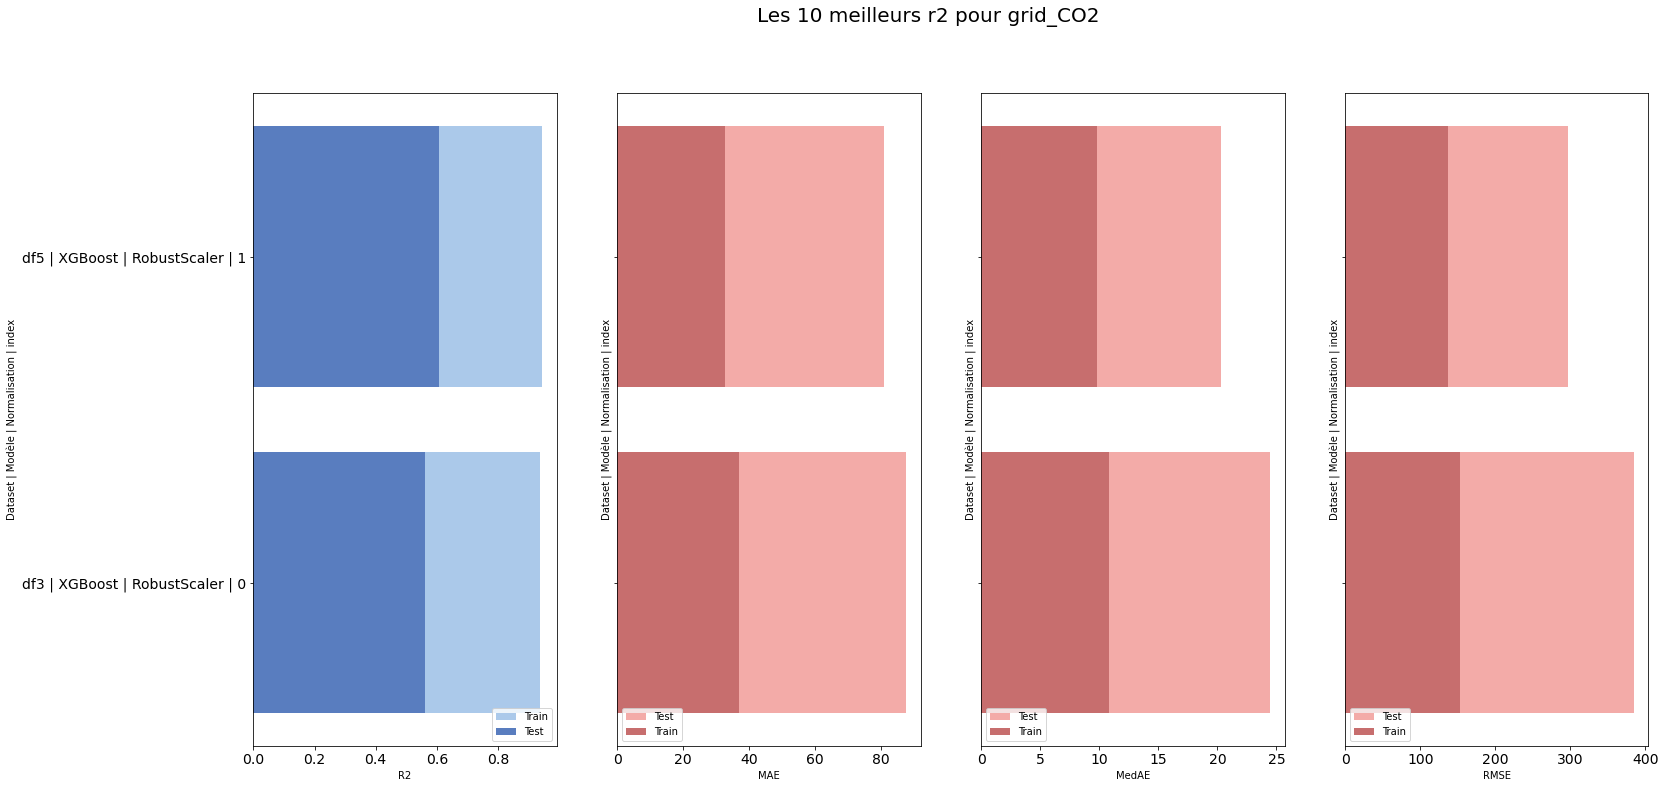

In [152]:
afficher_best(2, df_results_15, 'grid_CO2')

In [153]:
df_results_15['log_target'] = 'Yes'

df_results_15[results_main_columns]

,Dataset,Modèle,Normalisation,mean_test_r2,mean_test_neg_mean_absolute_error,mean_test_neg_median_absolute_error,mean_test_neg_mean_squared_error,Target,mean_fit_time,mean_score_time,params,log_target
0,df3,XGBoost,RobustScaler,0.560977,-87.545791,-24.460709,-148020.083399,grid_CO2,0.069605,0.015558,{},Yes
1,df5,XGBoost,RobustScaler,0.607055,-80.847265,-20.277090,-88400.329541,grid_CO2,0.097139,0.014561,{},Yes


--> On remarque une amélioration de toutes les métriques pour le dataset contenant l'ENERGY STAR Score :
- r2 = 61% vs 56%
- MAE = 81 vs 88
- MEdAE = 20 vs 24
- RMSE = 297 vs 385

On constate donc une amélioration en prenant en compte l'ENERGY STAR Score dans le modèle.